### Analysis of chainmails (graphs and summary are at the bottom)

In [1]:
import json
import sys
import itertools
from collections import Counter
from datetime import date
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm
from matplotlib.ticker import PercentFormatter

from IPython.display import display, Markdown

In [2]:
def get_lines(path):
    with open(path) as f:
        for line in f:
            yield json.loads(line.strip())
            
def percentage_histogram(data, bins=100, title="", xlabel=""):
    plt.figure(figsize=(10,5), dpi=300)
    plt.hist(data, weights=np.ones(len(data)) / len(data), bins=bins)
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()
    
def scatter_plot_x_y(x, y, title="", xlabel="", ylabel="", alpha=0.25):
    plt.figure(figsize=(10,10), dpi=300)
    plt.scatter(x, y, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

In [3]:
# for i in {00..49}; do < part_"$i" grep 'scanner.subject' | jq '[(.[]|select(."scanner.subject")|[([(."scanner.phash_stats"[]|select(.reputation_forward_value_total > 10 and .rcpt_value_total > 100 and .header_from_value_total > 10 and .originIP_value_total > 10 and .const_value_total > 100 and (.header_from_value_total / (.const_value_total + 1.0) > 0.25) and (.rcpt_value_total / (.const_value_total + 1.0) > 2.0) and (.header_from_value_total / (.originIP_value_total + 1.0) > 0.7) and (.originIP_value_total / (.header_from_value_total + 1.0) > 0.2 ) )|{"score": (100.0 * .reputation_forward_value_total/(.const_value_total + 1.0)),"value": .base_value,"name":.name})]|sort_by(.score)|reverse|.[0:3]),(.|del(."scanner.phash_stats"))]|.[1] + {"phashes": .[0]}),[(.[]|select(."ebox.cause")|(."ebox.cause"[0] + "_" + ."ebox.state.type"[0]))]] | .[0] + {"ebox_actions": .[1]}'  -c | sed -e 's/"scanner\./"/g'  > part_"$i"_filtered & done

In [4]:
# DATA_FILE = "/mfs/plain/tiborg/chains_with_ebox/2020-01/chains_preprocessed"

# def data_parser(d):
#     d["att_types"] = [a.get("mime_type", "NONE") for a in d.get("attachments", [])]
#     d["day"] = [str(date.fromtimestamp(d.get("timestamp", [0])[0]))]
#     d["phashes"] = [p.get("name", "NONE") + "|" + p.get("value", "NONE") for p in d.get("phashes", [])]
#     d["rcpts"] = list(set(d.get("header_to", []) + d.get("rcpts", [])))
#     d["read"] = [sum(1 for a in d.get("ebox_actions", []) if a == "USER_MESSAGE_SET_ATTRIBUTES_READ")]
#     d["from"] = d["from"] if "from" in d else [d.get("header_from", "NONE")]
#     #for k in ["from", "header_from", "sznId", "subject", "content"]:
#     #    d[k] = d.get(k, ["NONE"])[0]
#     for k in ["adscore", "spamscore", "attachments", "timestamp", "subject", "header_to", "content", "ebox_actions"]:
#             d.pop(k, "None")
#     # d = [d[k] for k in ["day", "phashes", "sznId", "rcpts", "att_types", "from", "read"]]
    
#     yield d
            
# with open(DATA_FILE + "_parsed", "w+") as f:
#     for l in get_lines(DATA_FILE):
#         for r in data_parser(l):
#             f.write(json.dumps(r) + "\n")

In [5]:
# DATA_FILE = "/mfs/plain/tiborg/chains_with_ebox/2020-01/chains_preprocessed_parsed"
 

# phashes = {"all": {"sznIds": Counter(), "rcpts": Counter(), "days": Counter(),
#                           "att_types": Counter(), "froms": Counter(), "reads": Counter()}}
# counter = 1
# for l in get_lines(DATA_FILE):
#     l["from"] = l["from"][0] if isinstance(l.get("from",["NONE"])[0], list) else l["from"]
 
#     for c, n in [("sznIds", "sznId"), ("rcpts", "rcpts"), ("days", "day"),
#                      ("att_types", "att_types"), ("froms", "from"), ("reads", "read")]:
#         phashes["all"][c].update(l[n])
        
#     for p in l["phashes"]:
#         if p not in phashes:
#             phashes[p] = {"sznIds": Counter(), "rcpts": Counter(), "days": Counter(),
#                           "att_types": Counter(), "froms": Counter(), "reads": Counter()}
#         for c, n in [("sznIds", "sznId"), ("rcpts", "rcpts"), ("days", "day"),
#                      ("att_types", "att_types"), ("froms", "from"), ("reads", "read")]:
#                 phashes[p][c].update(l[n])
#         break

#     counter += 1
#     if counter % 500000 == 0:
#         print(counter)
#     if counter > 20000000:
#         break
# for p in phashes:
#     phashes[p] = {"messages": len(phashes[p]["sznIds"]),
#                   "recipients": len(phashes[p]["rcpts"]),
#                   "froms": len(phashes[p]["froms"]),
#                   "days": len(phashes[p]["days"]),
#                   "attachments": sum(1 for k, v in phashes[p]["att_types"].items()
#                                      if v * 1.1 > len(phashes[p]["sznIds"])),
#                   "reads": sum(k*v for k, v in phashes[p]["reads"].items())
#                  }

# with open(DATA_FILE + "_primary_phash_summed", "w+") as f:
#     f.write(json.dumps(phashes) + "\n")

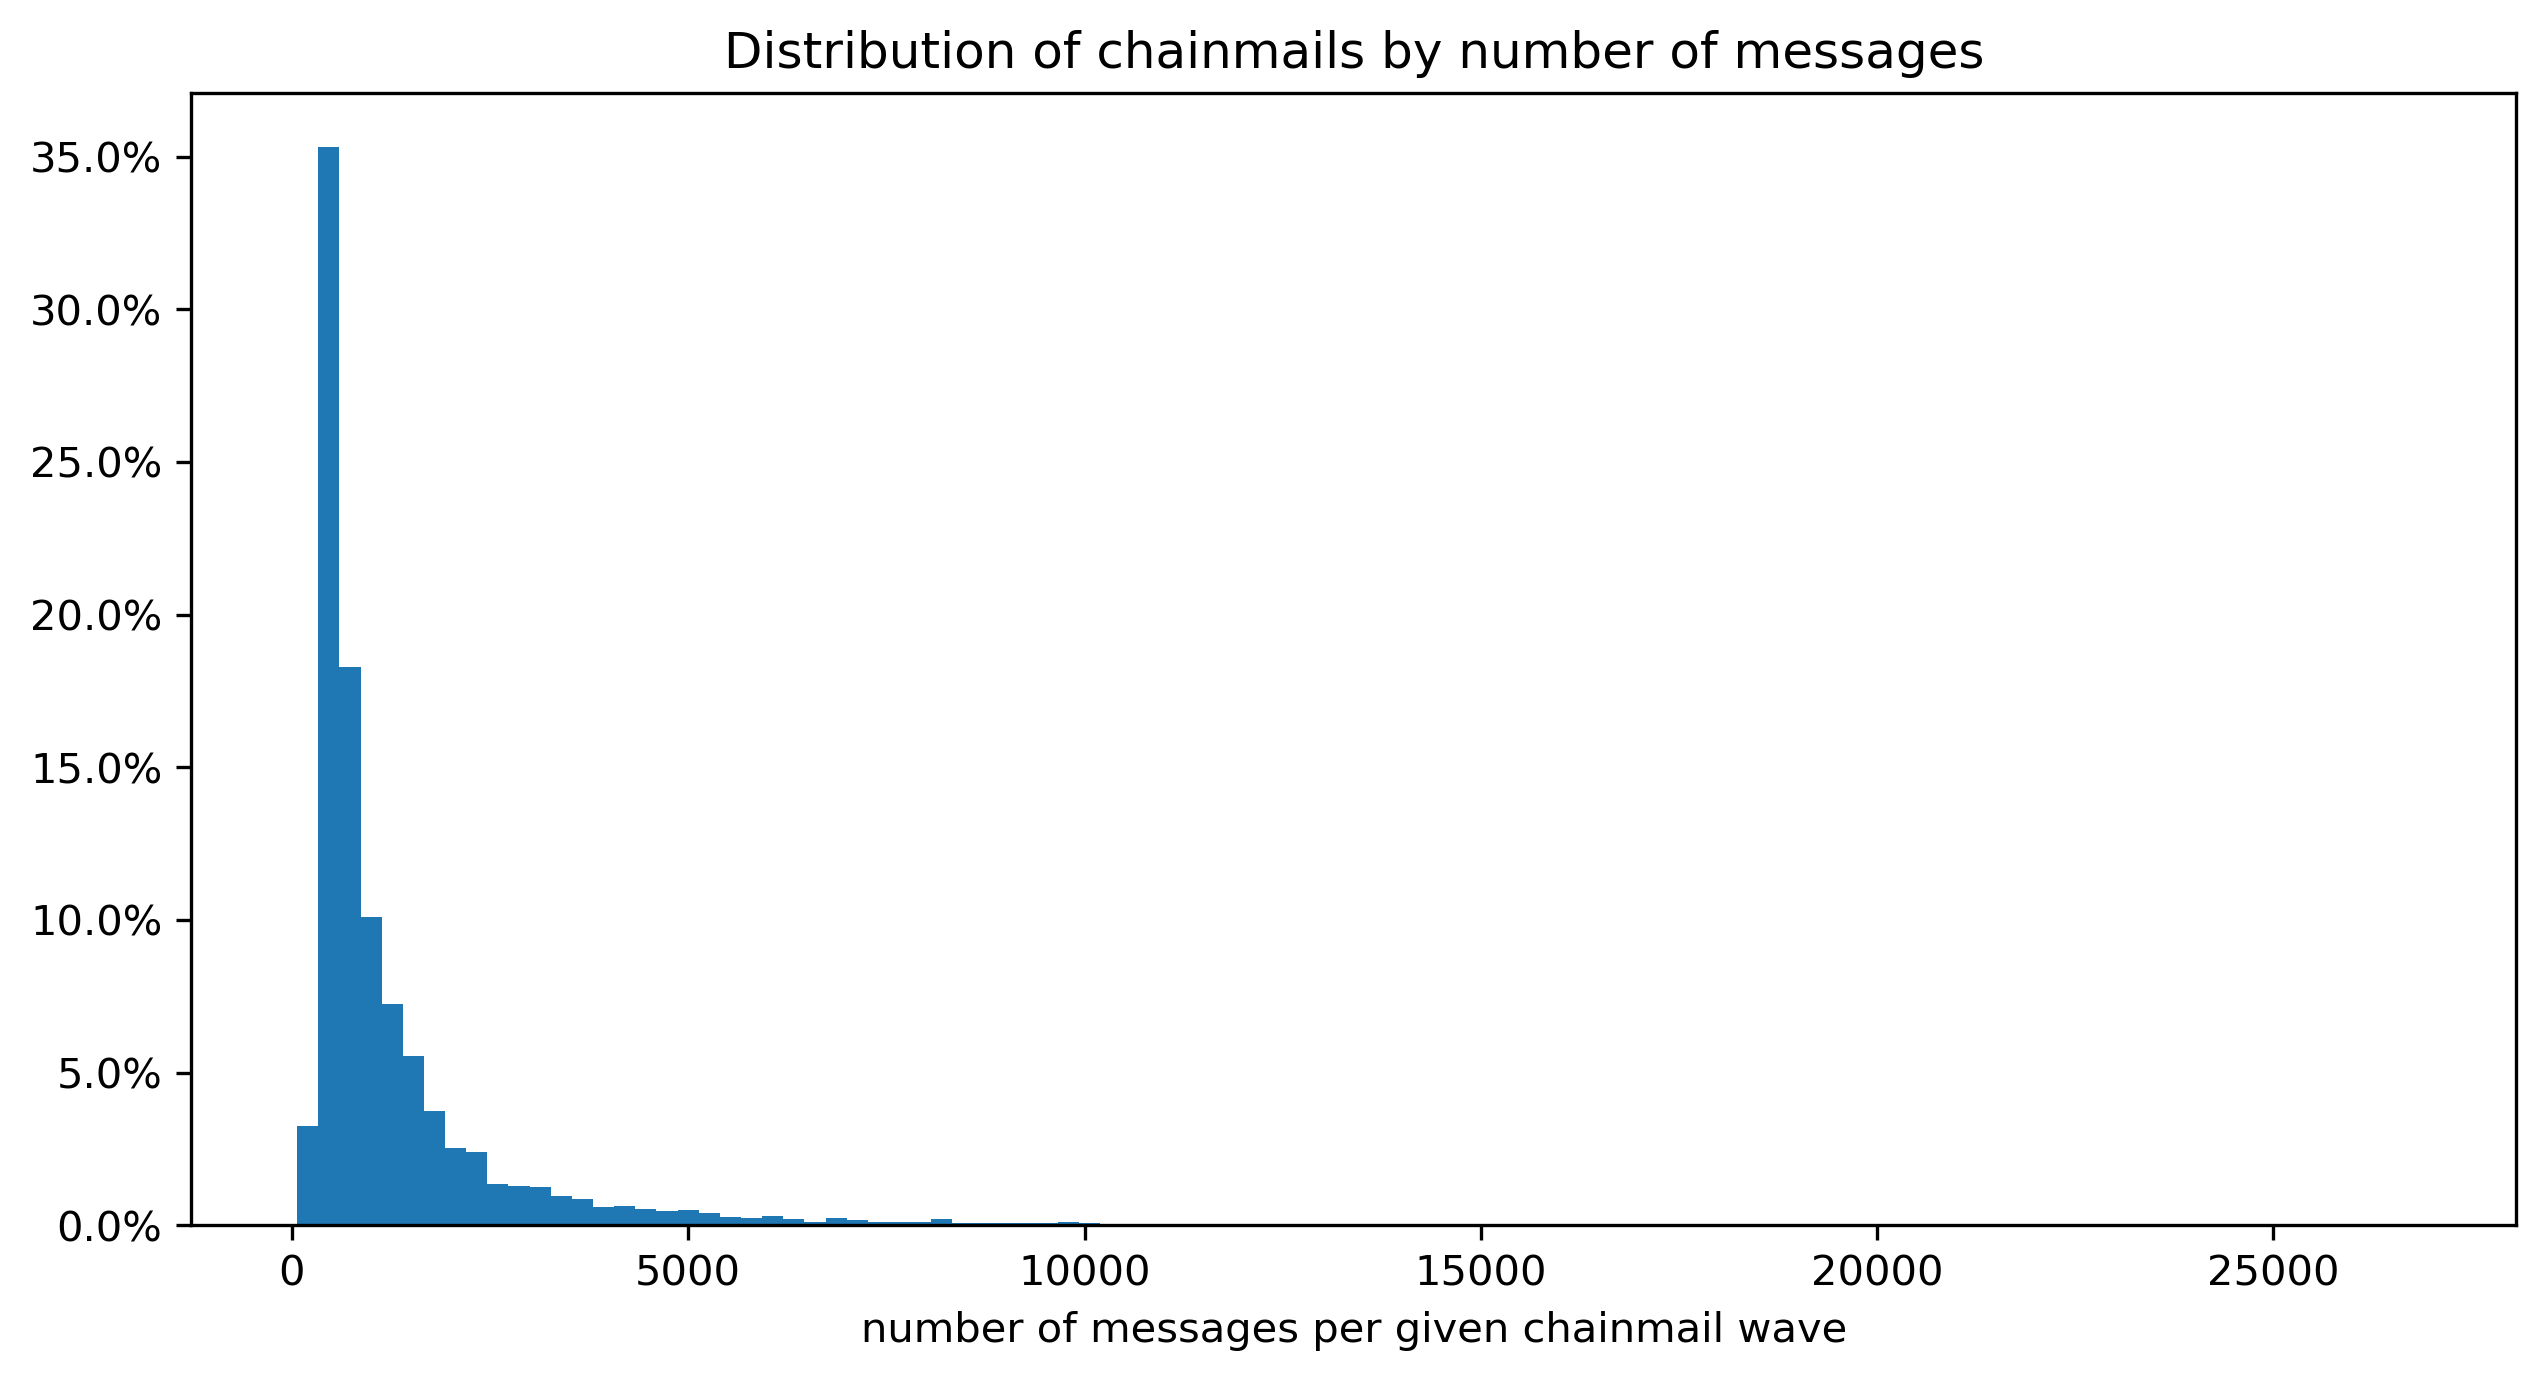

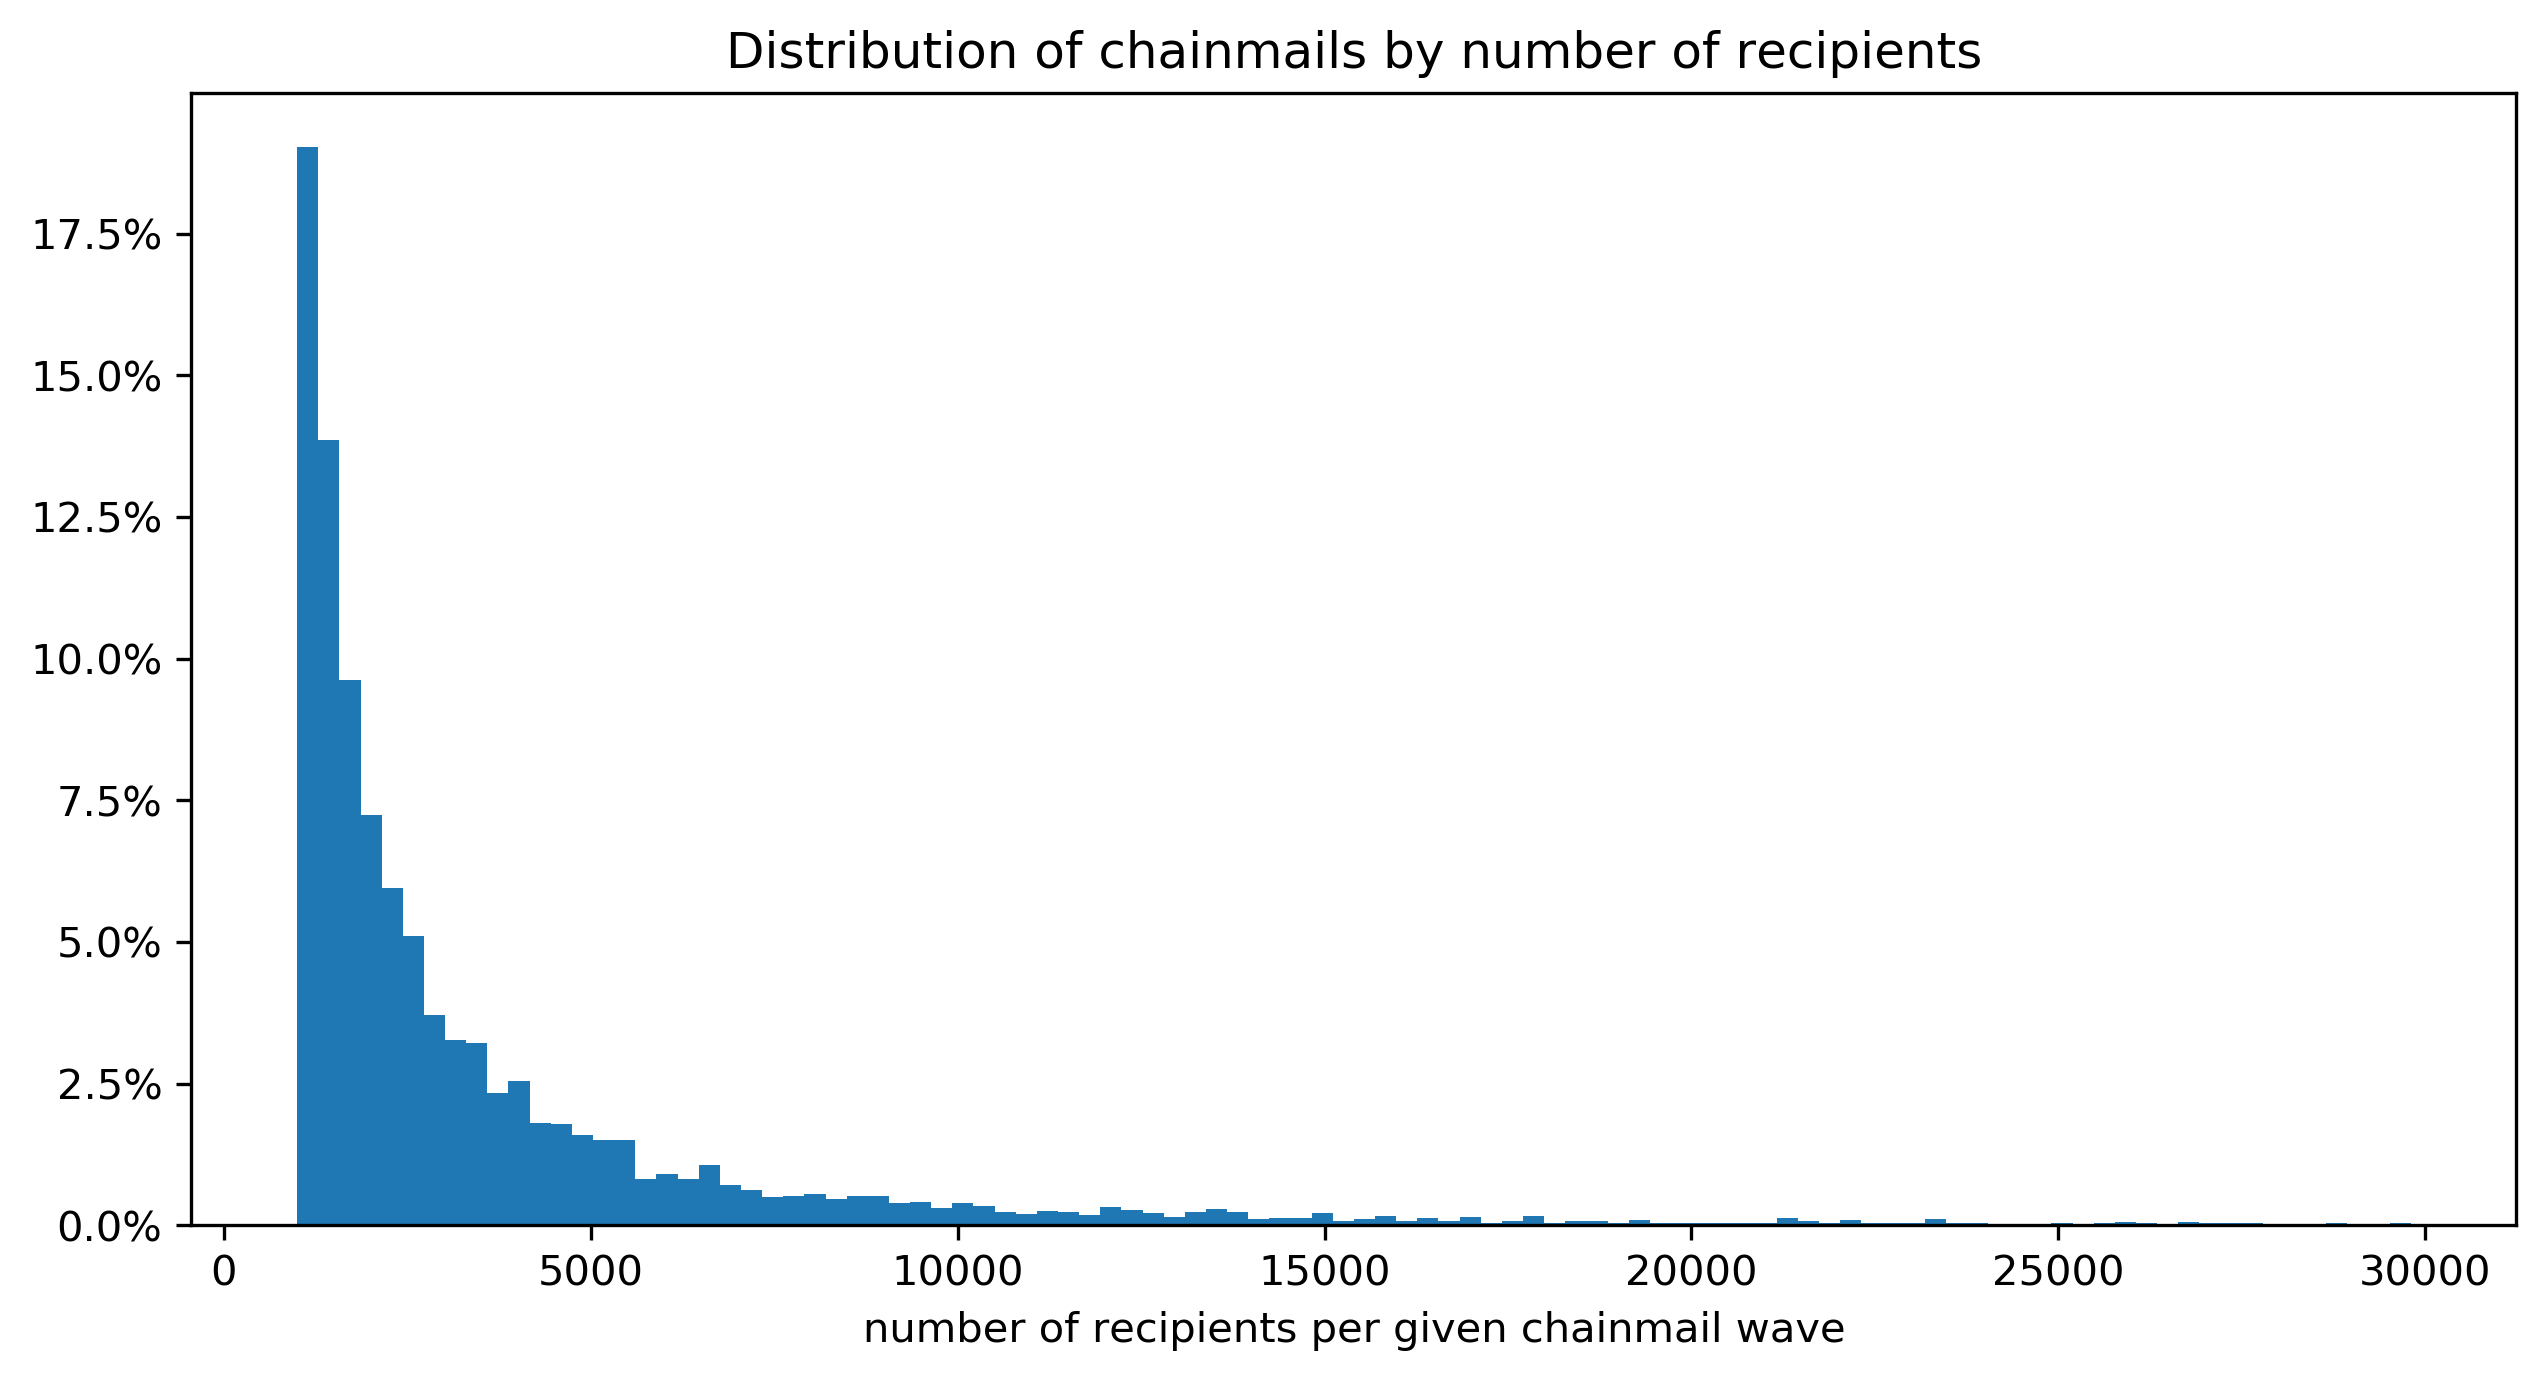

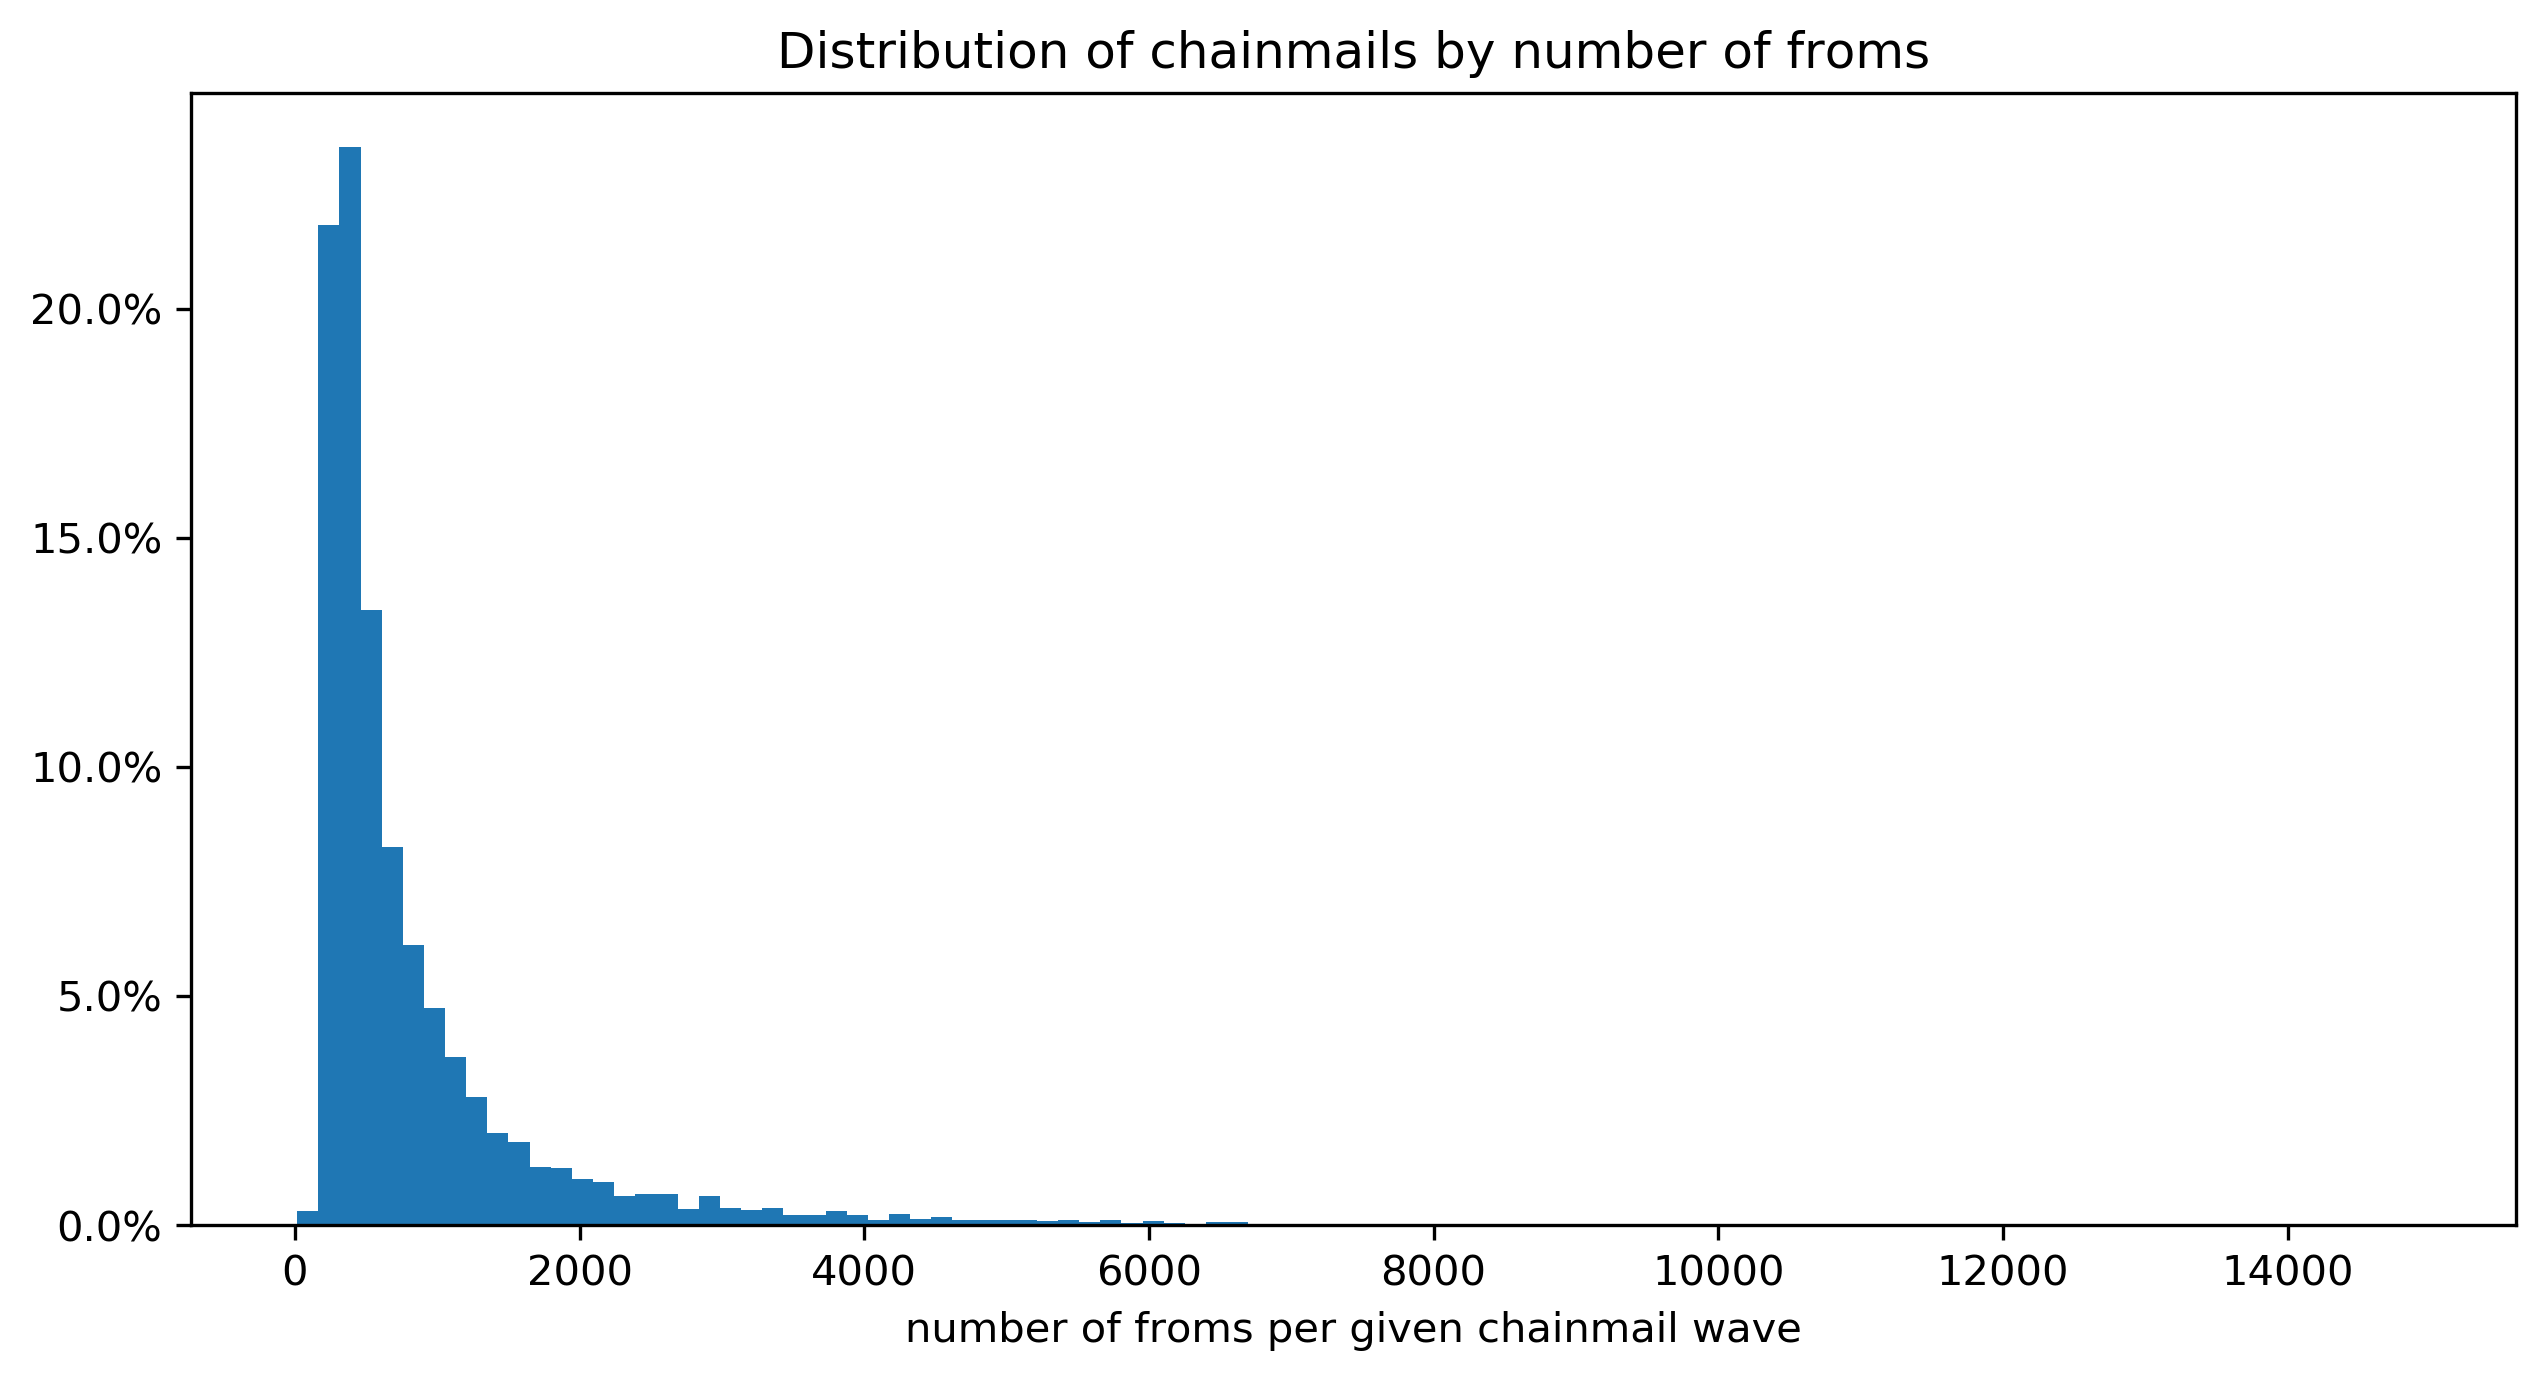

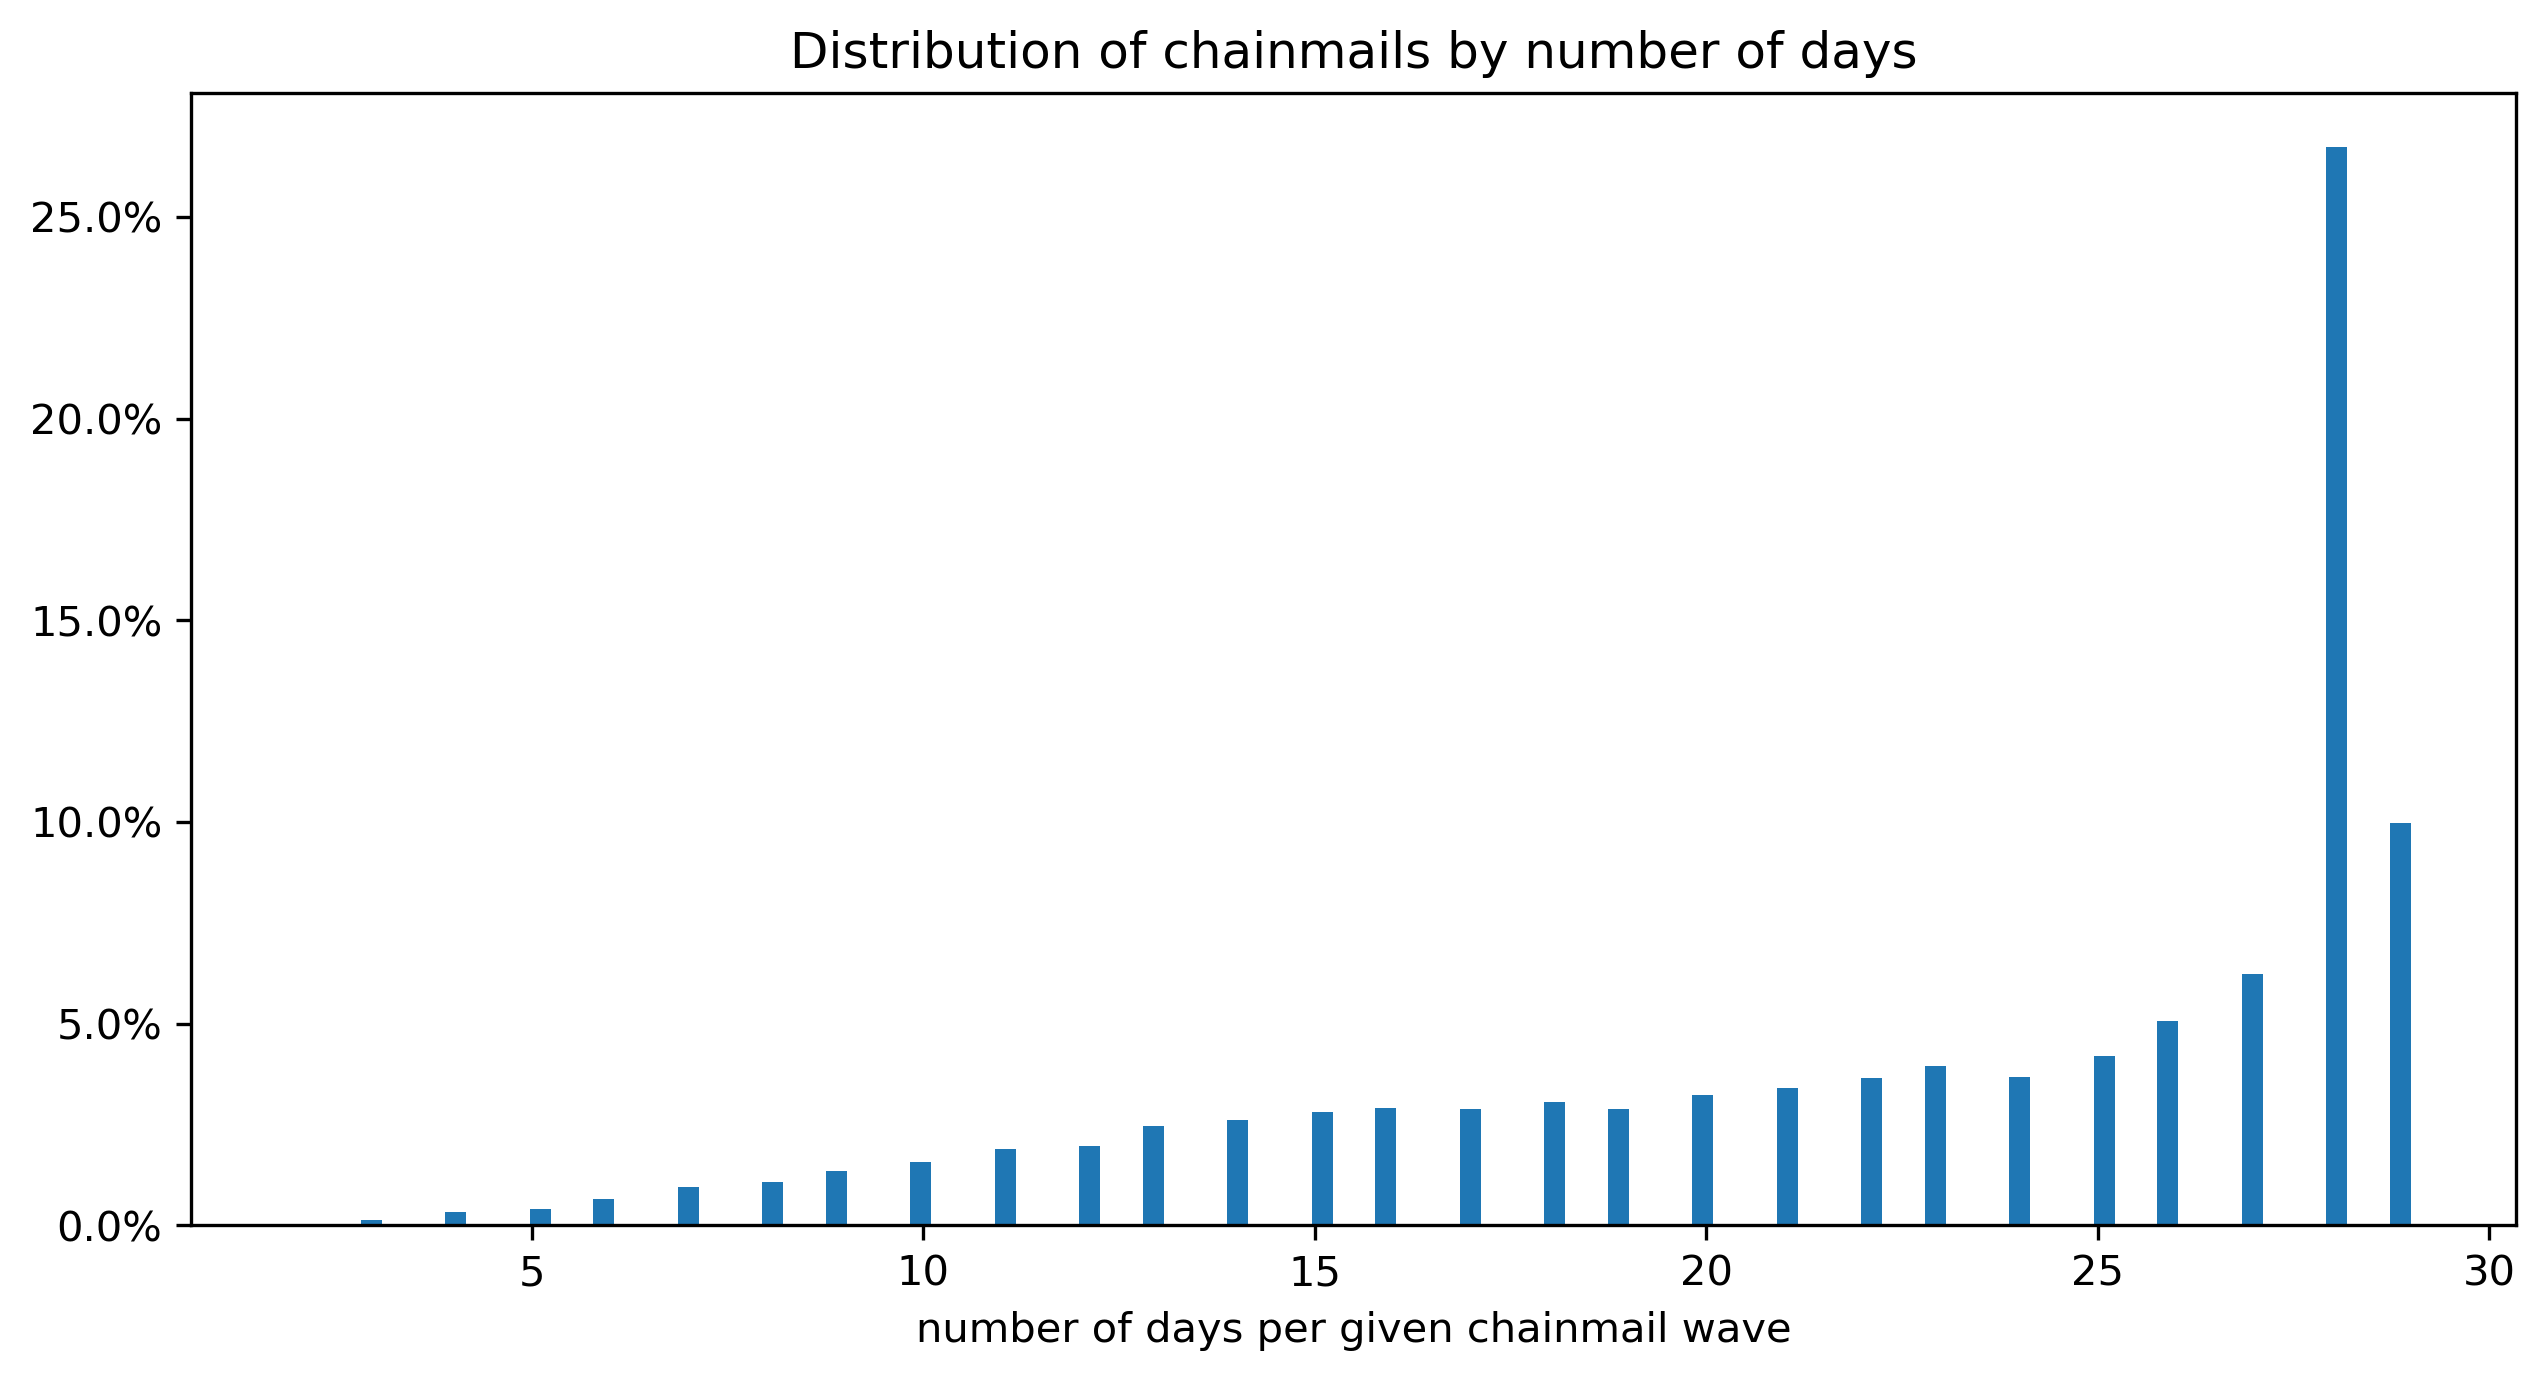

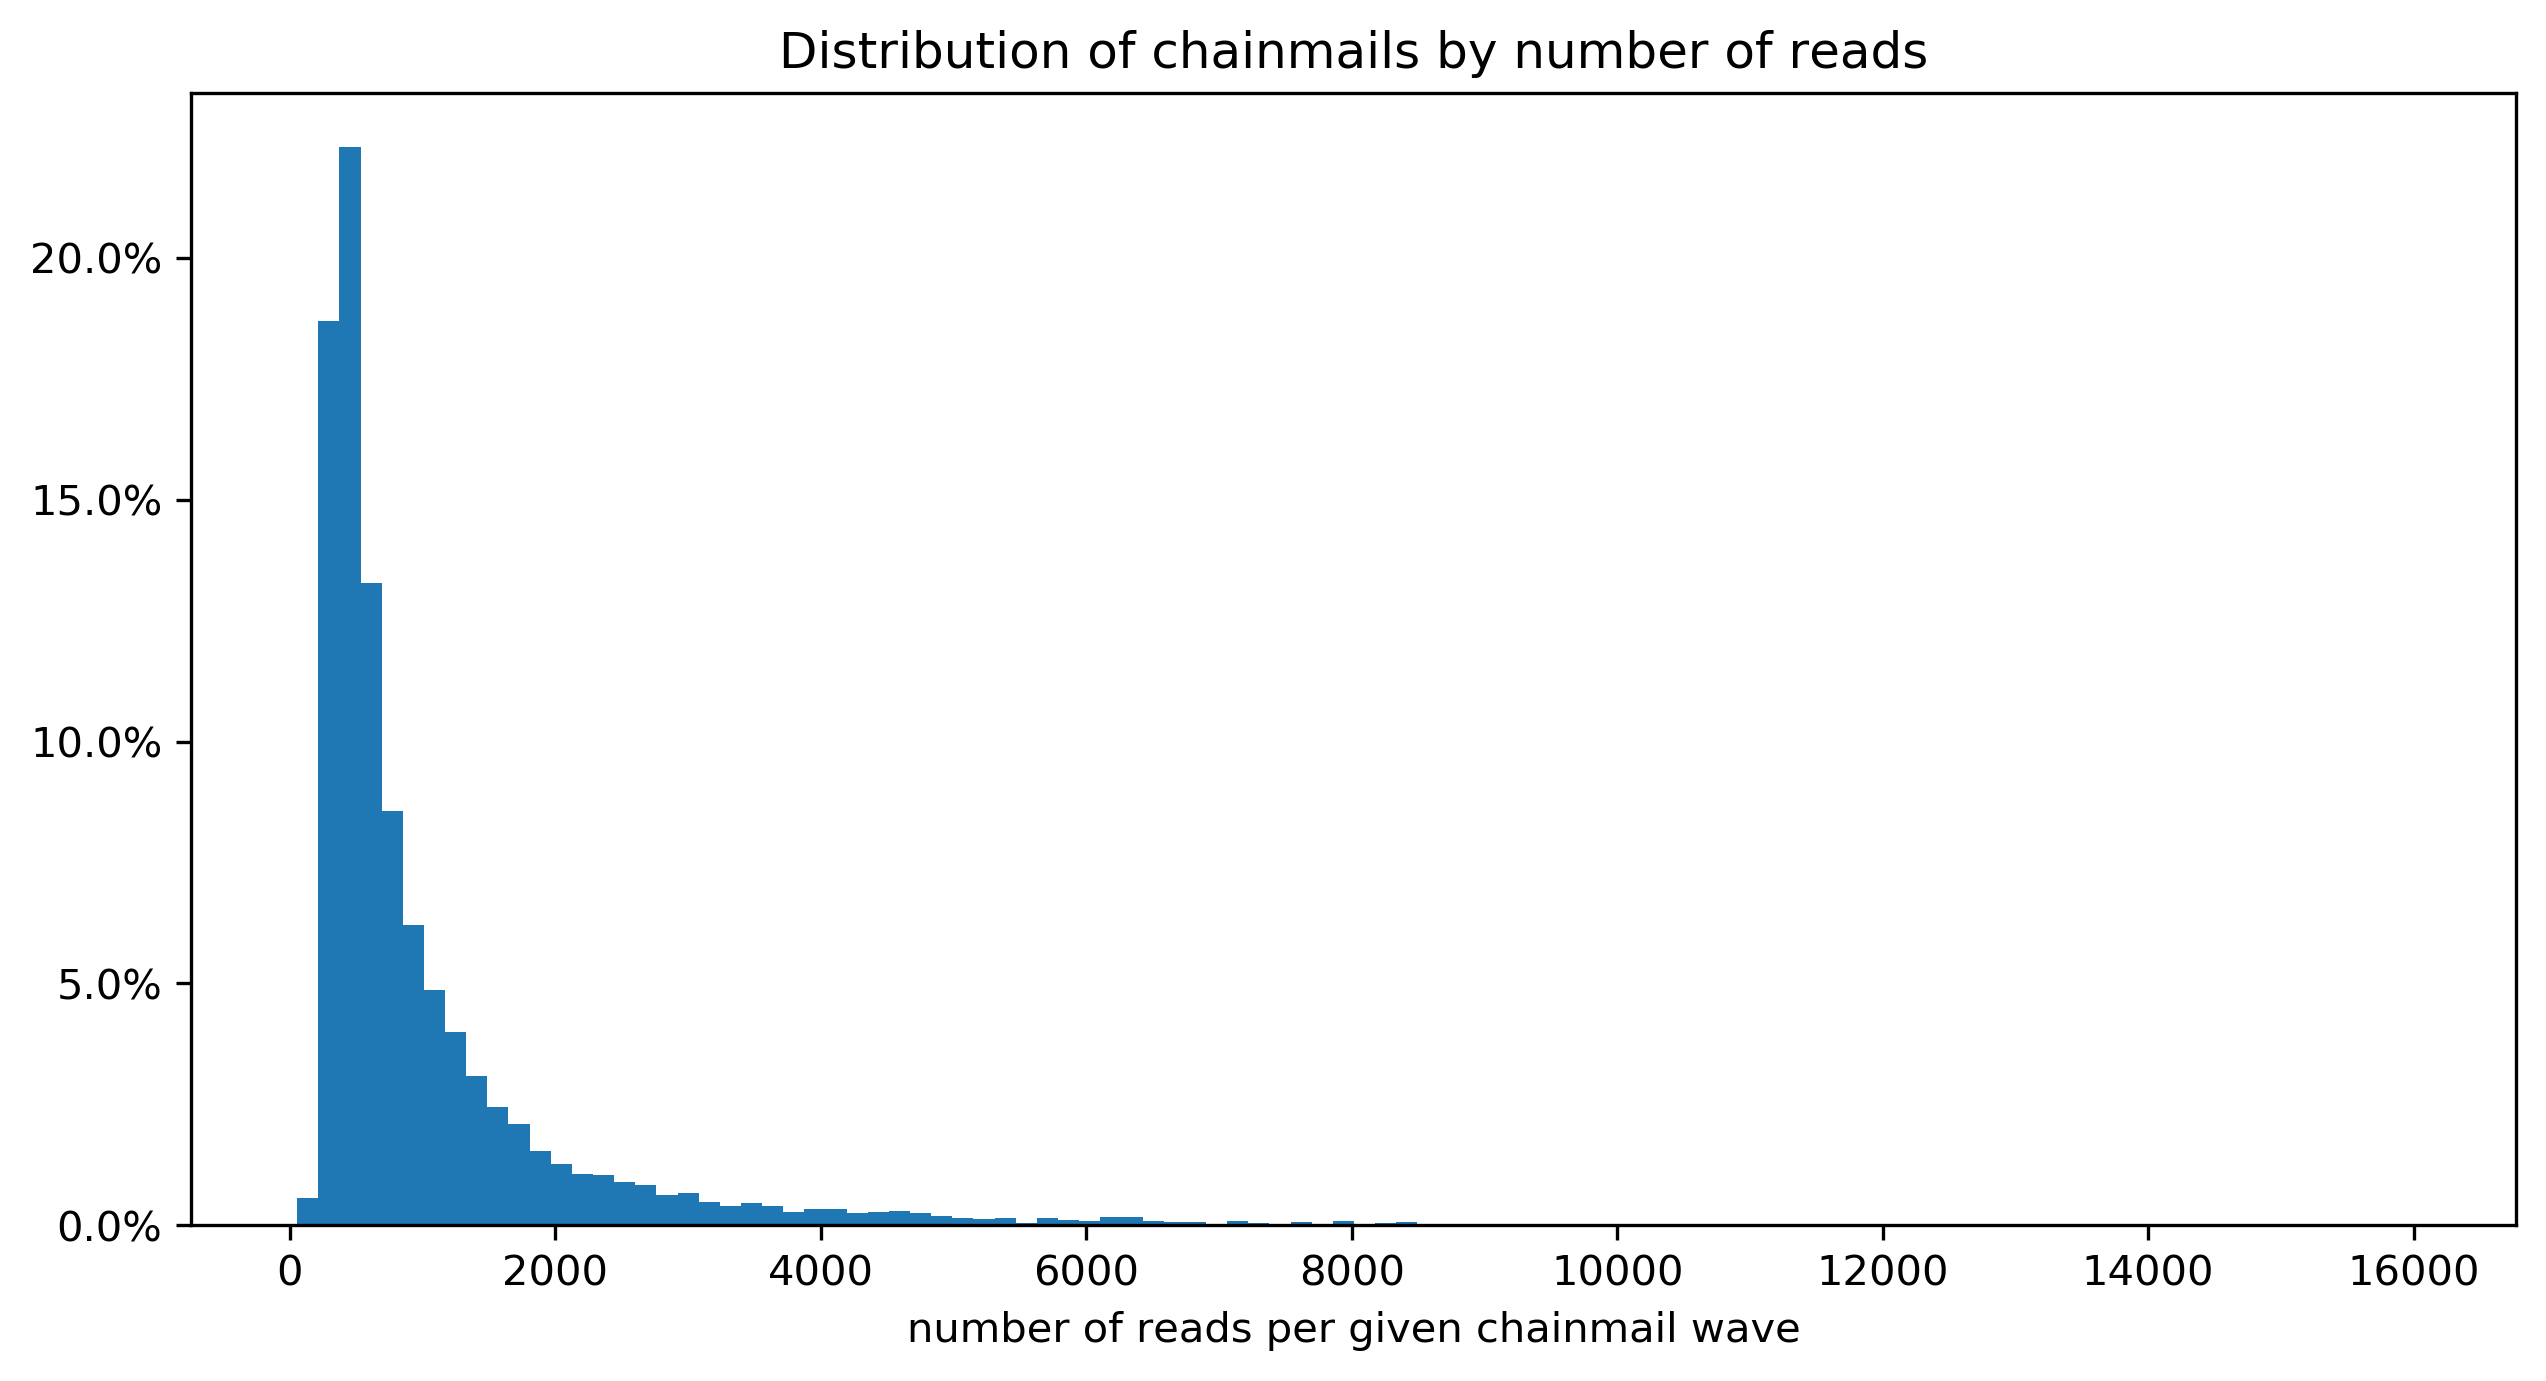

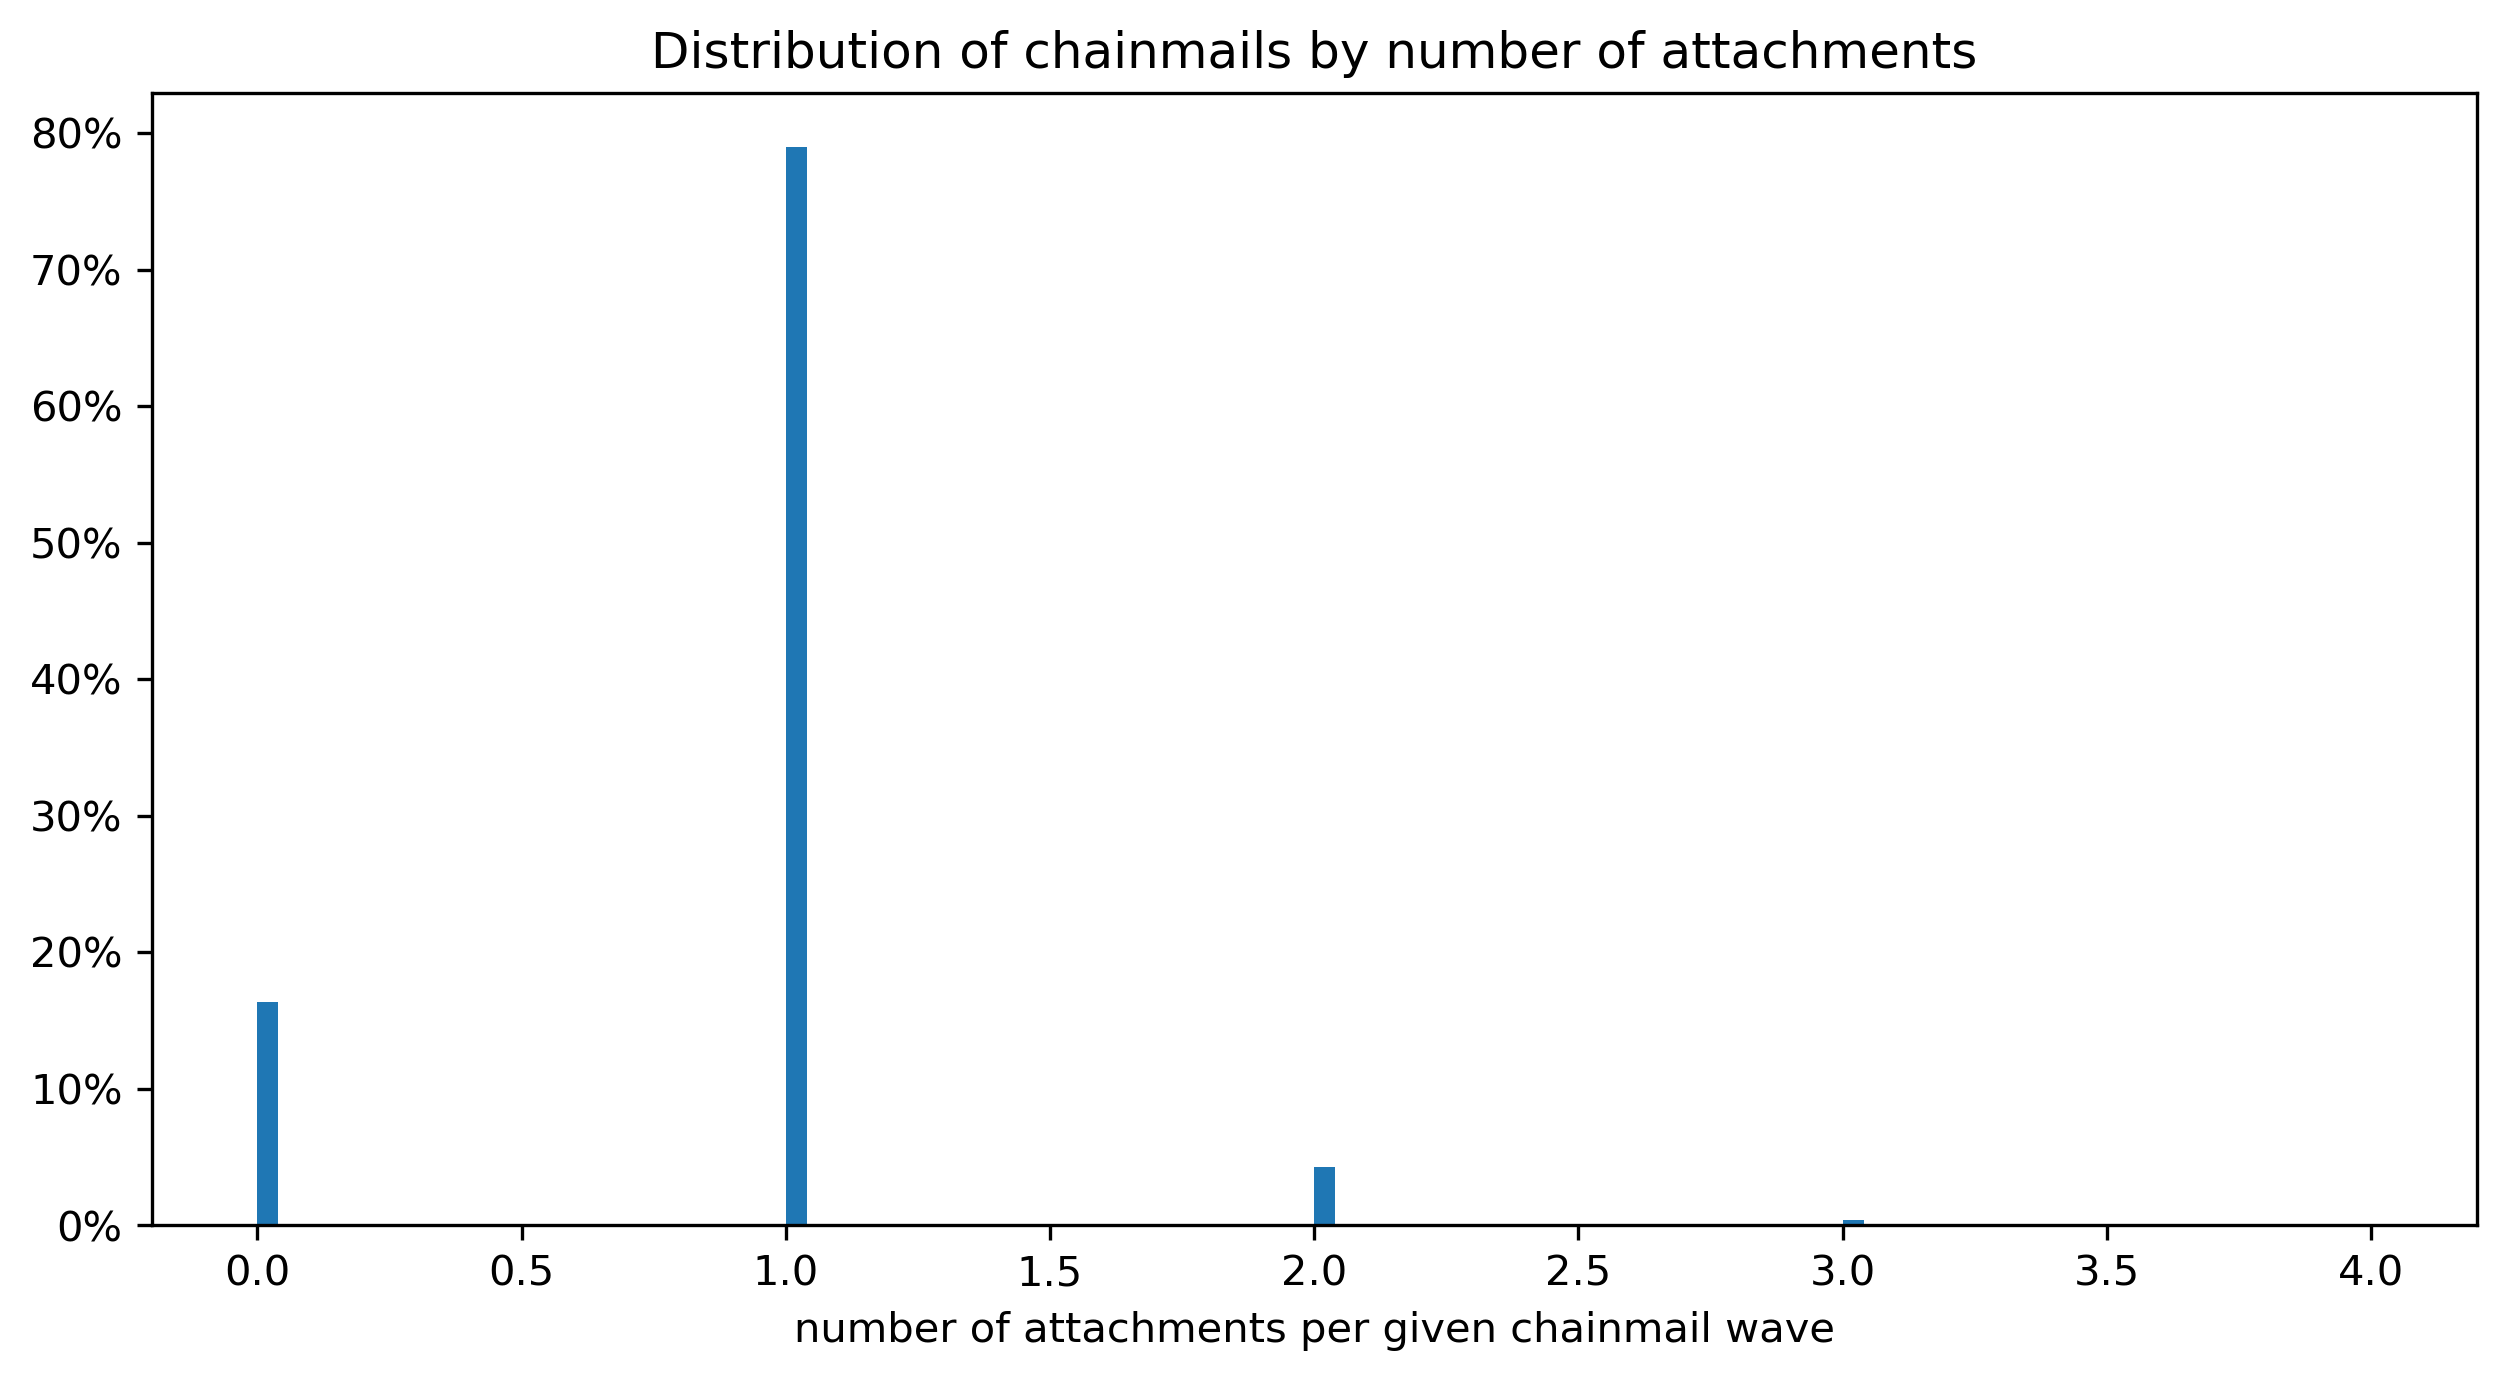

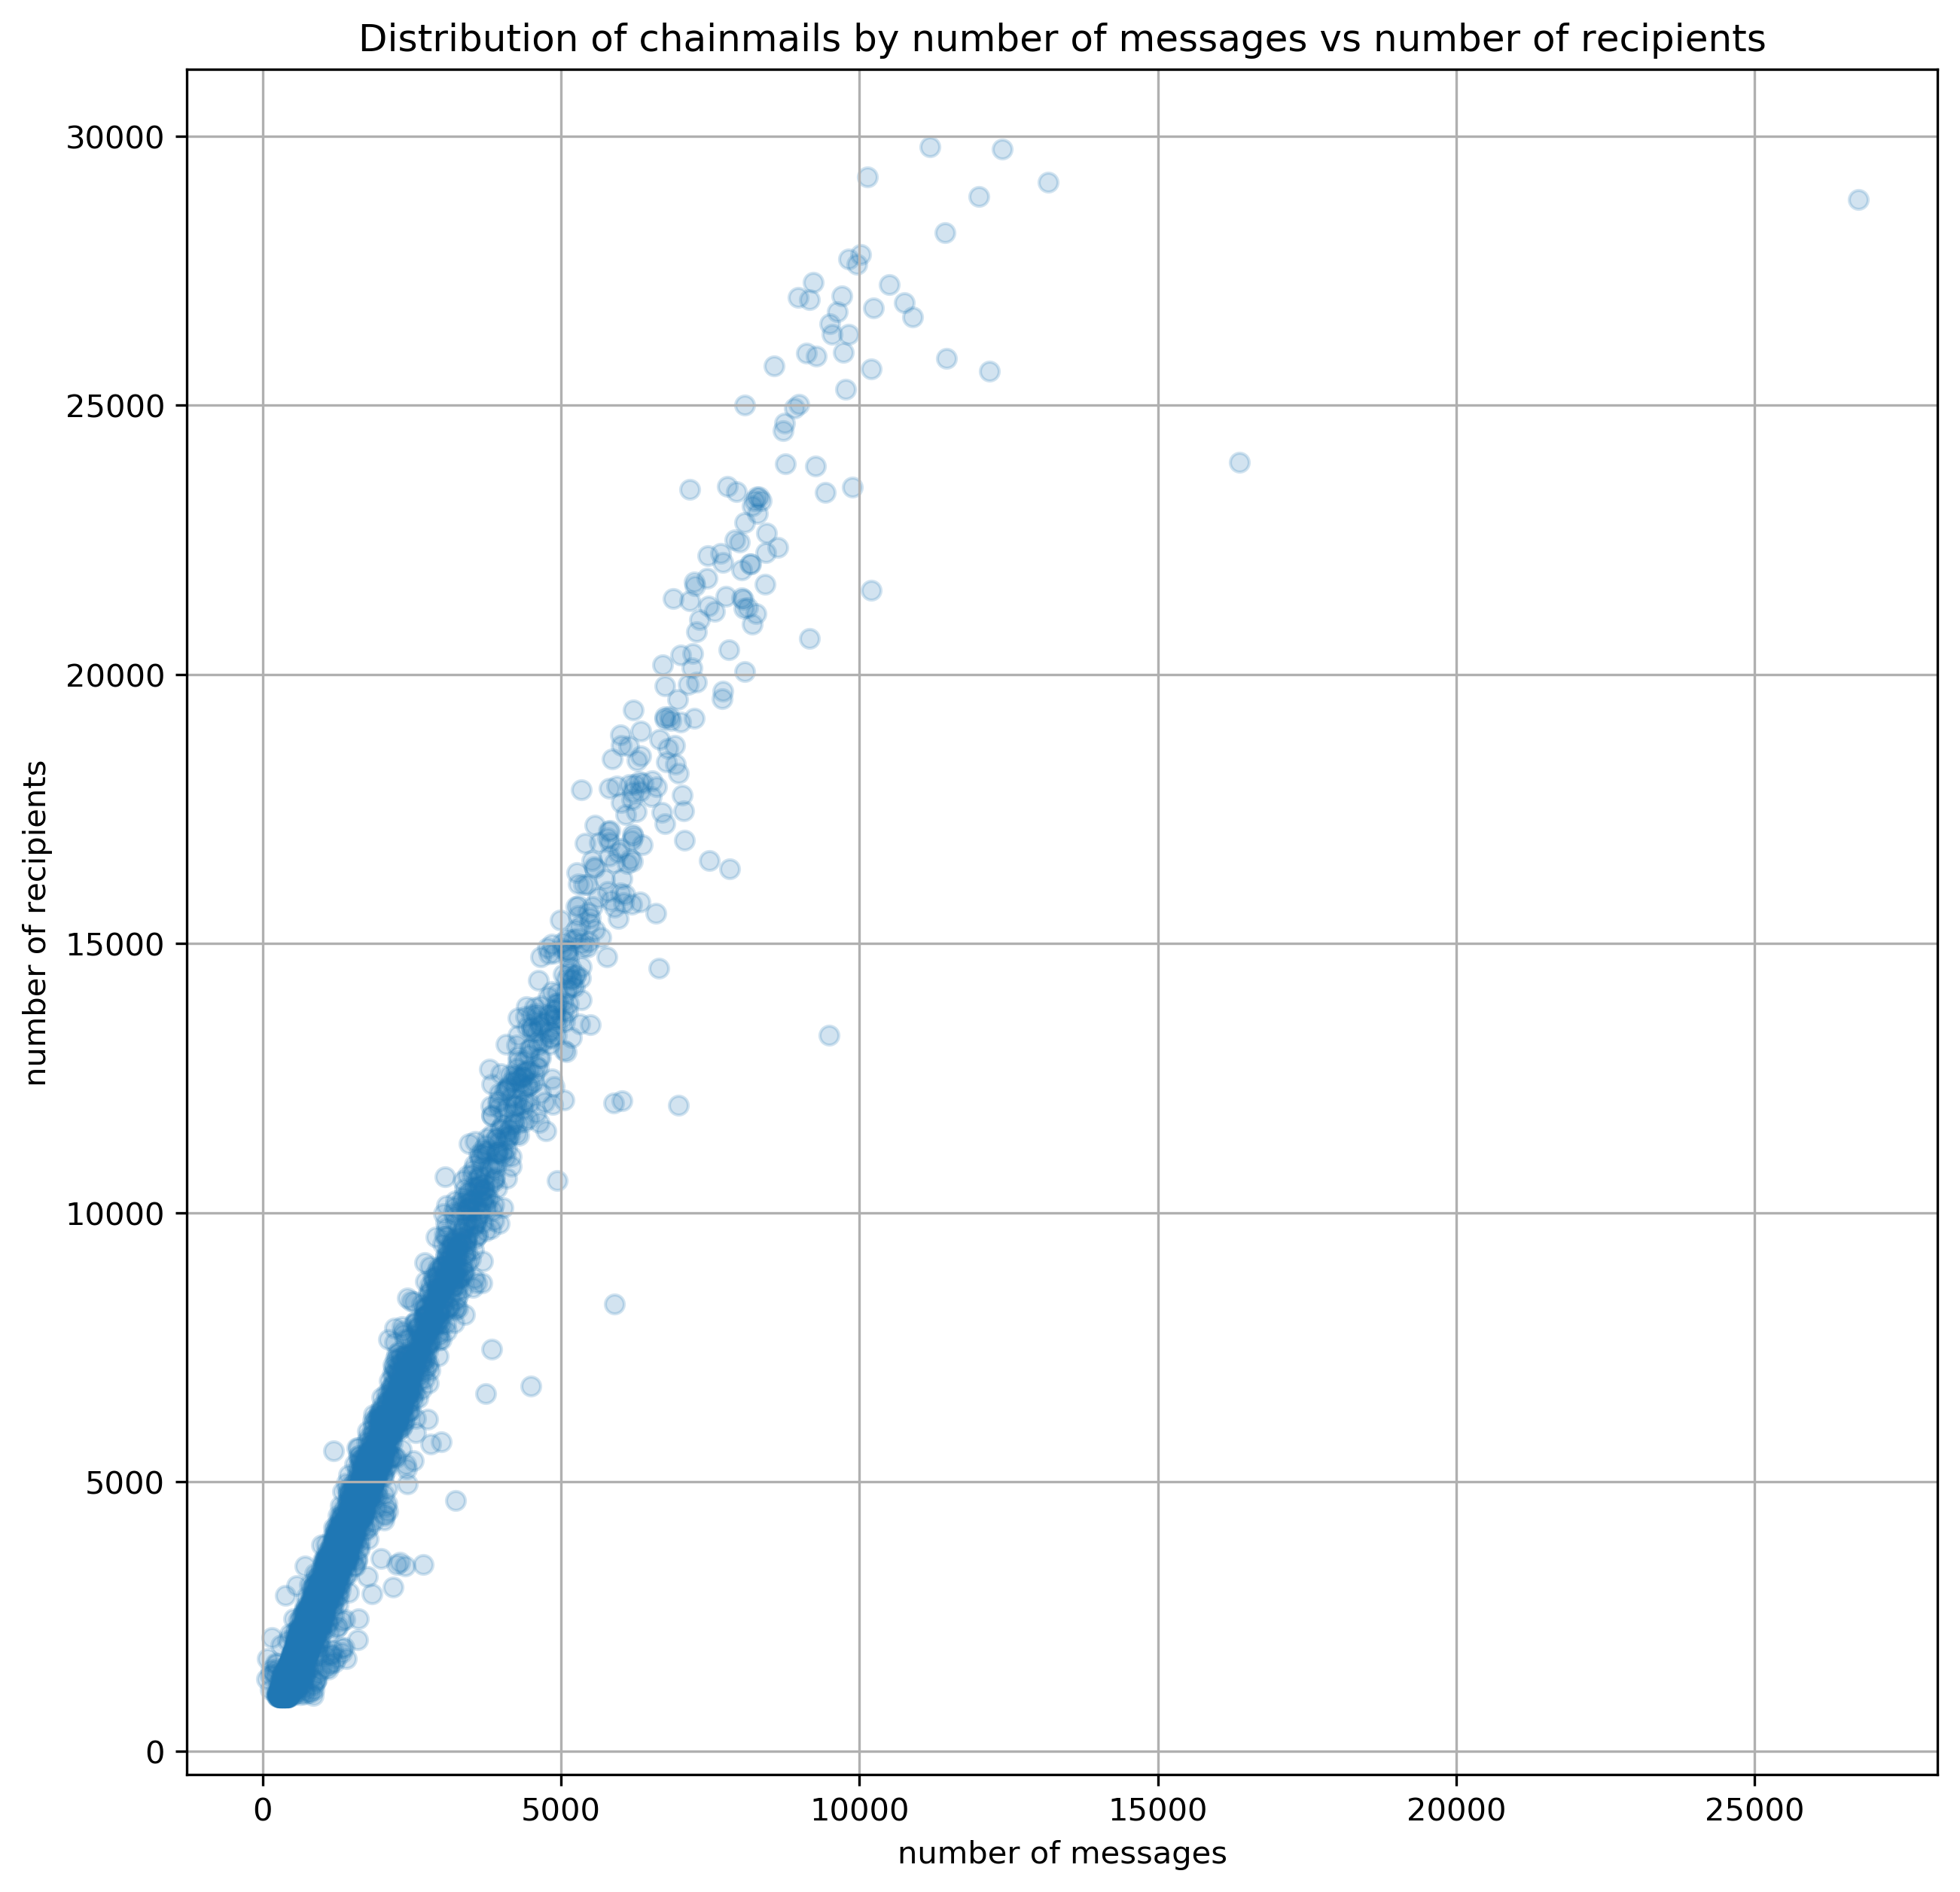

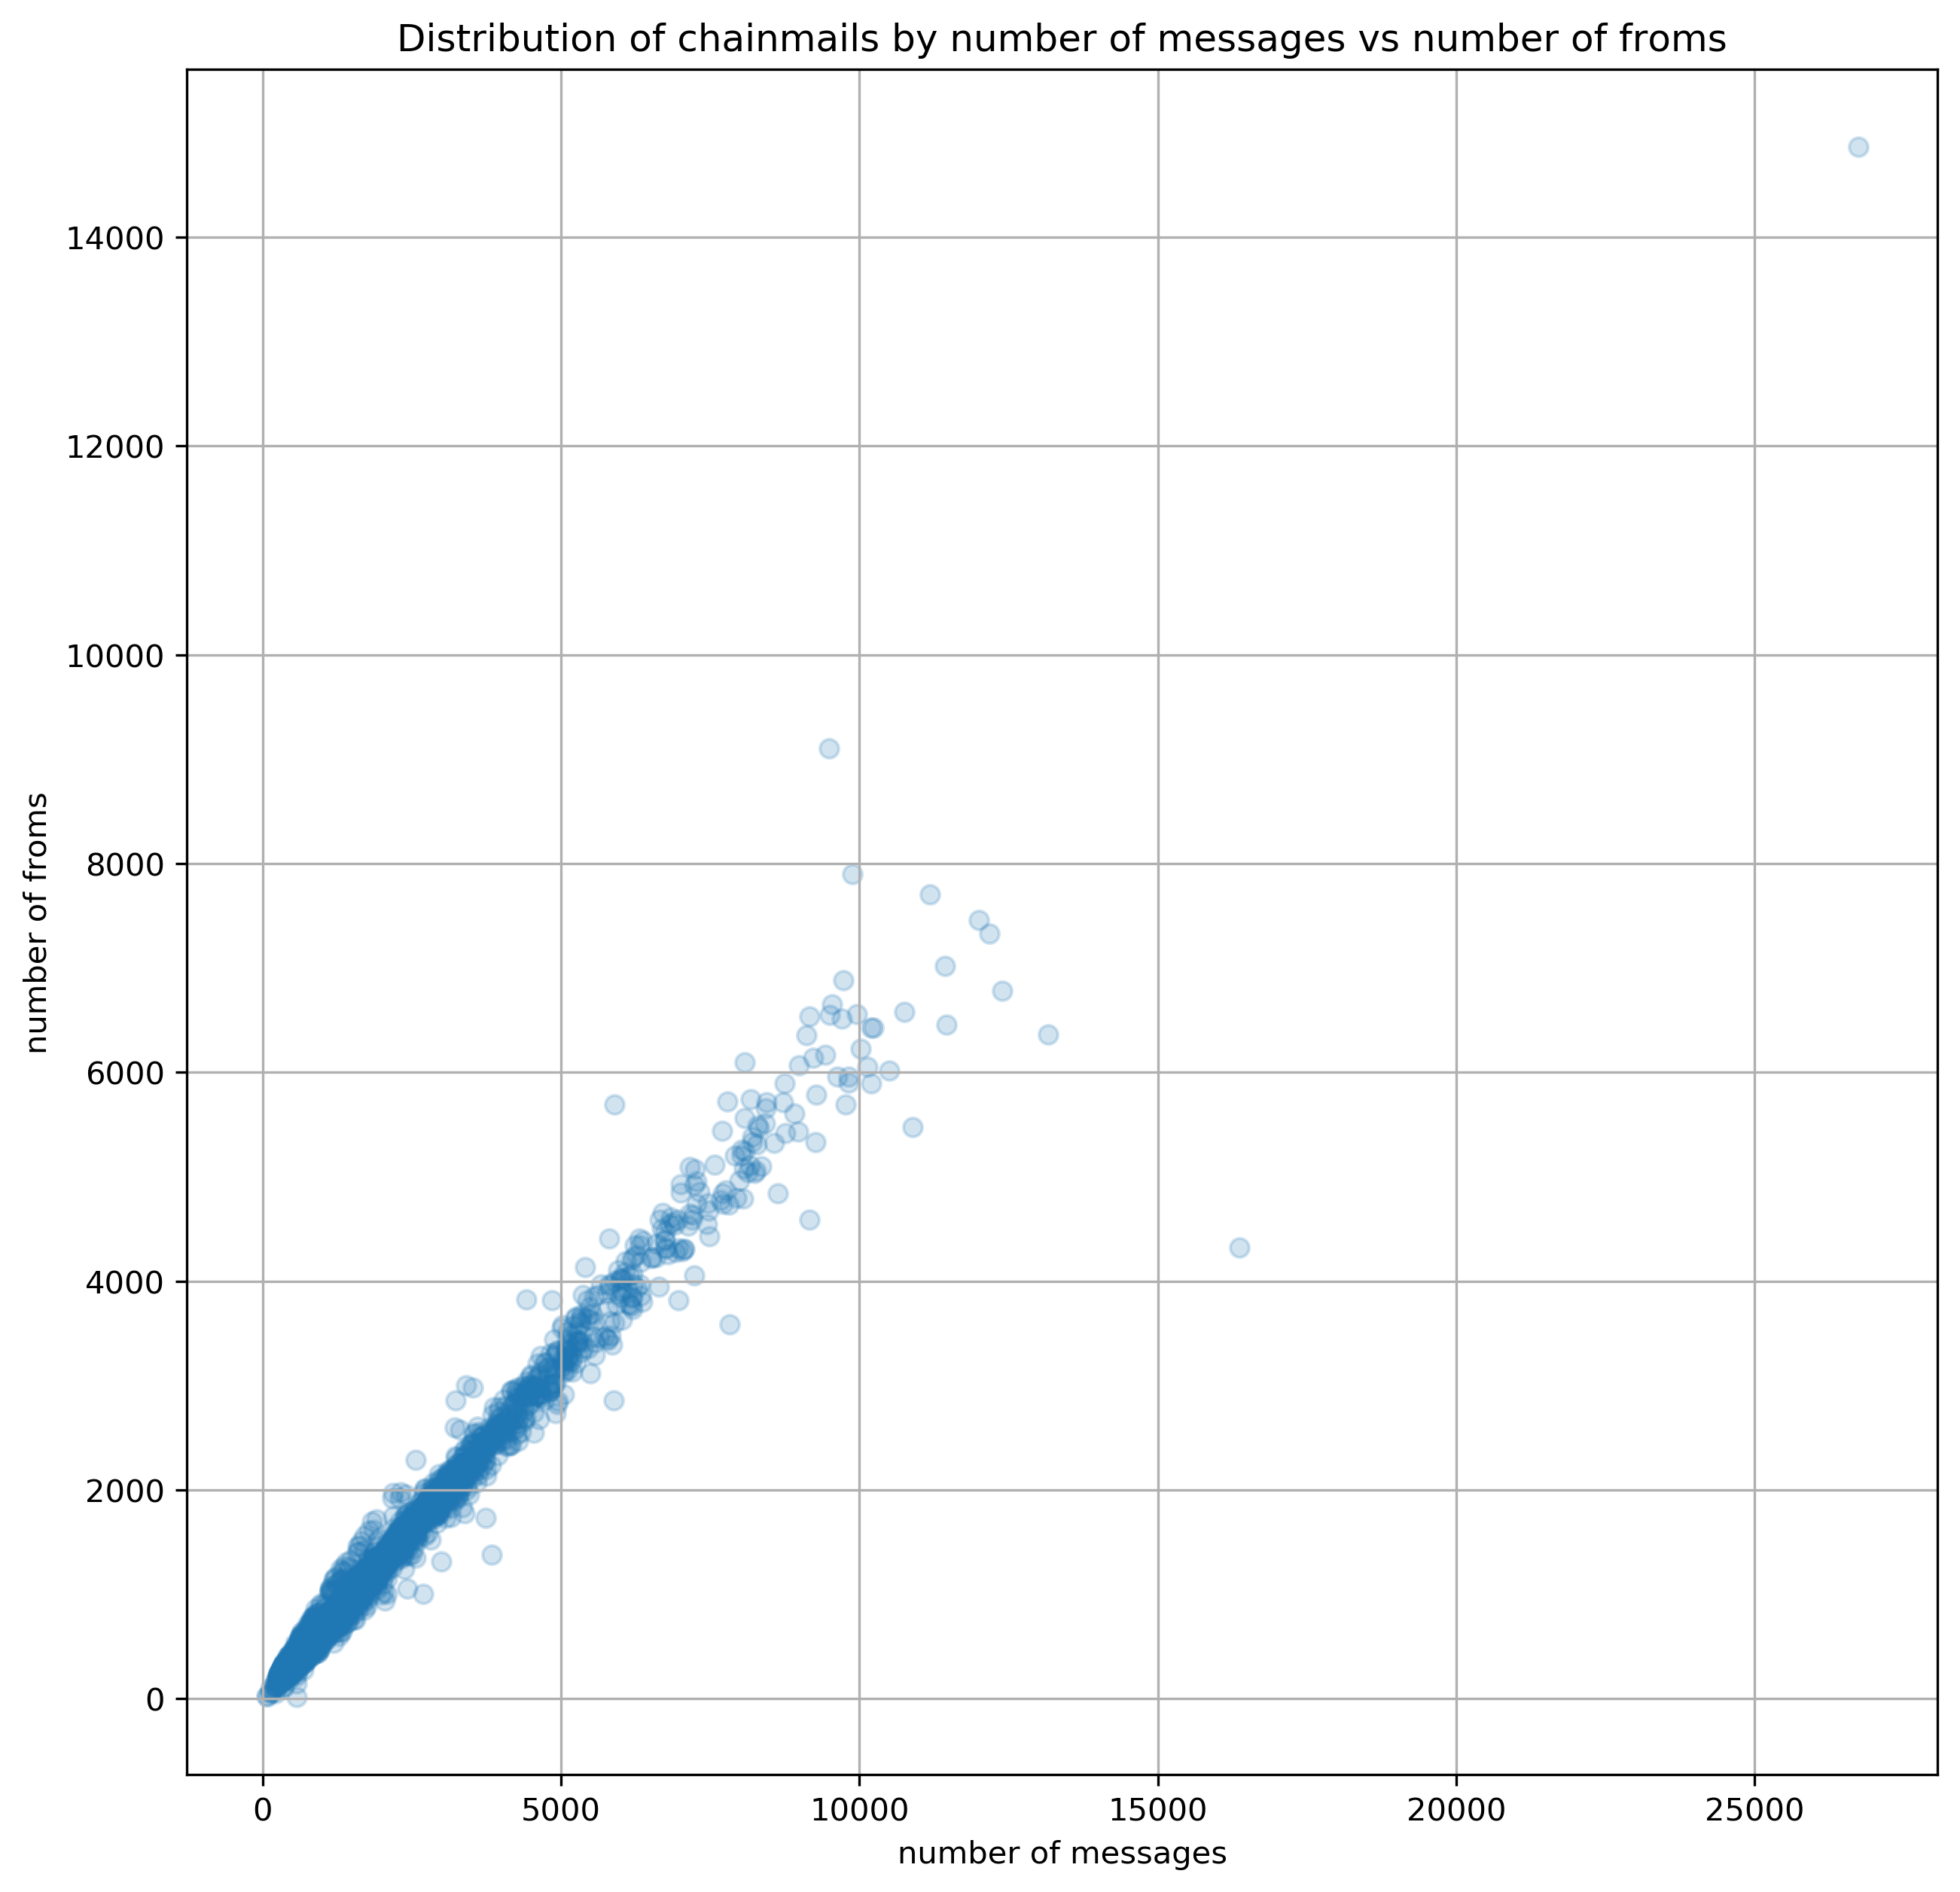

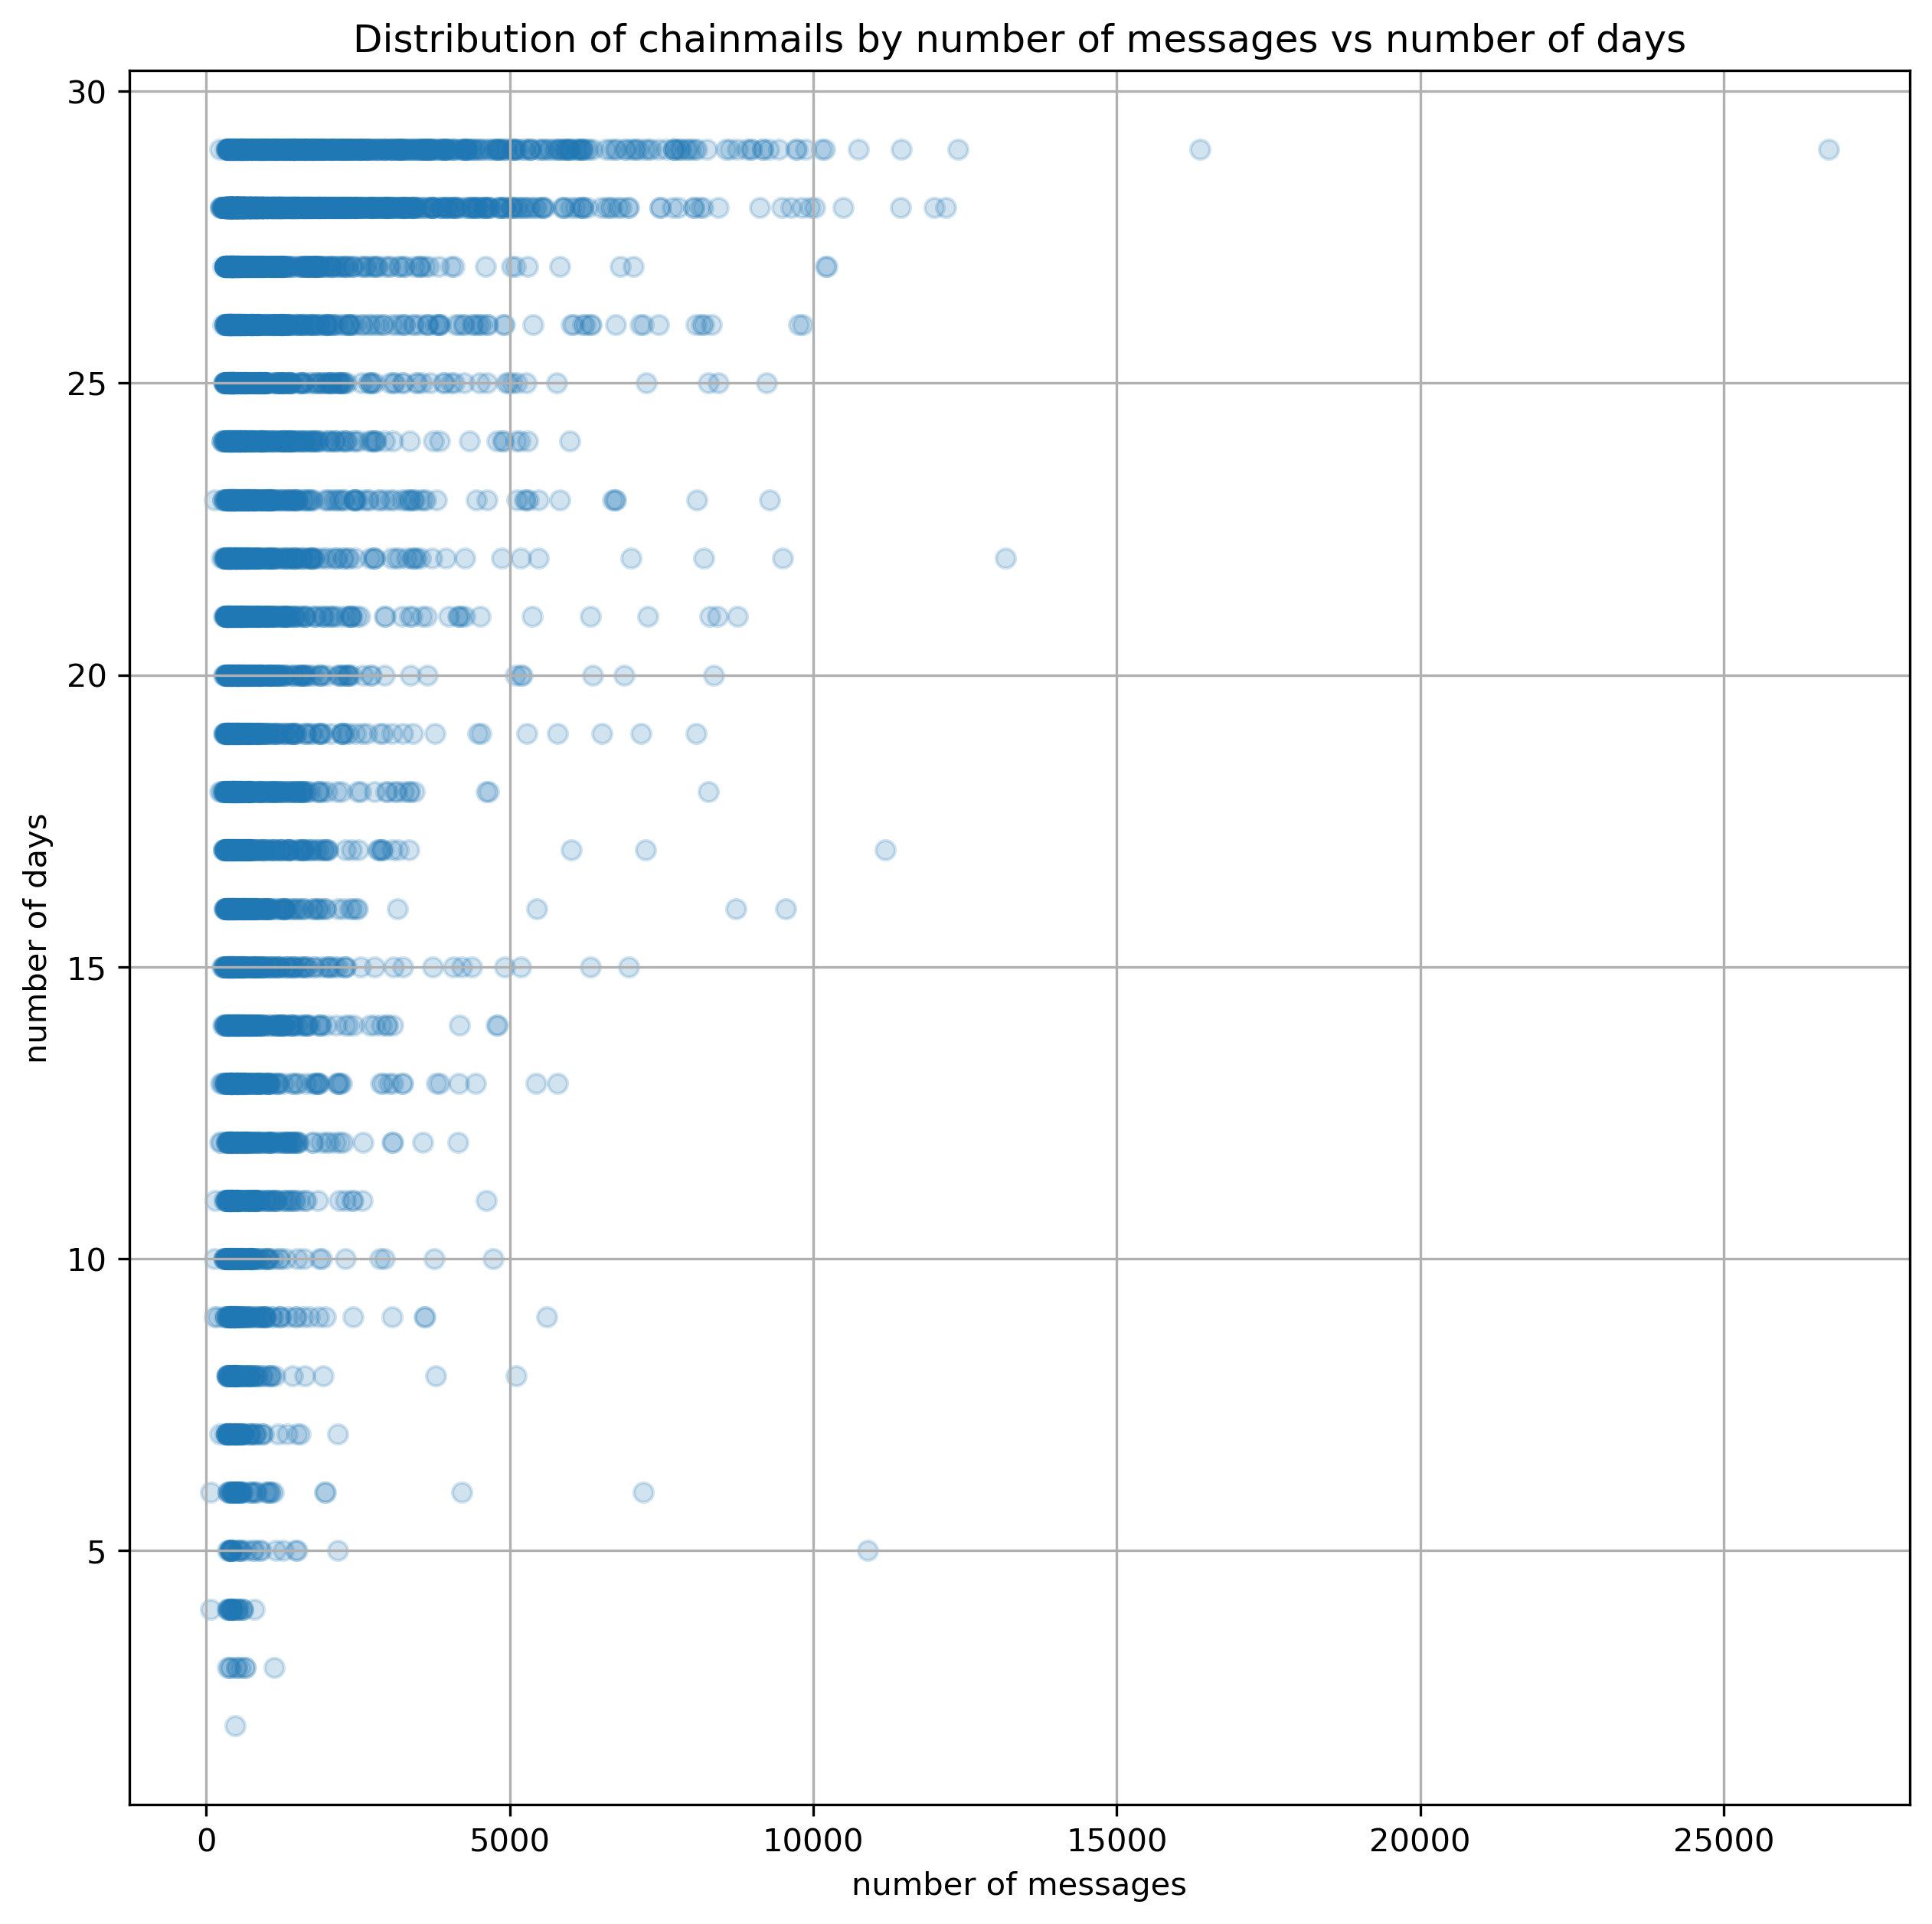

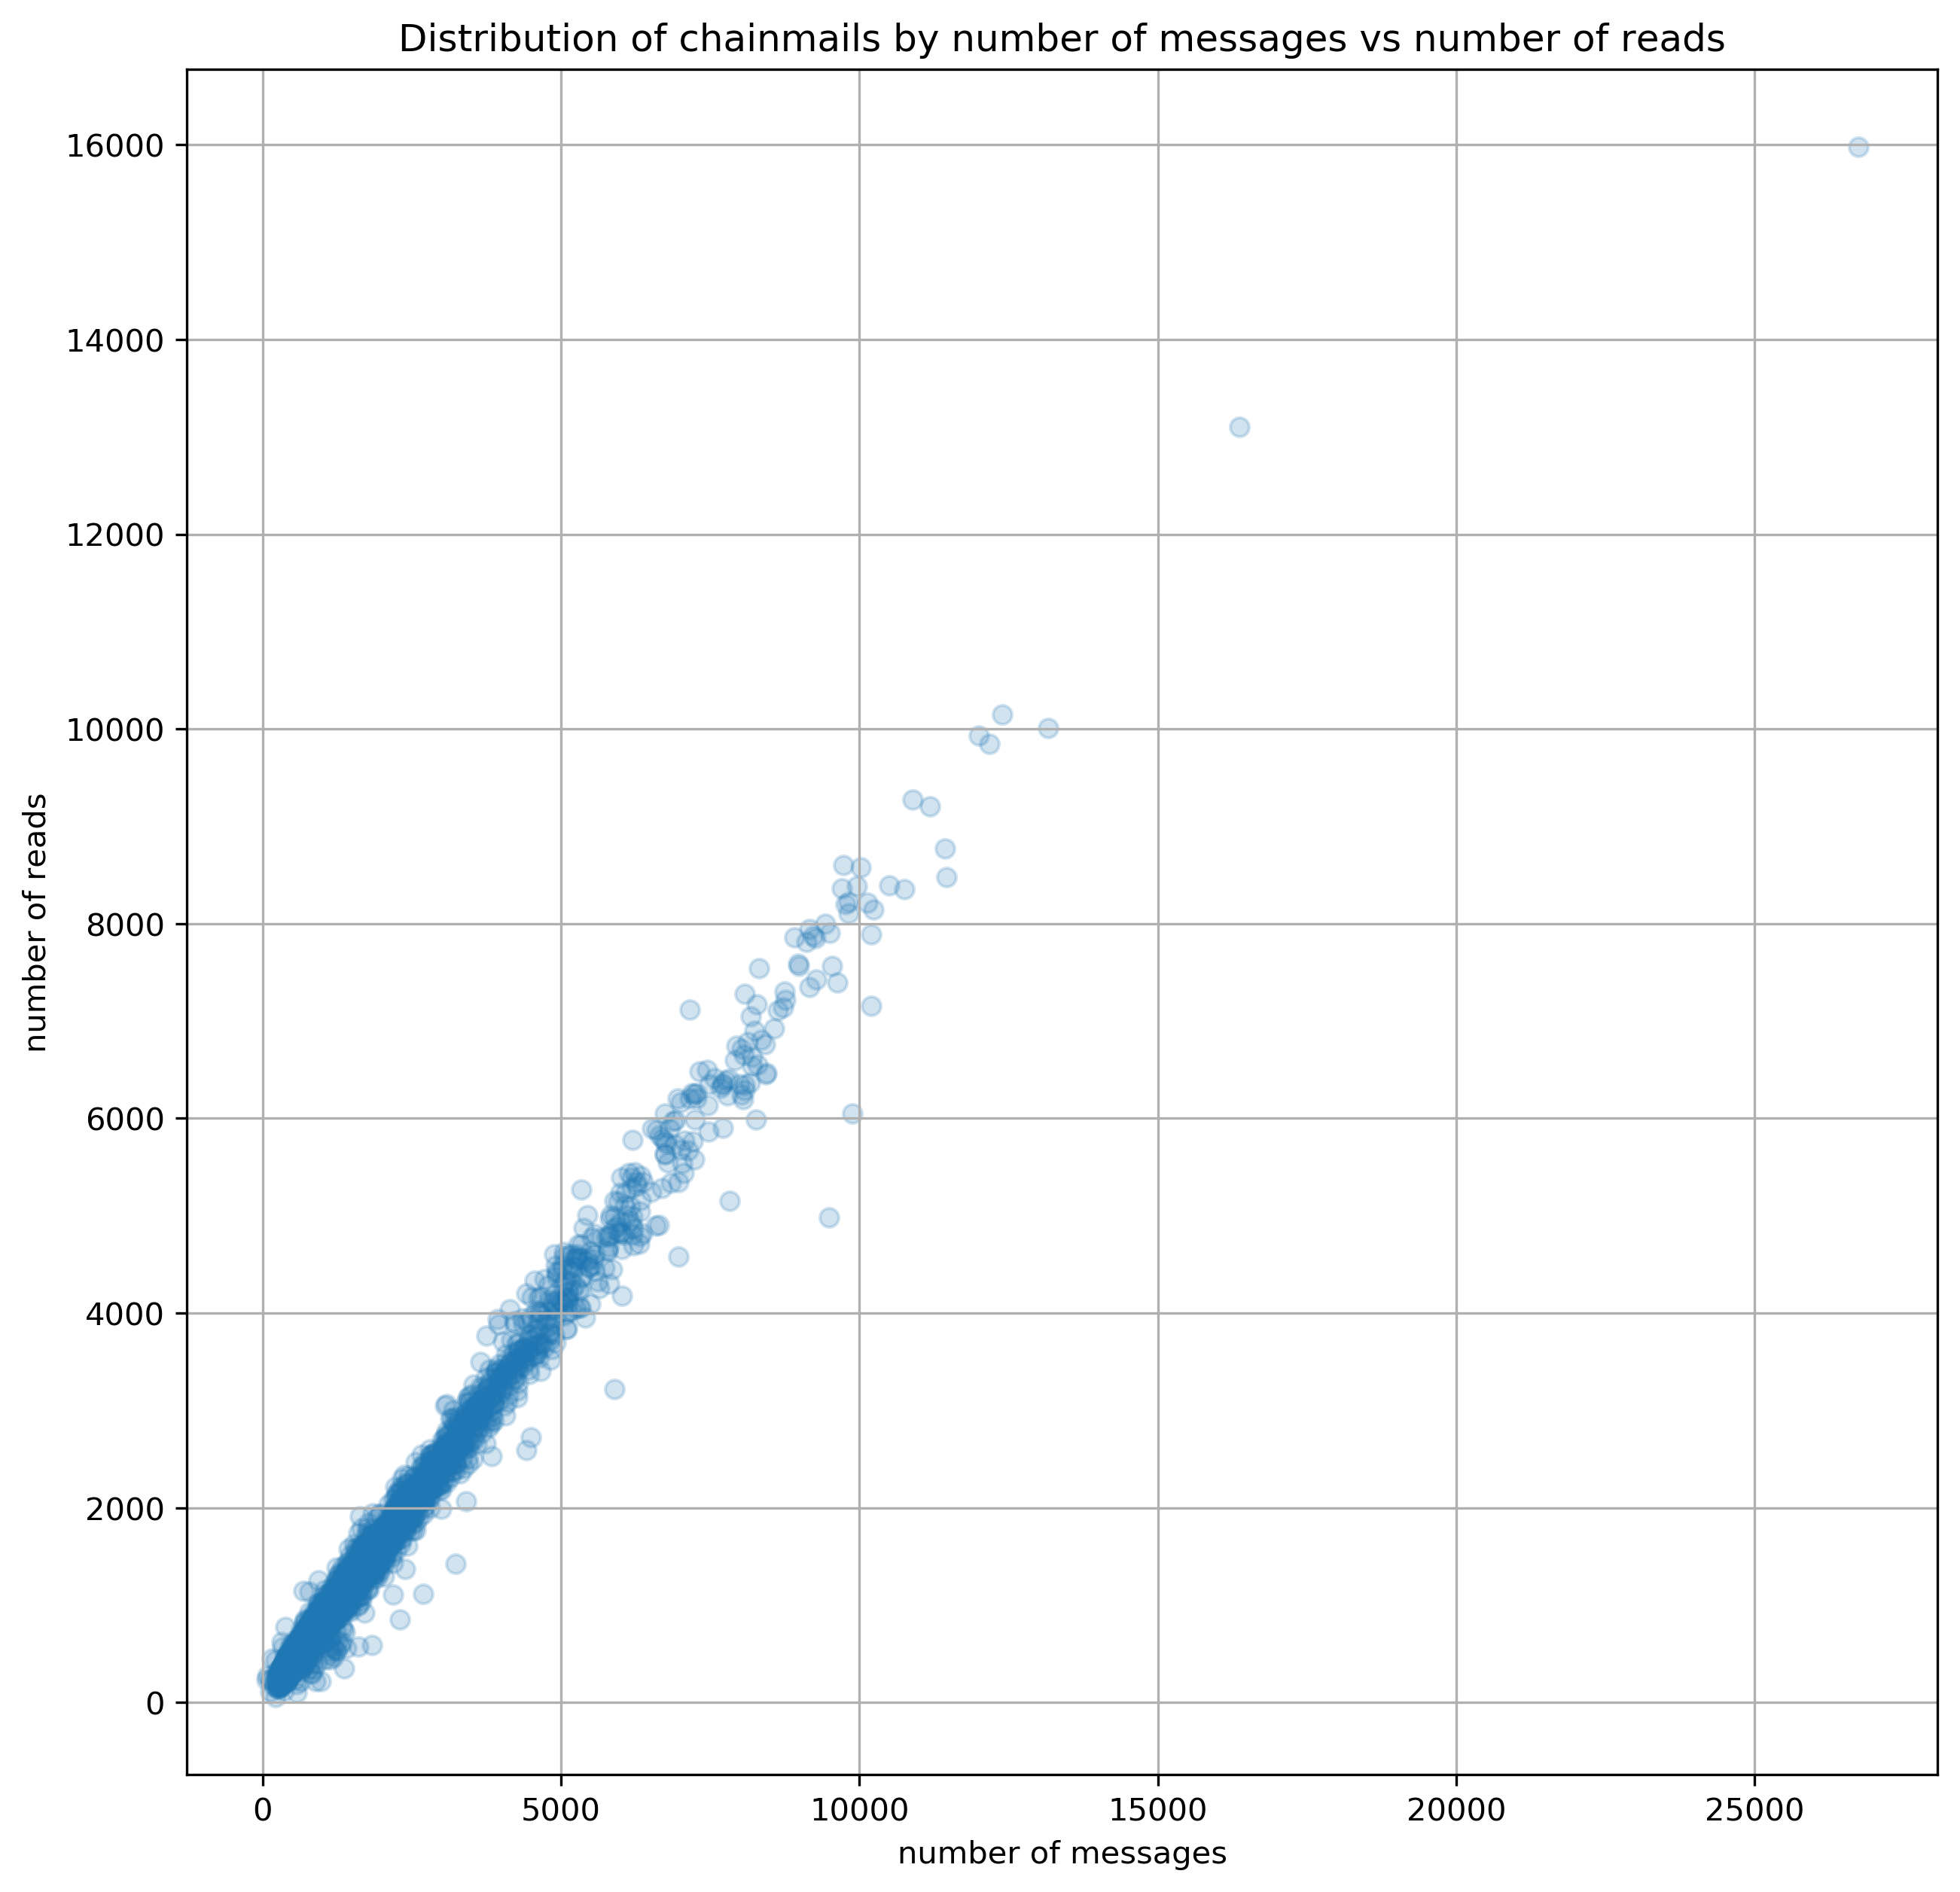

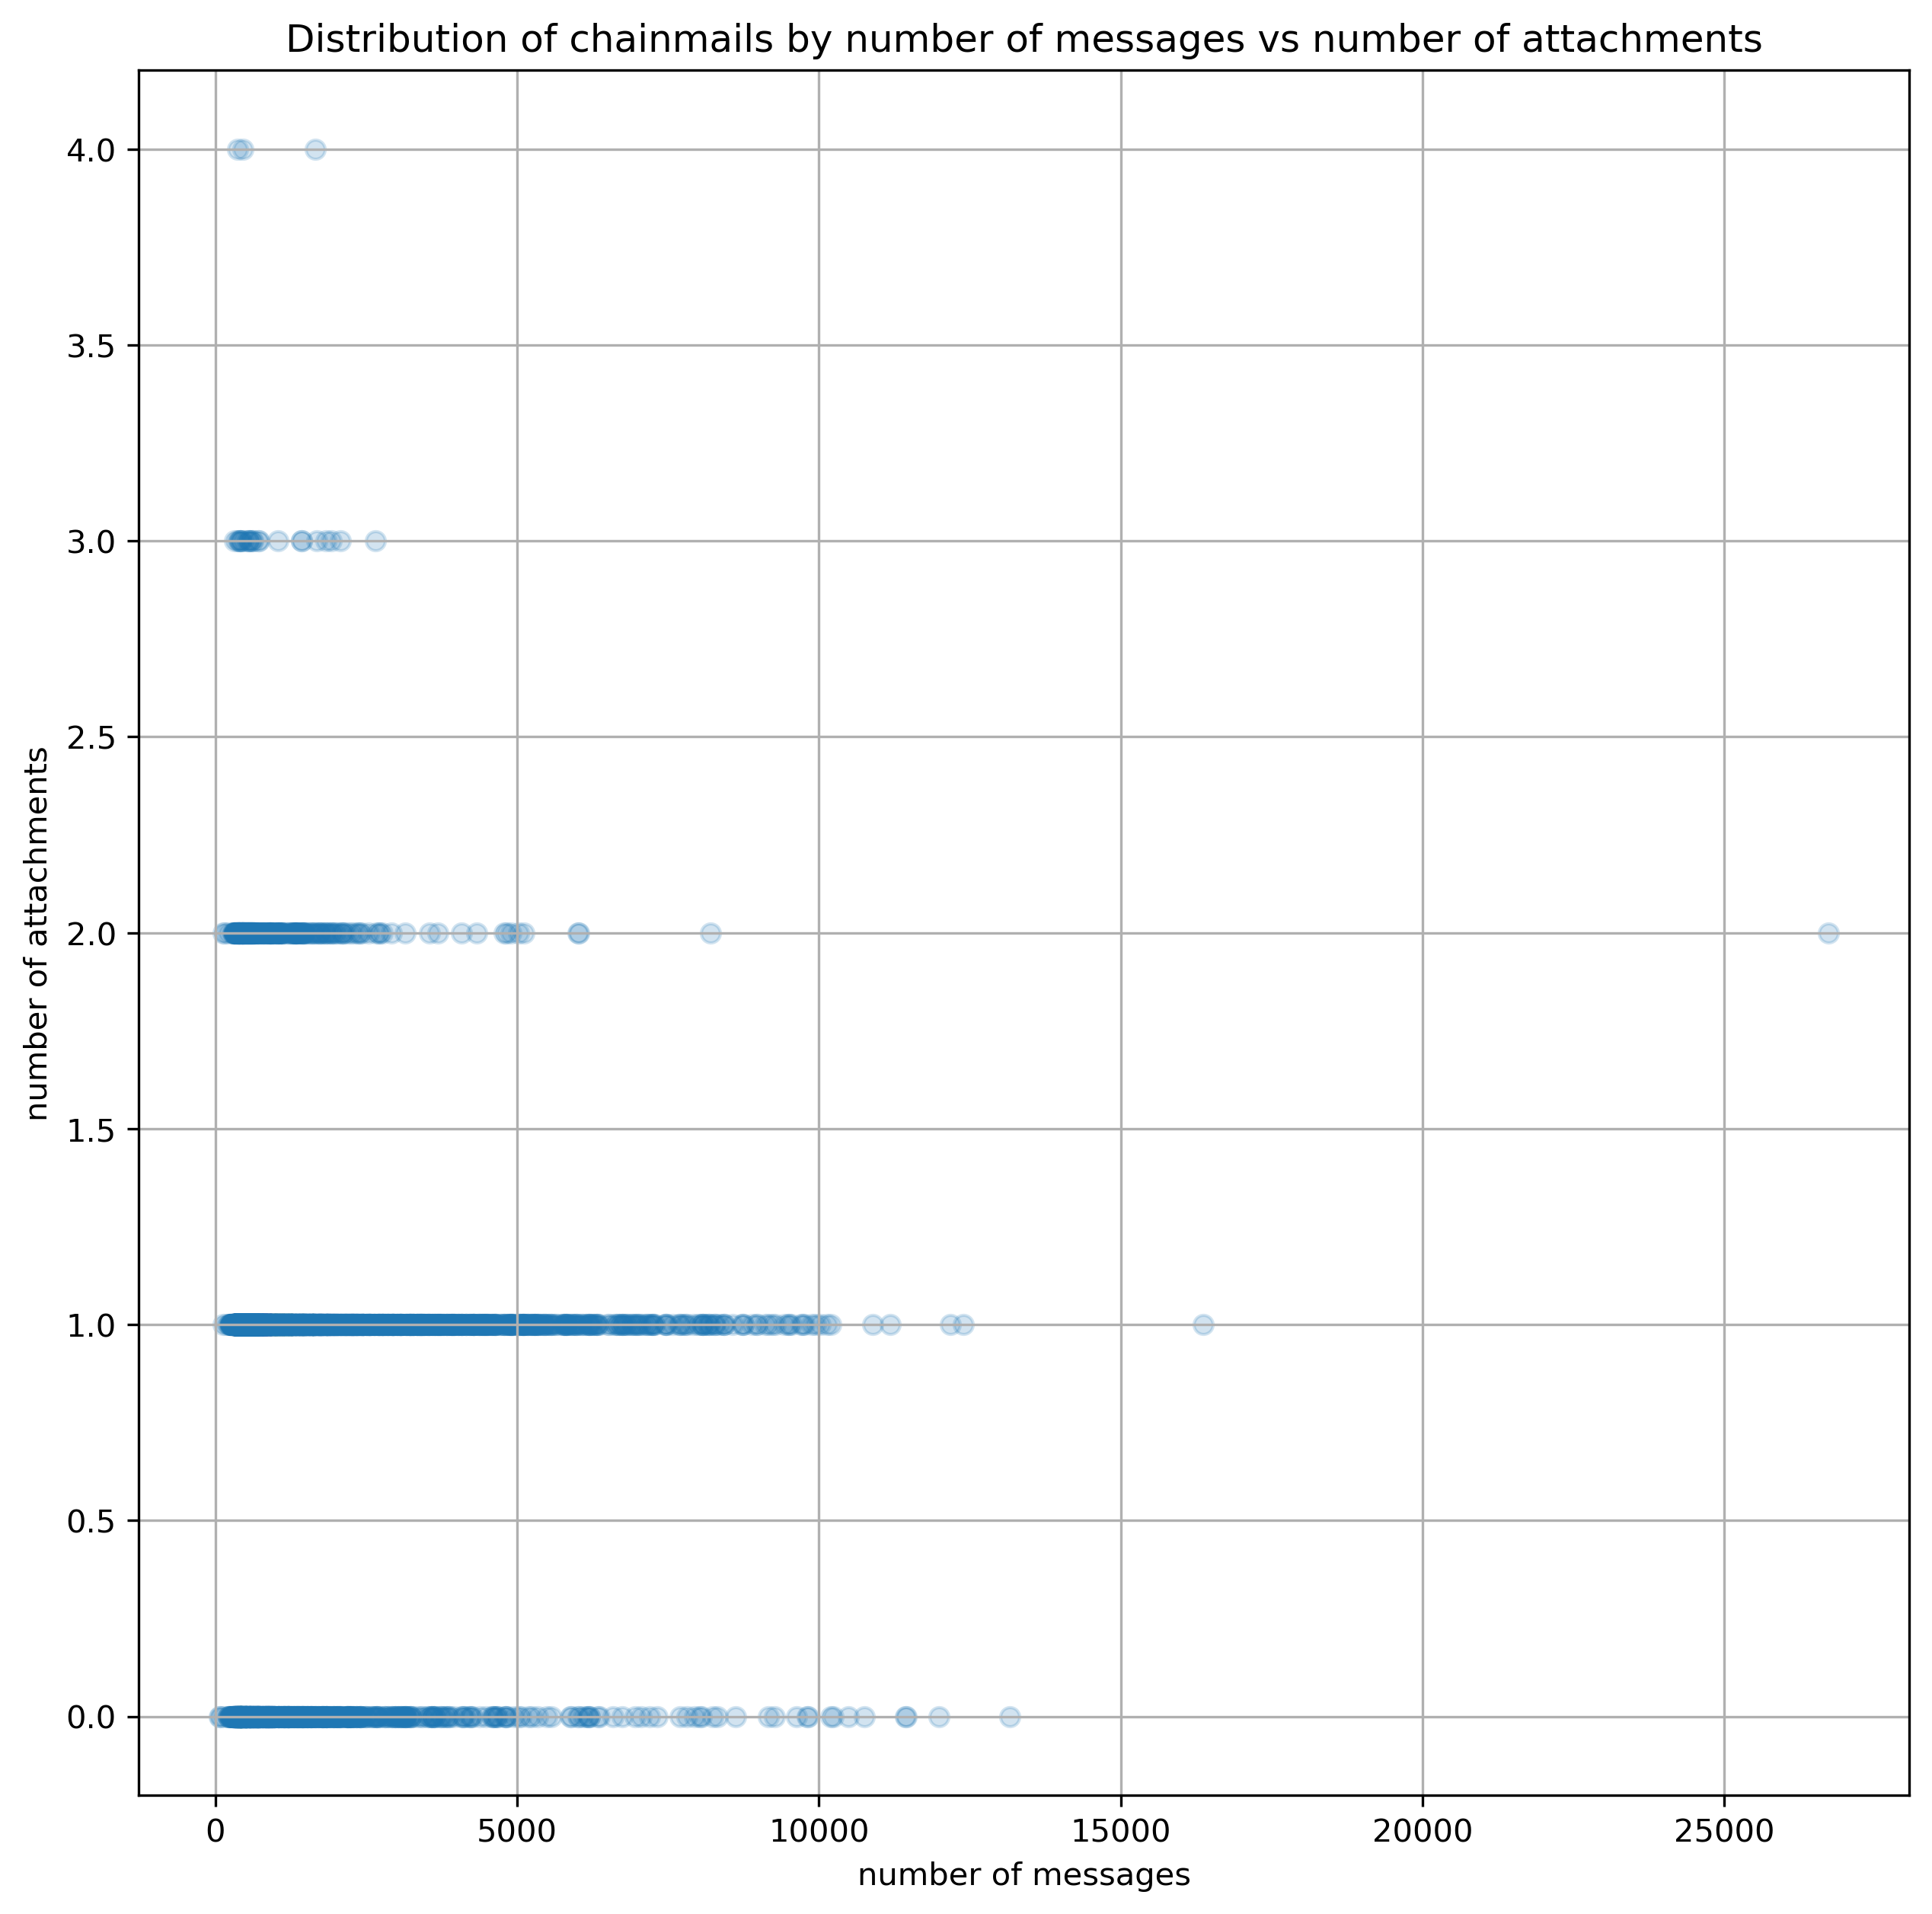

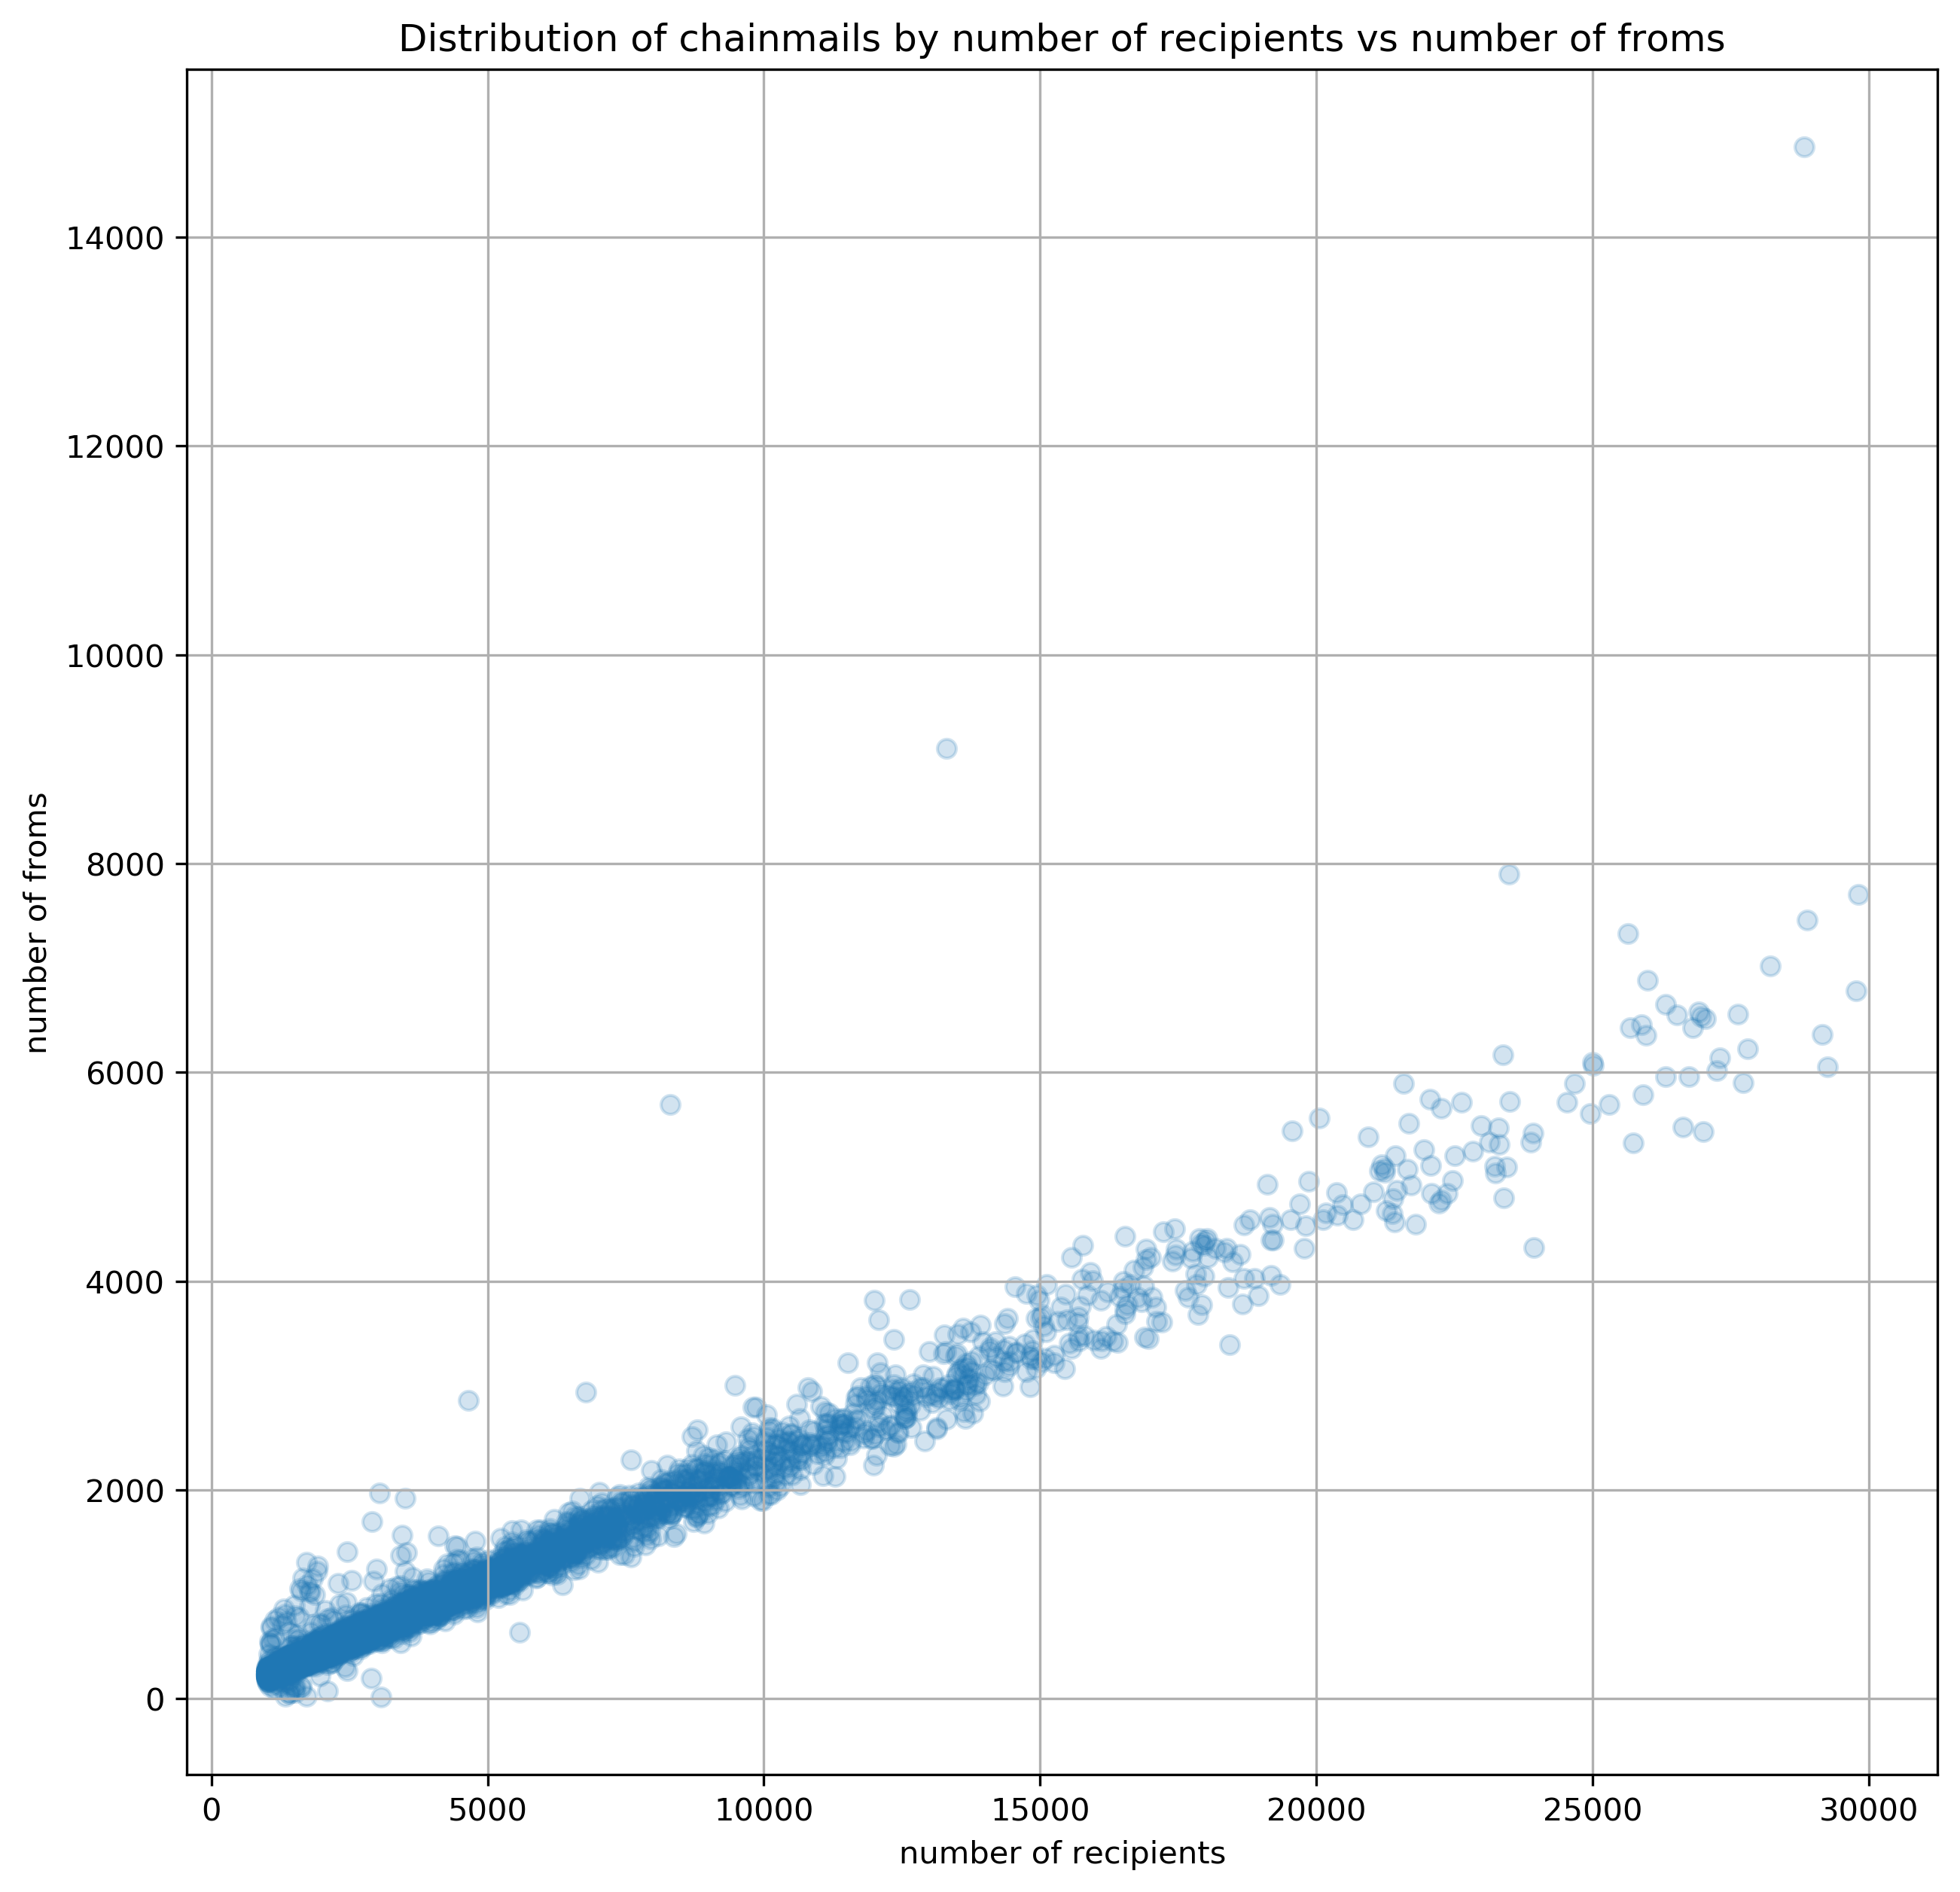

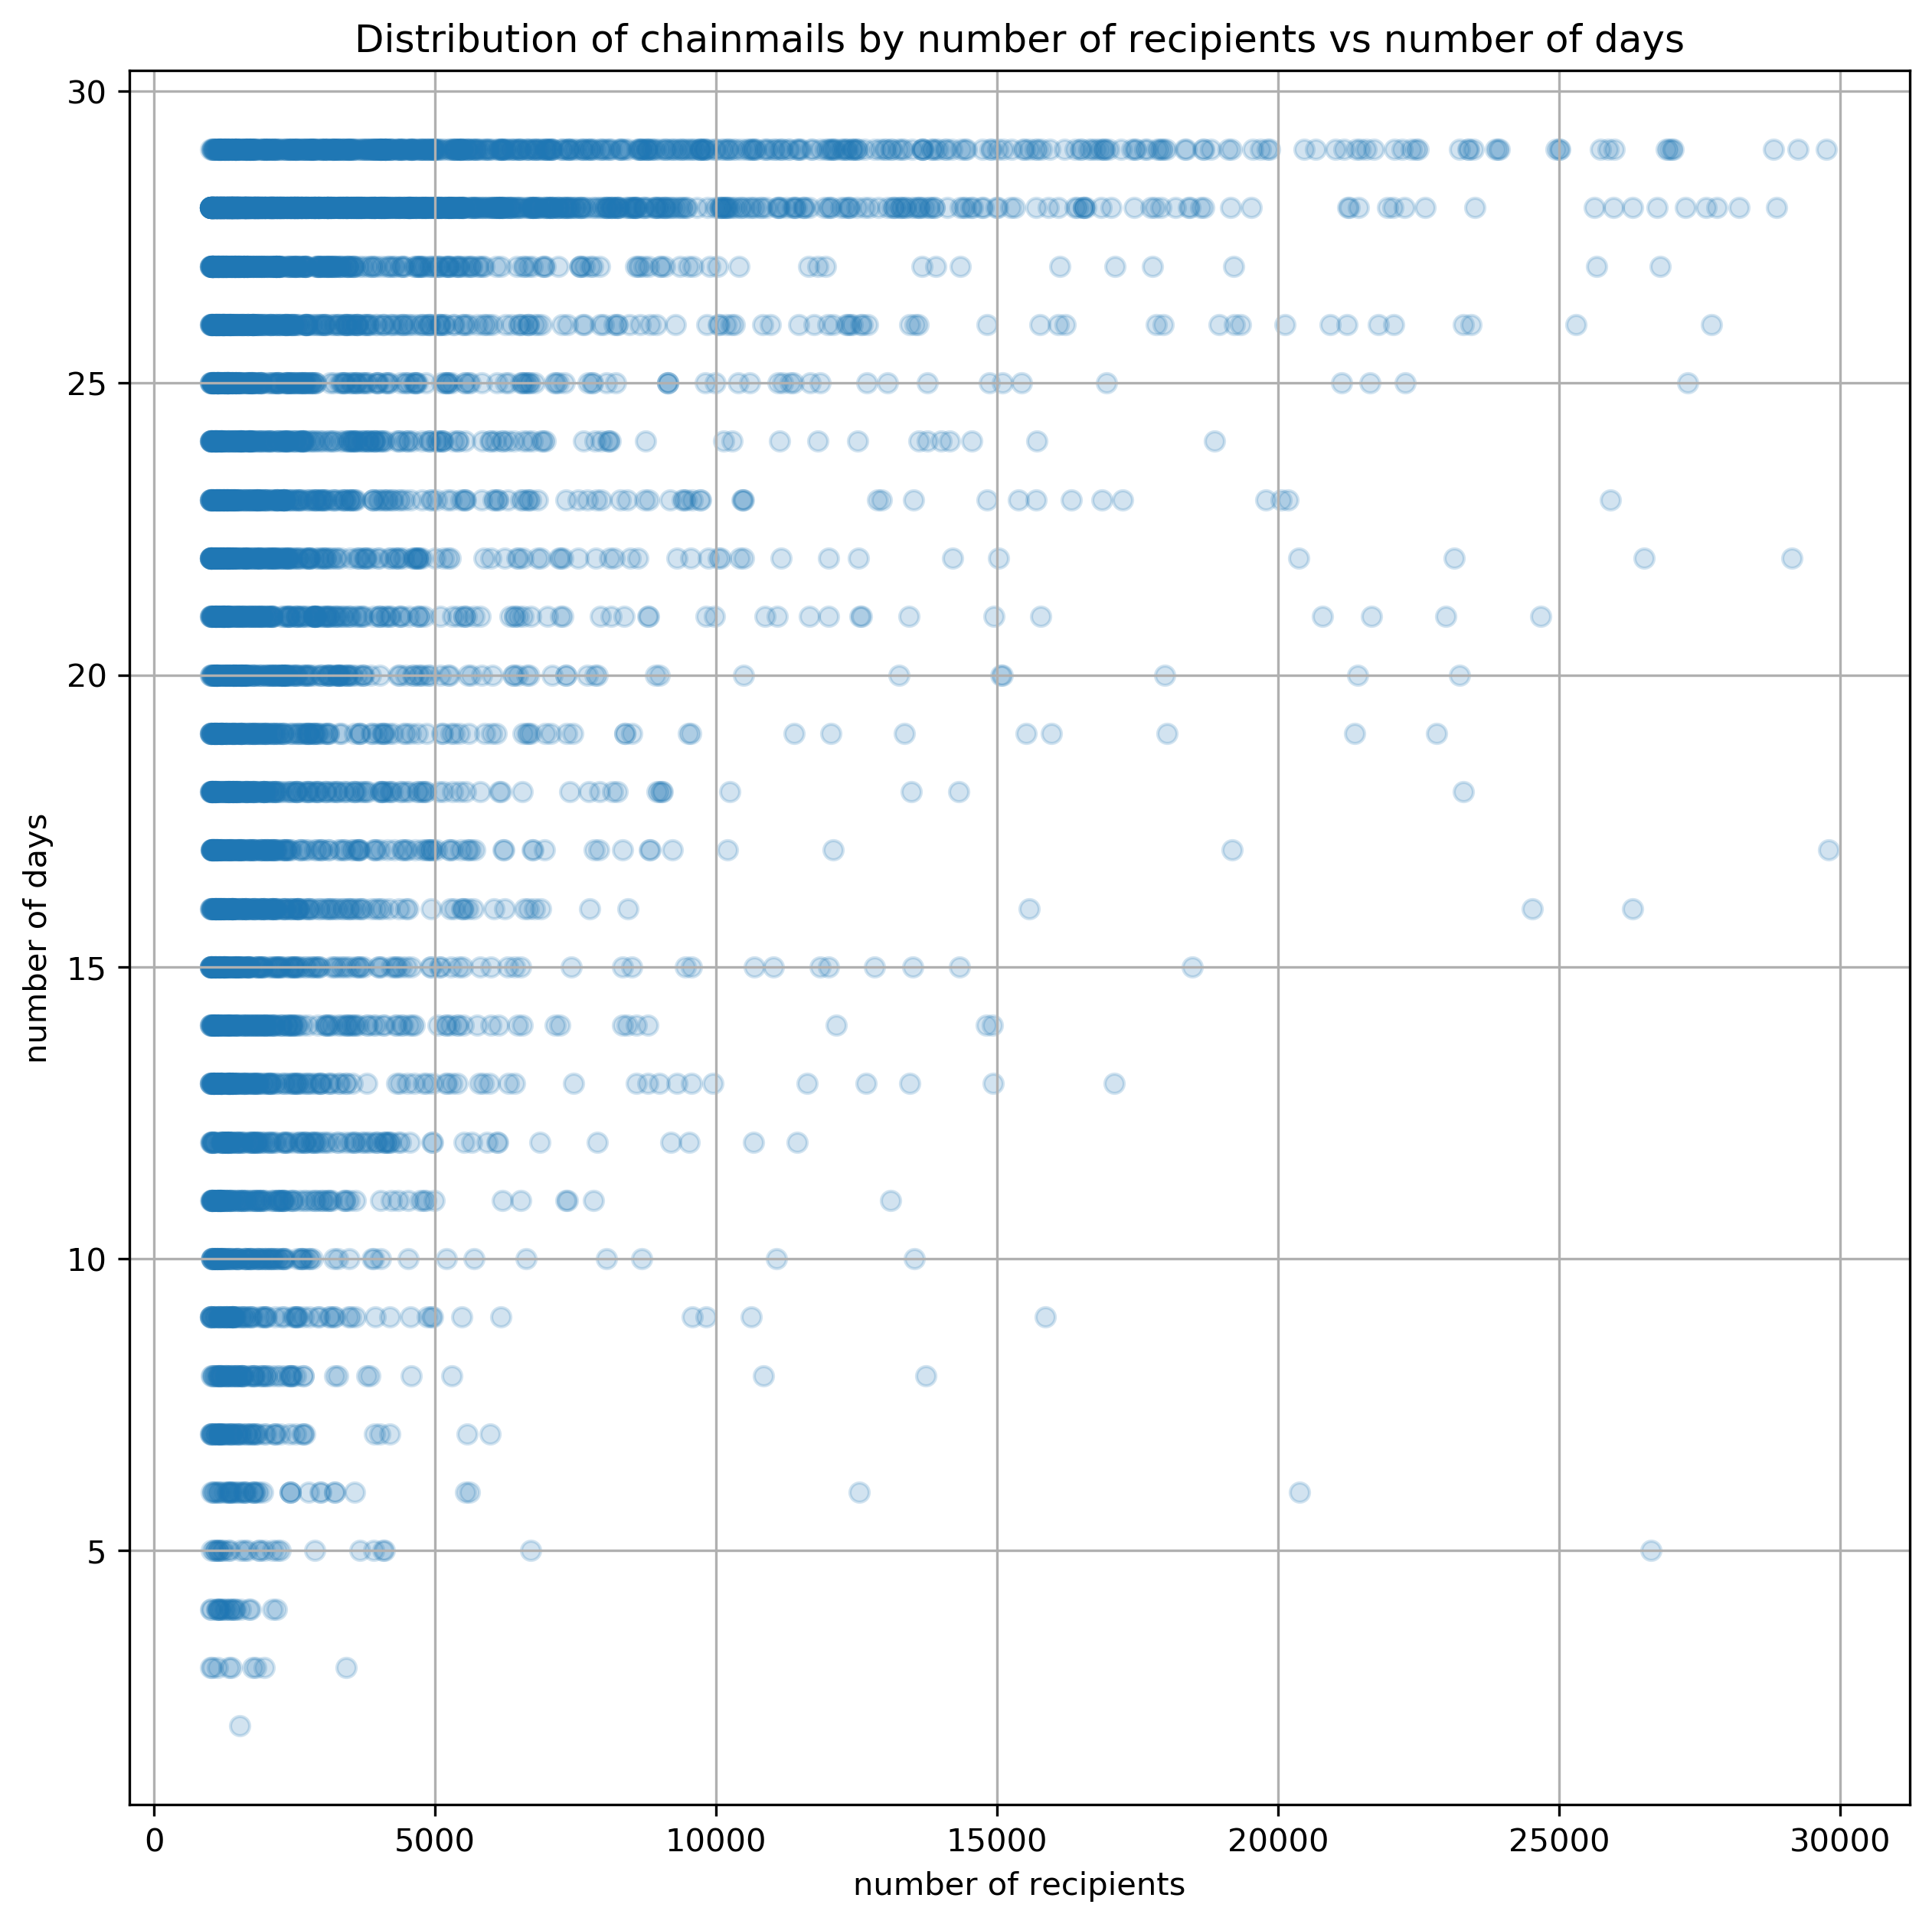

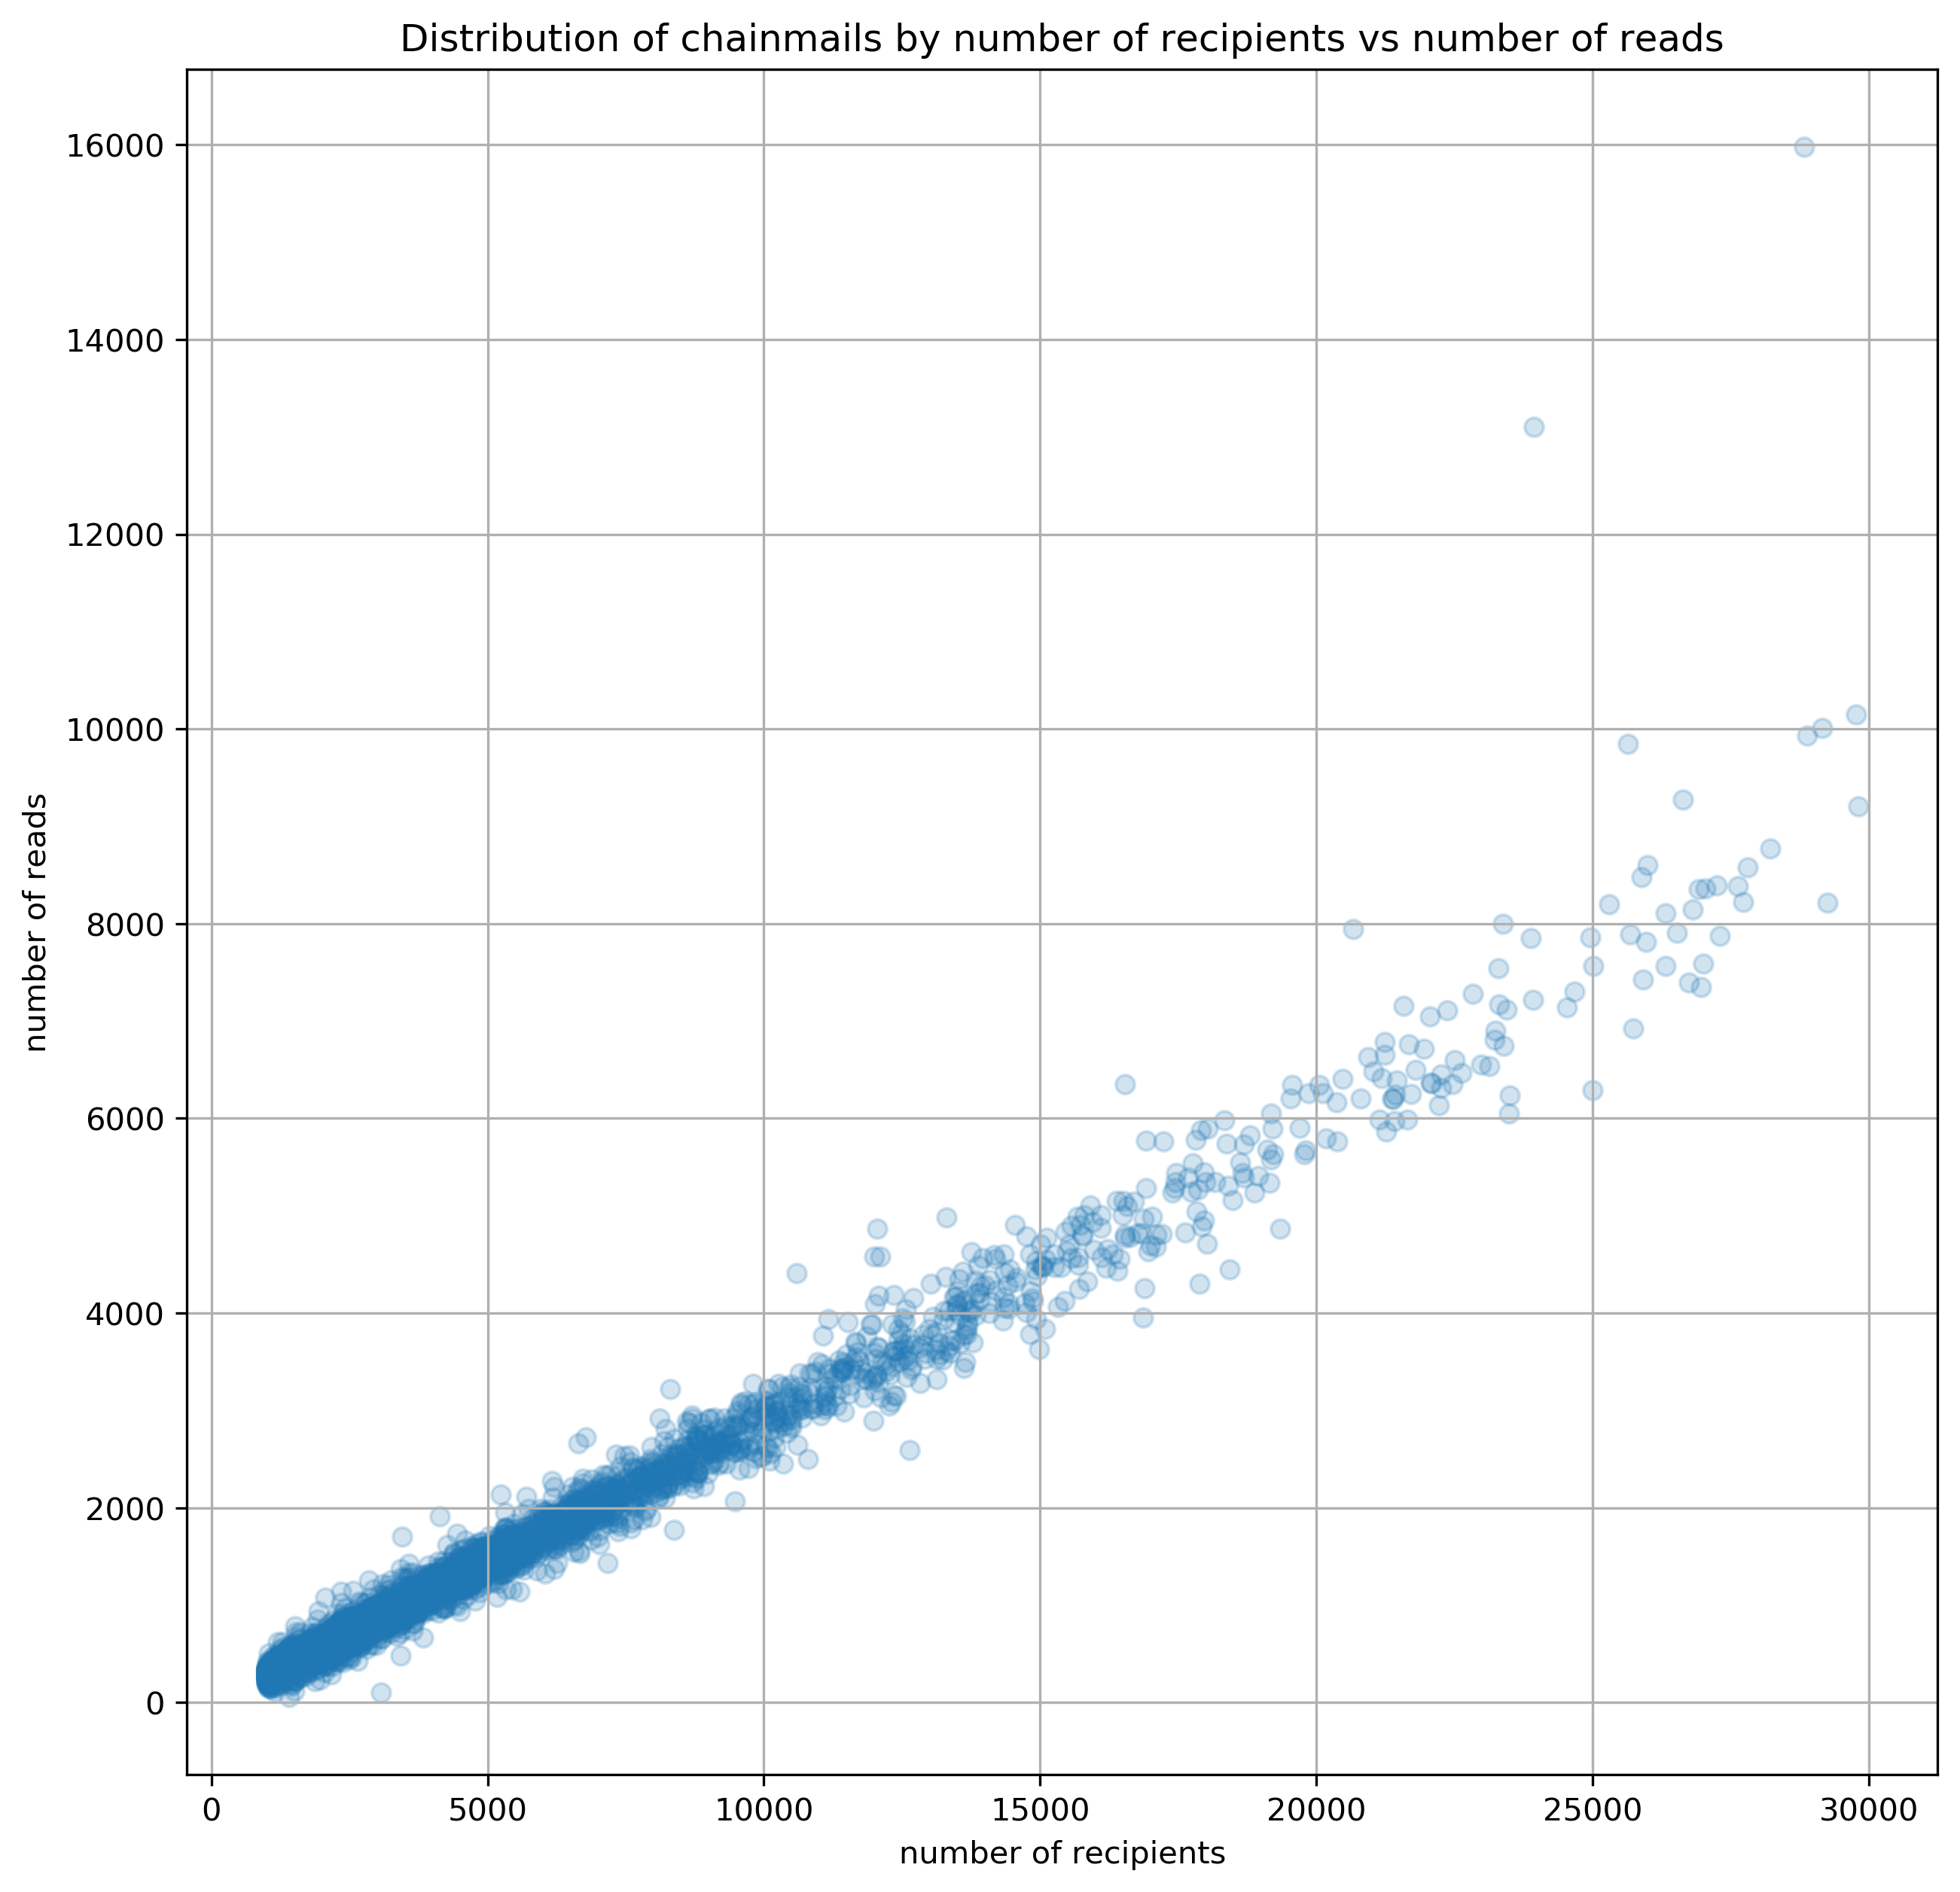

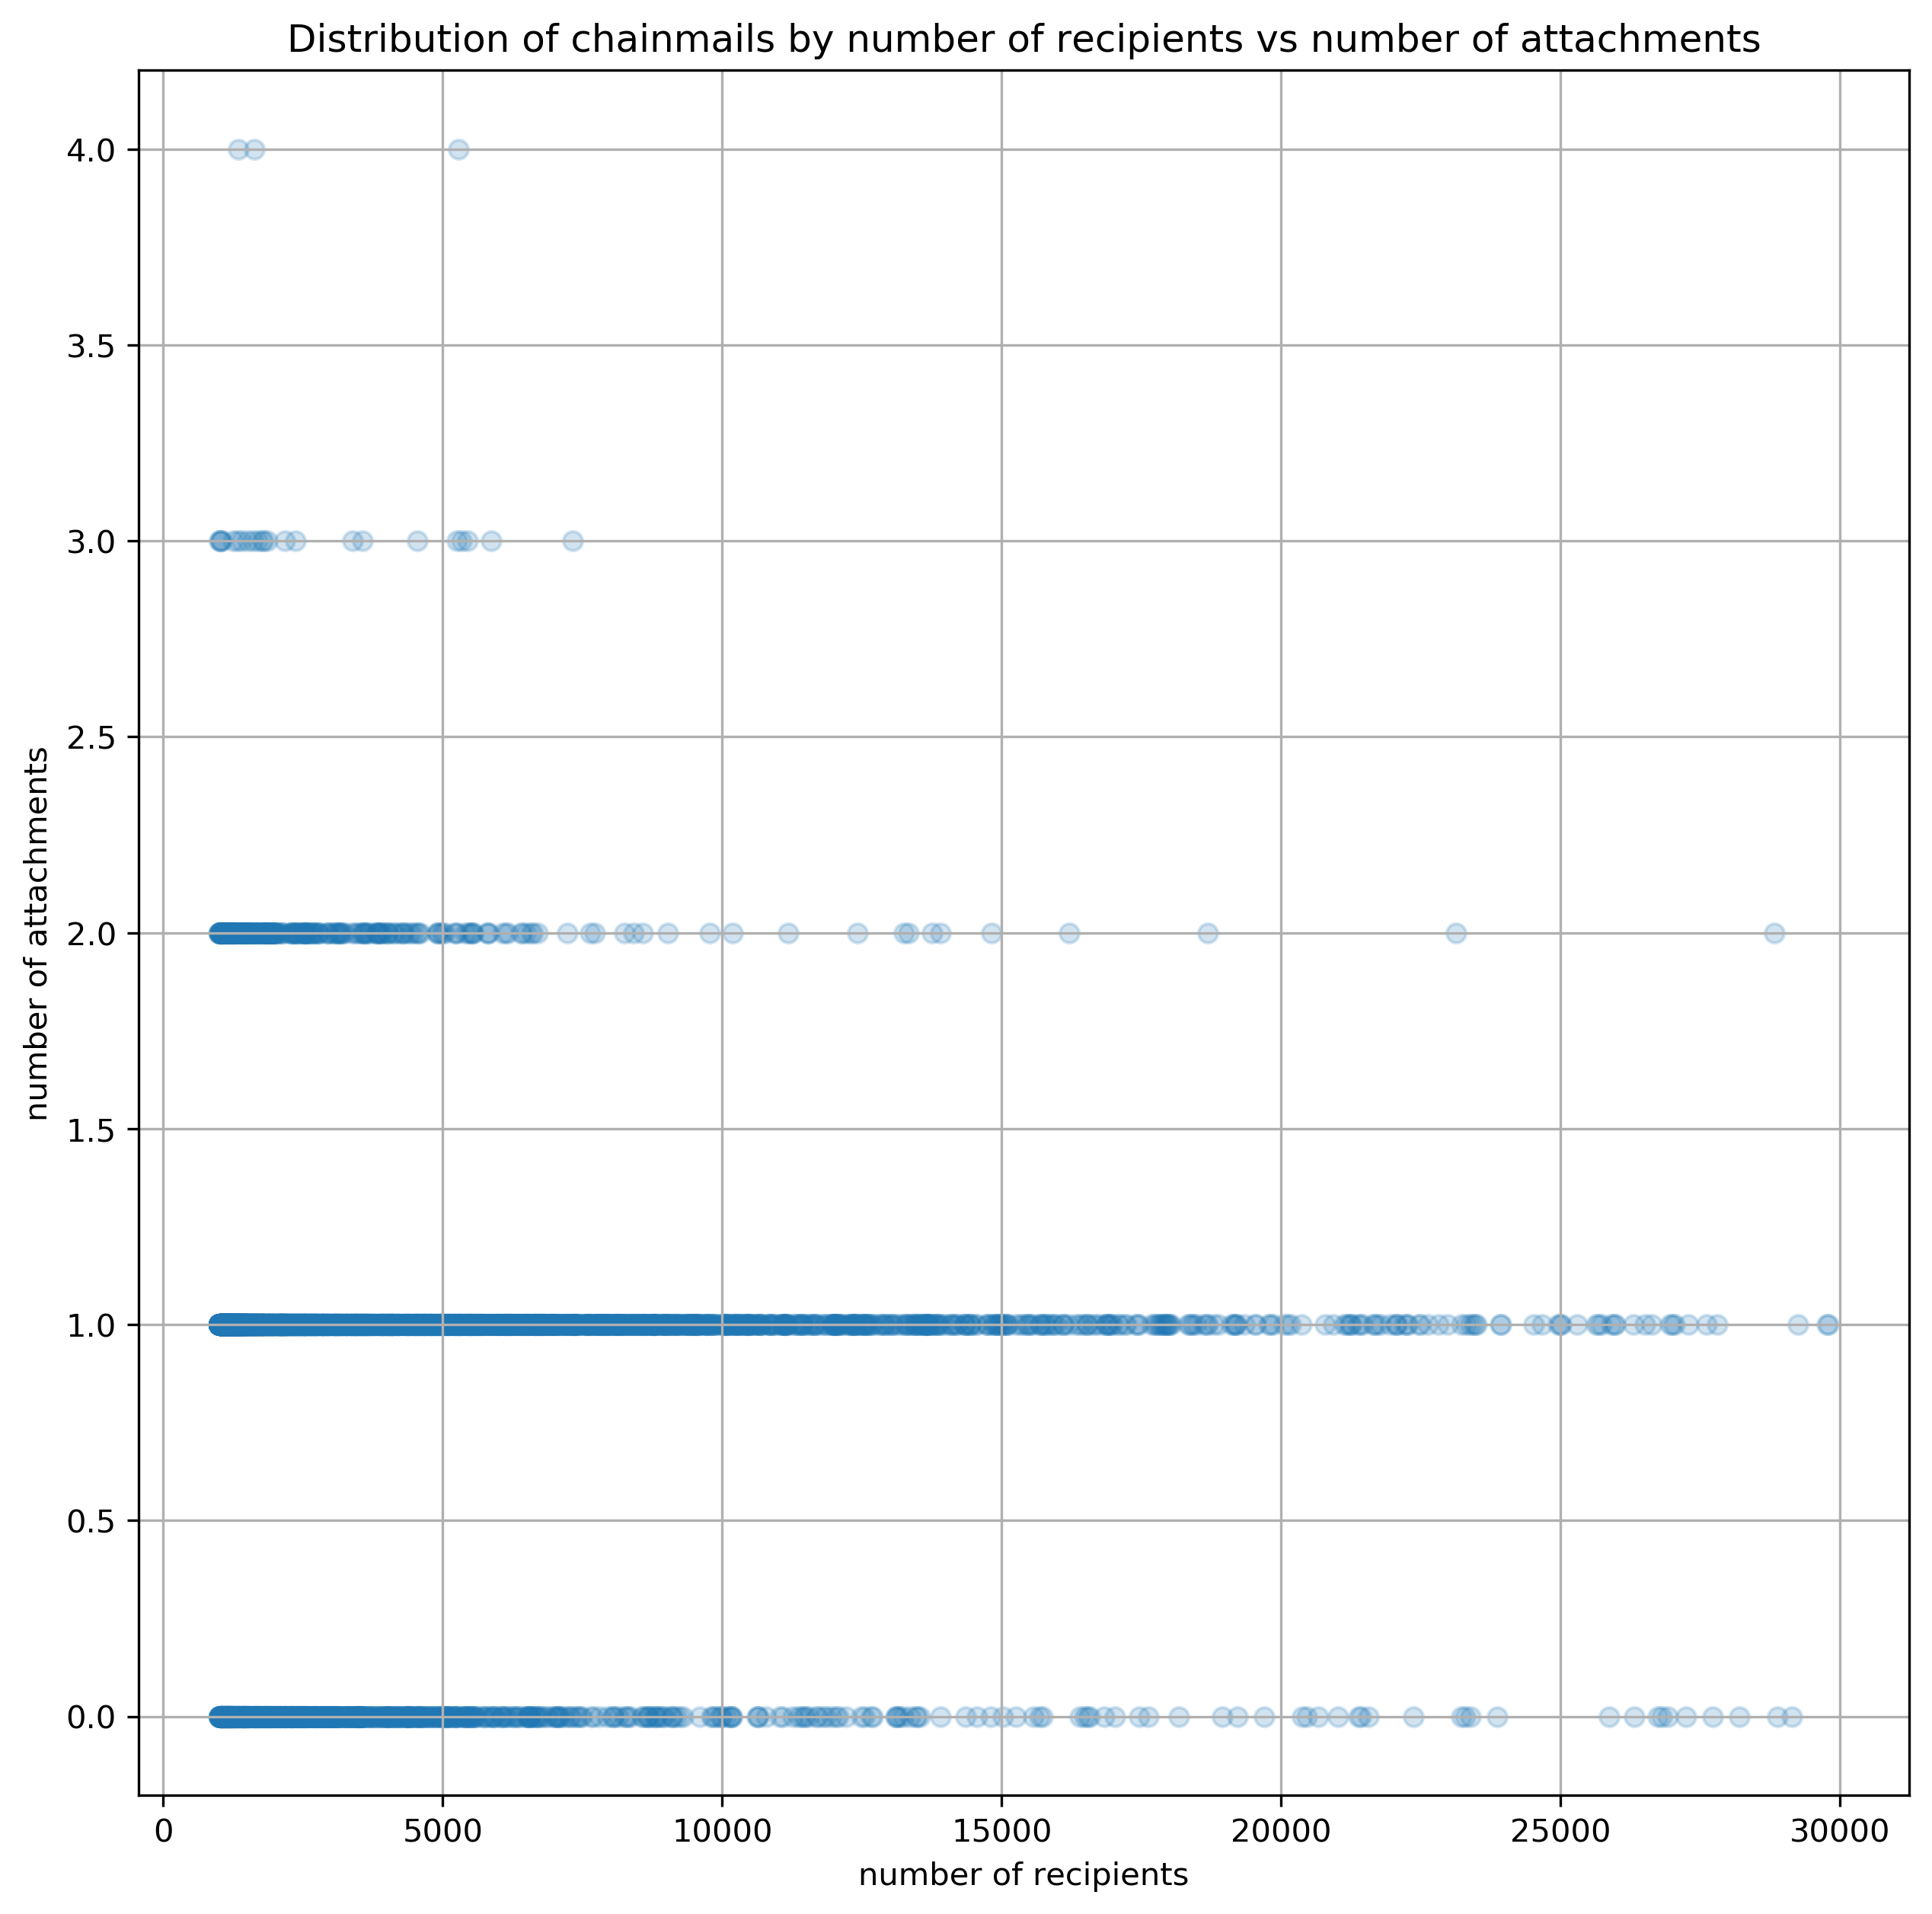

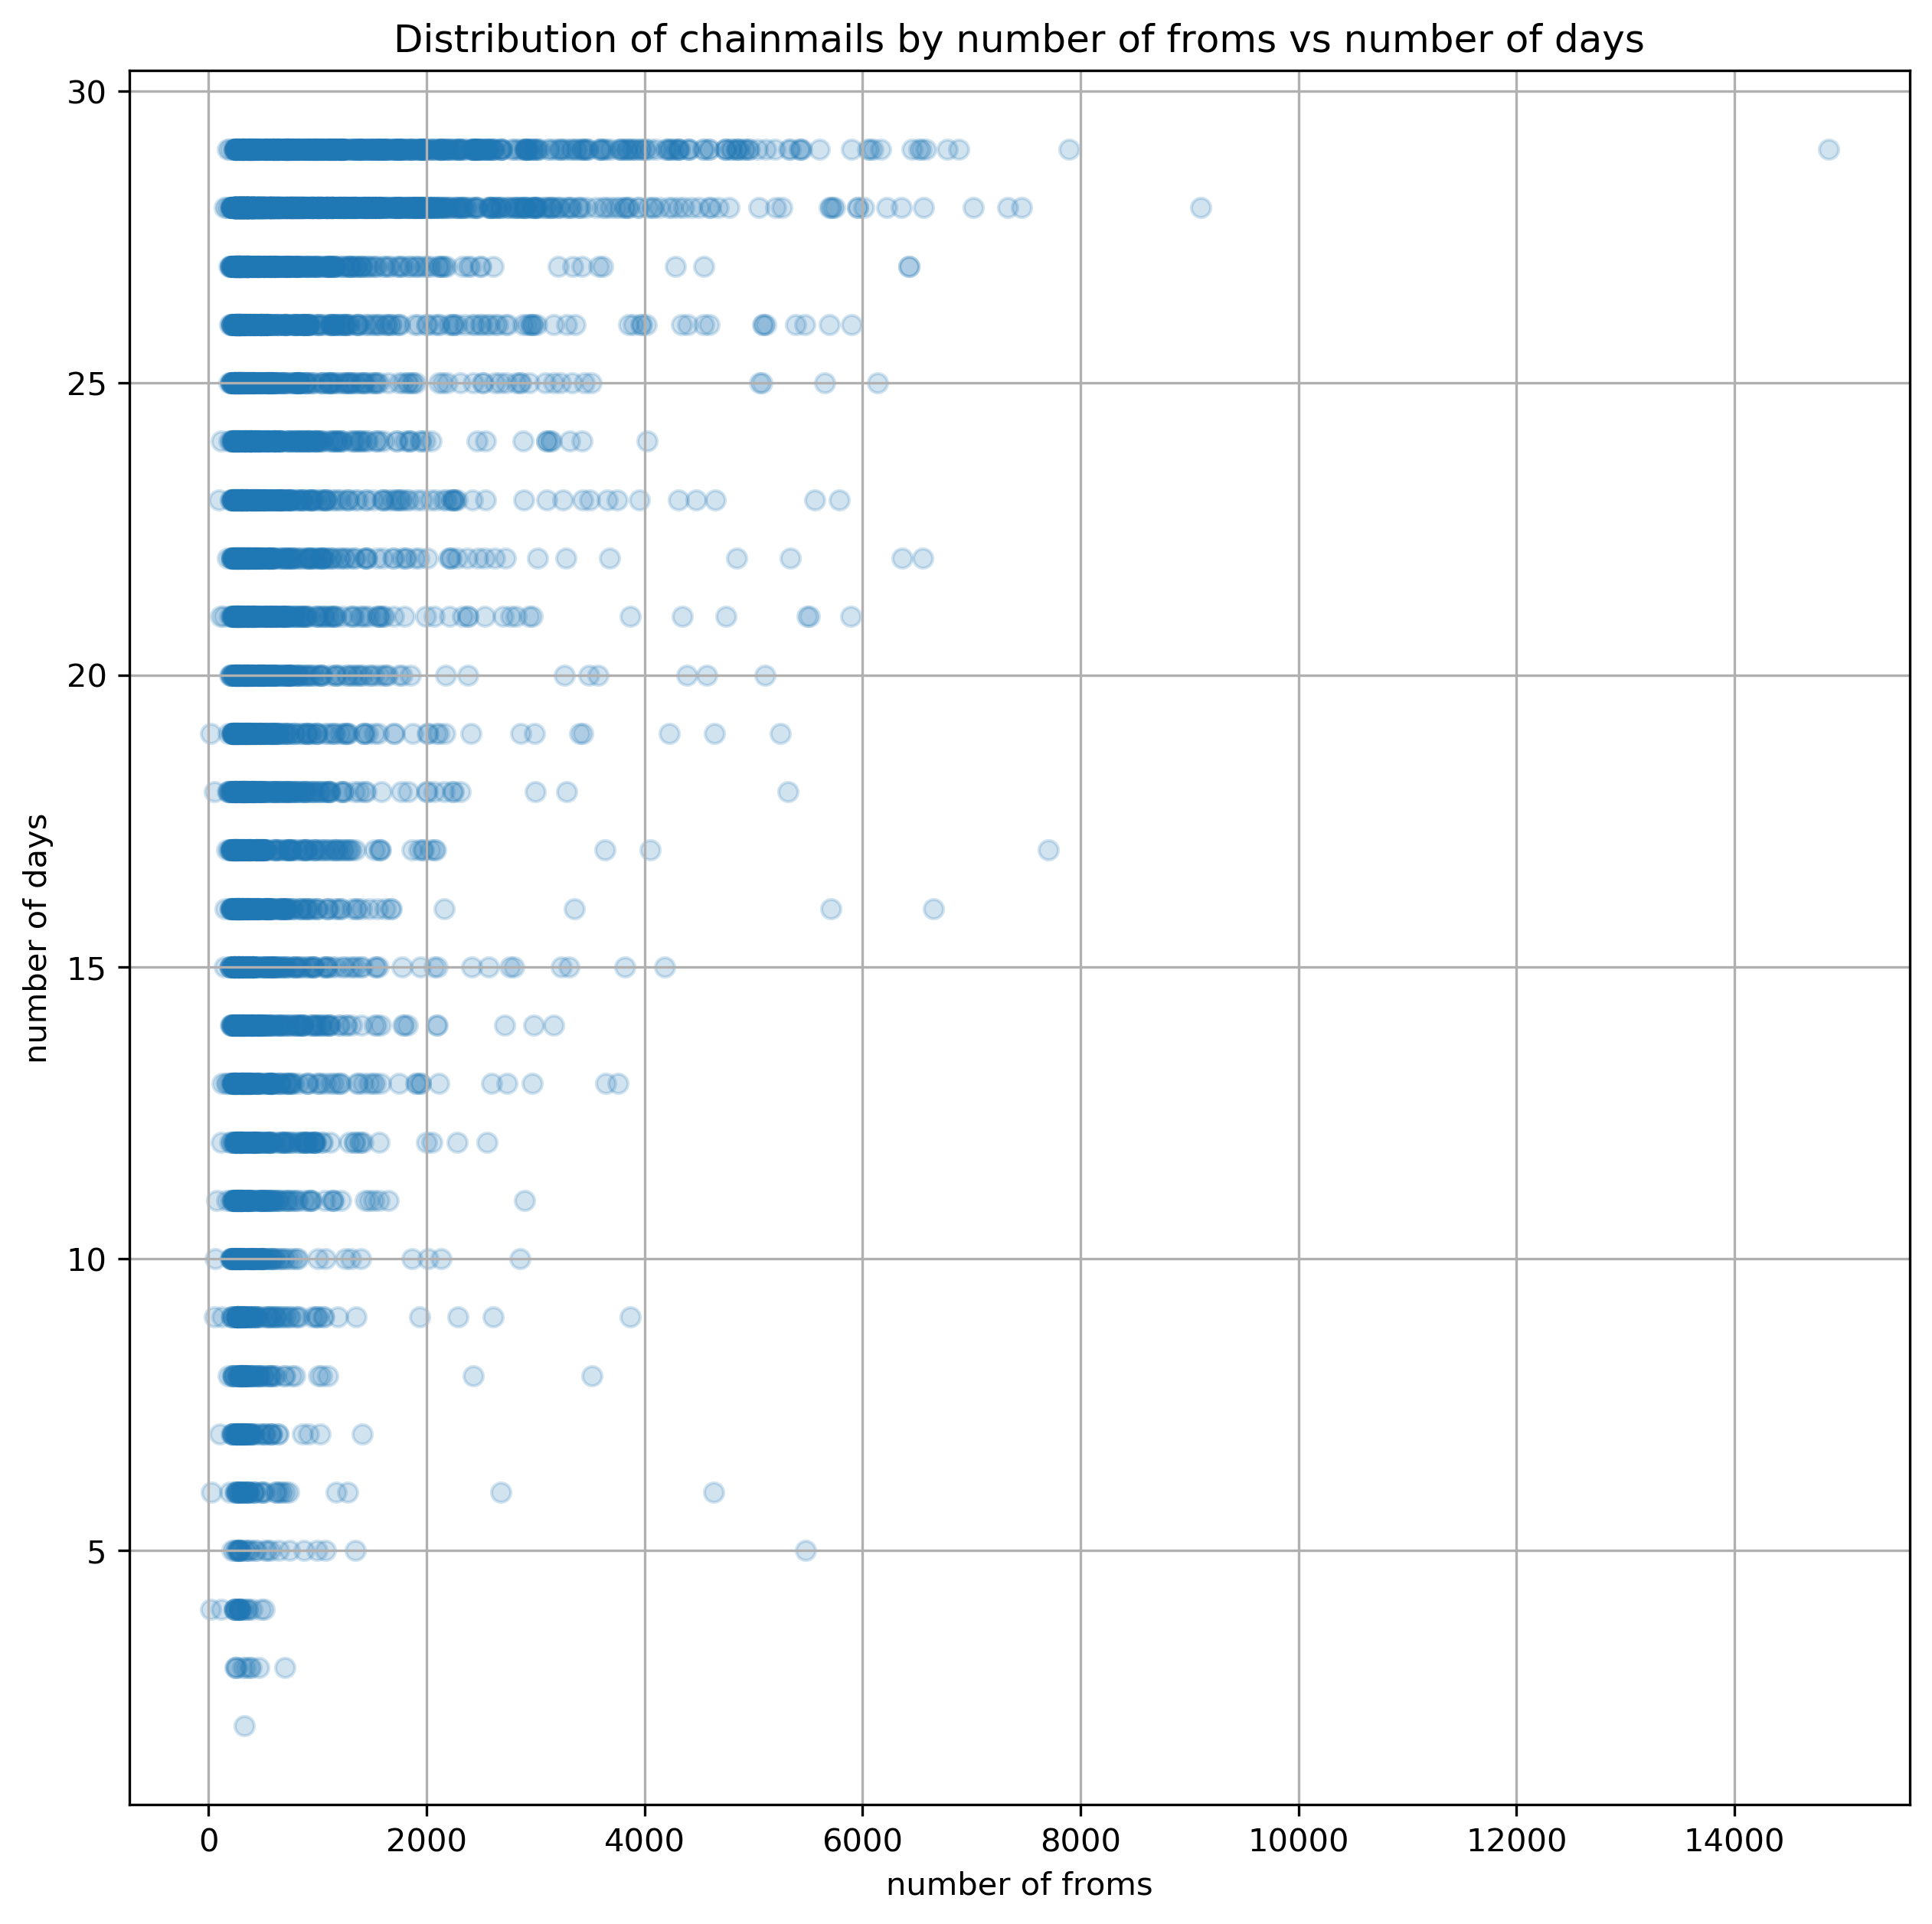

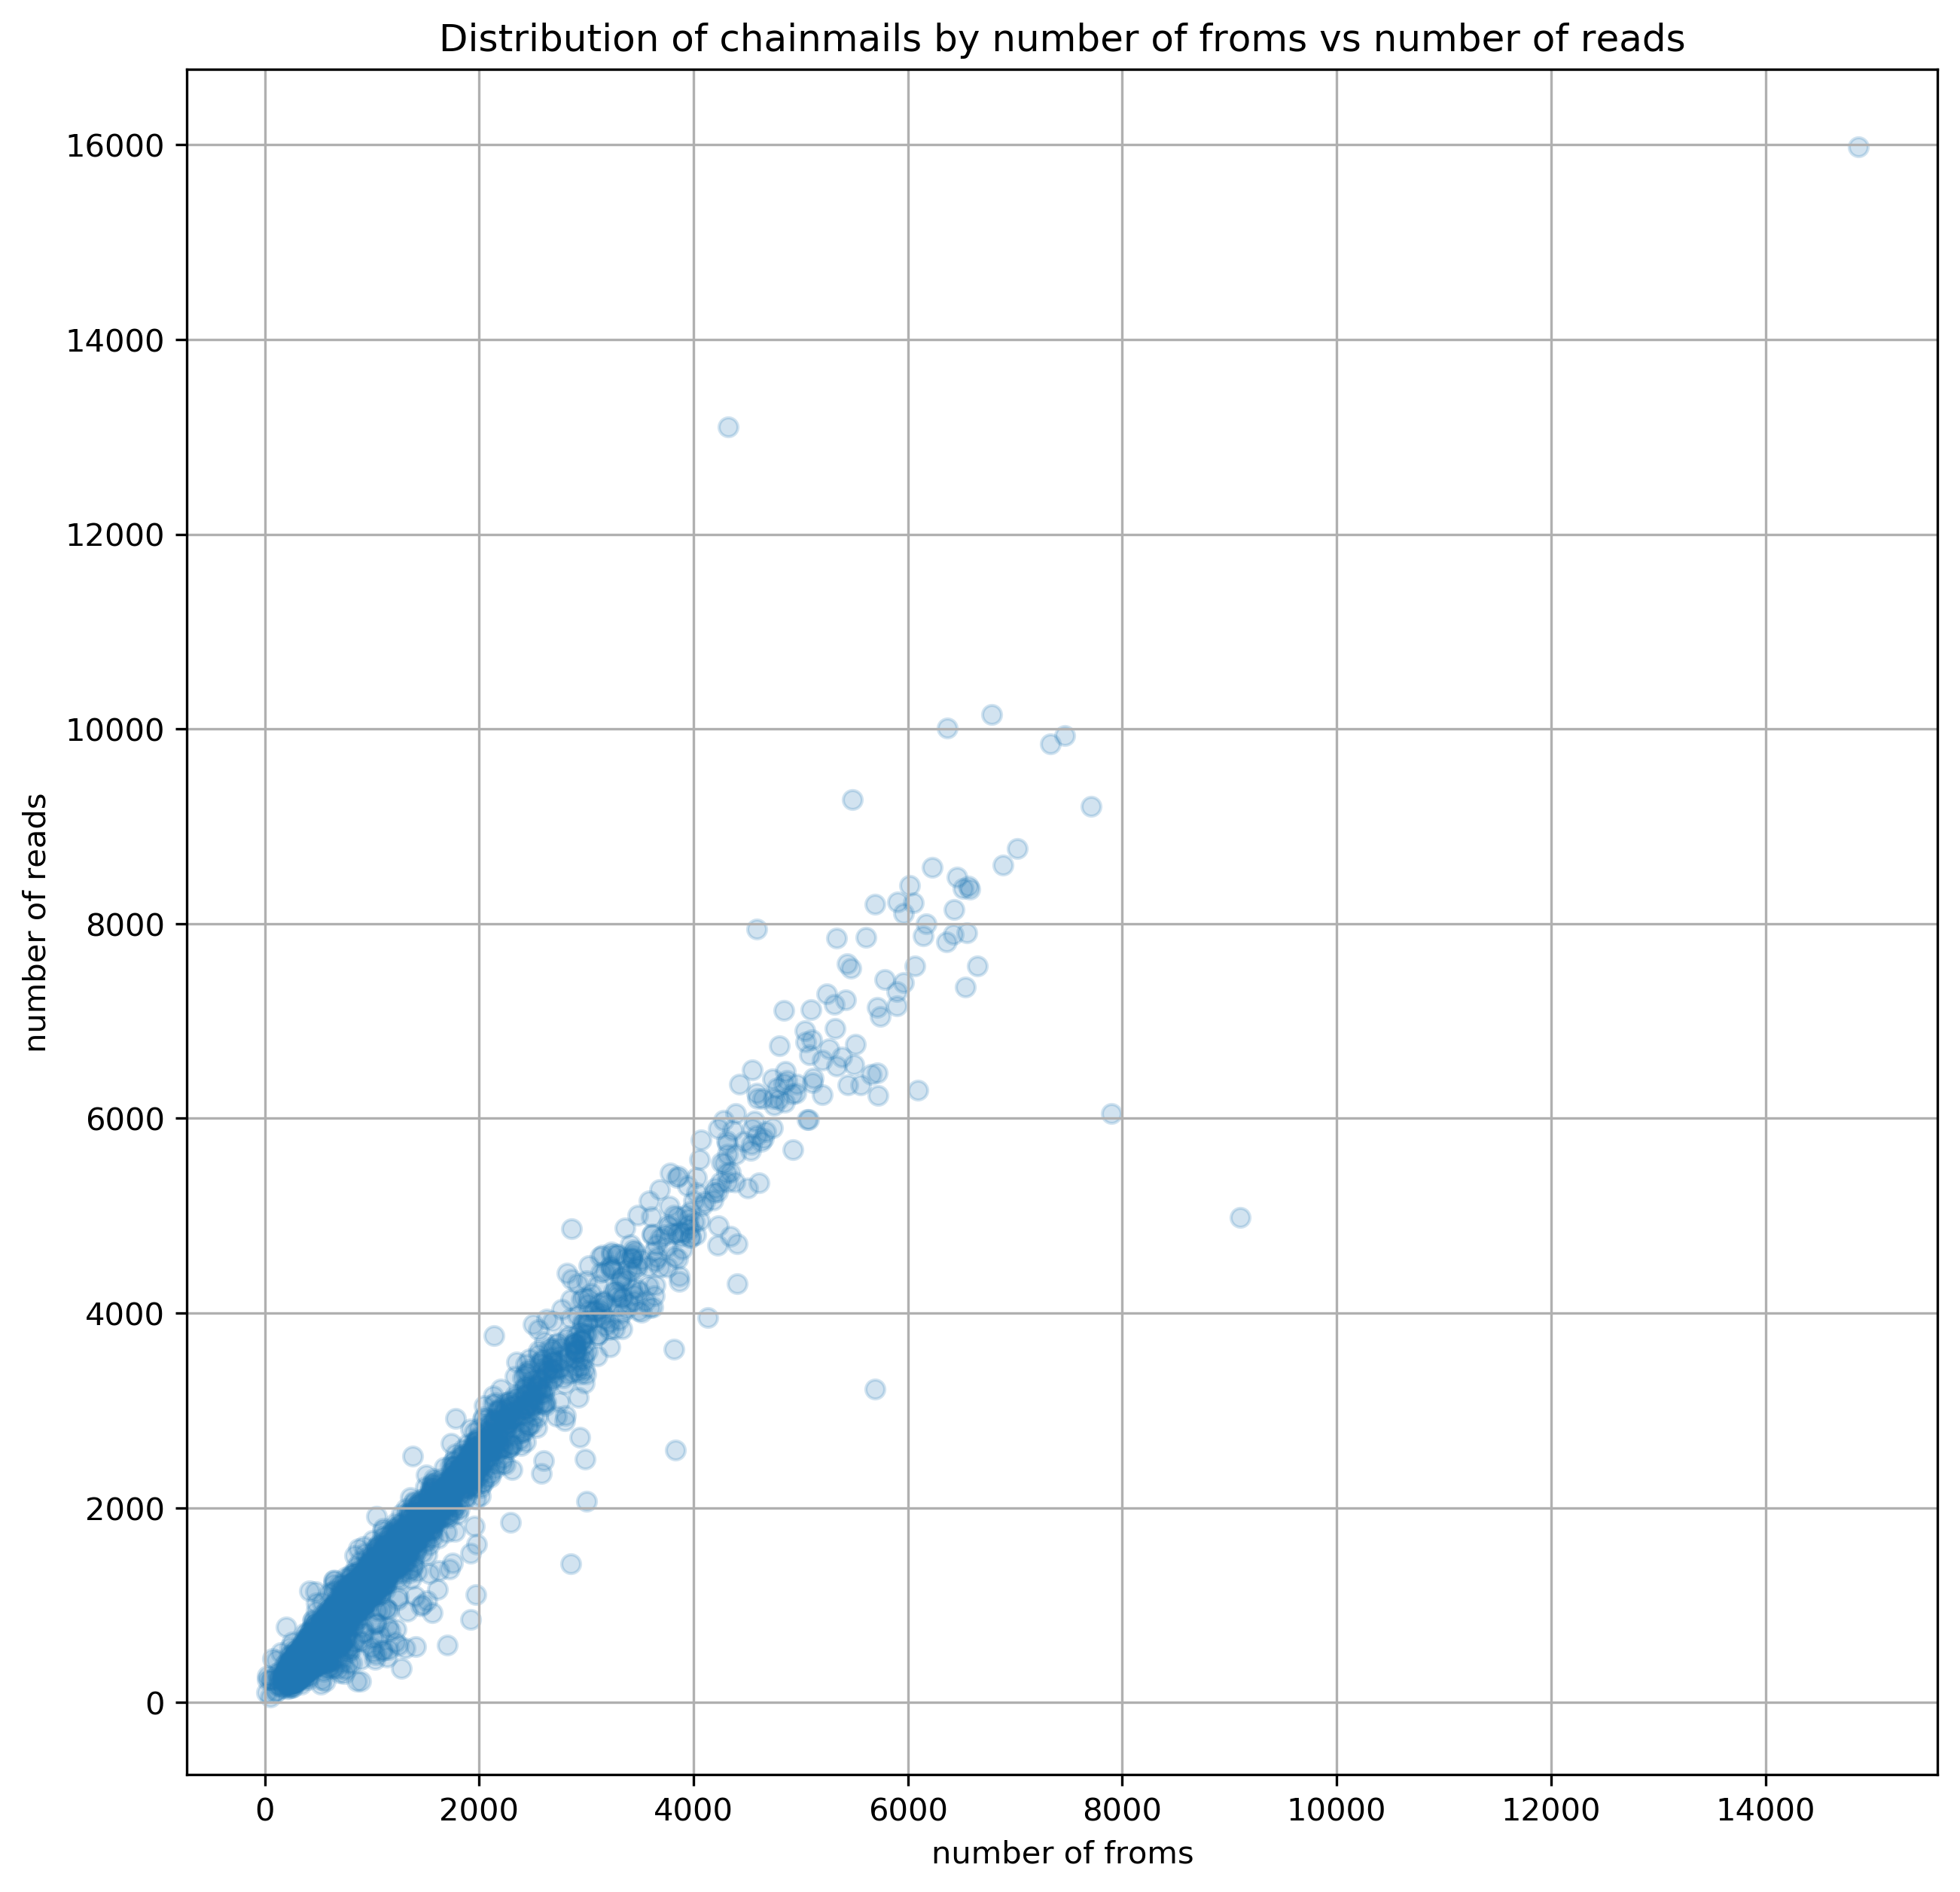

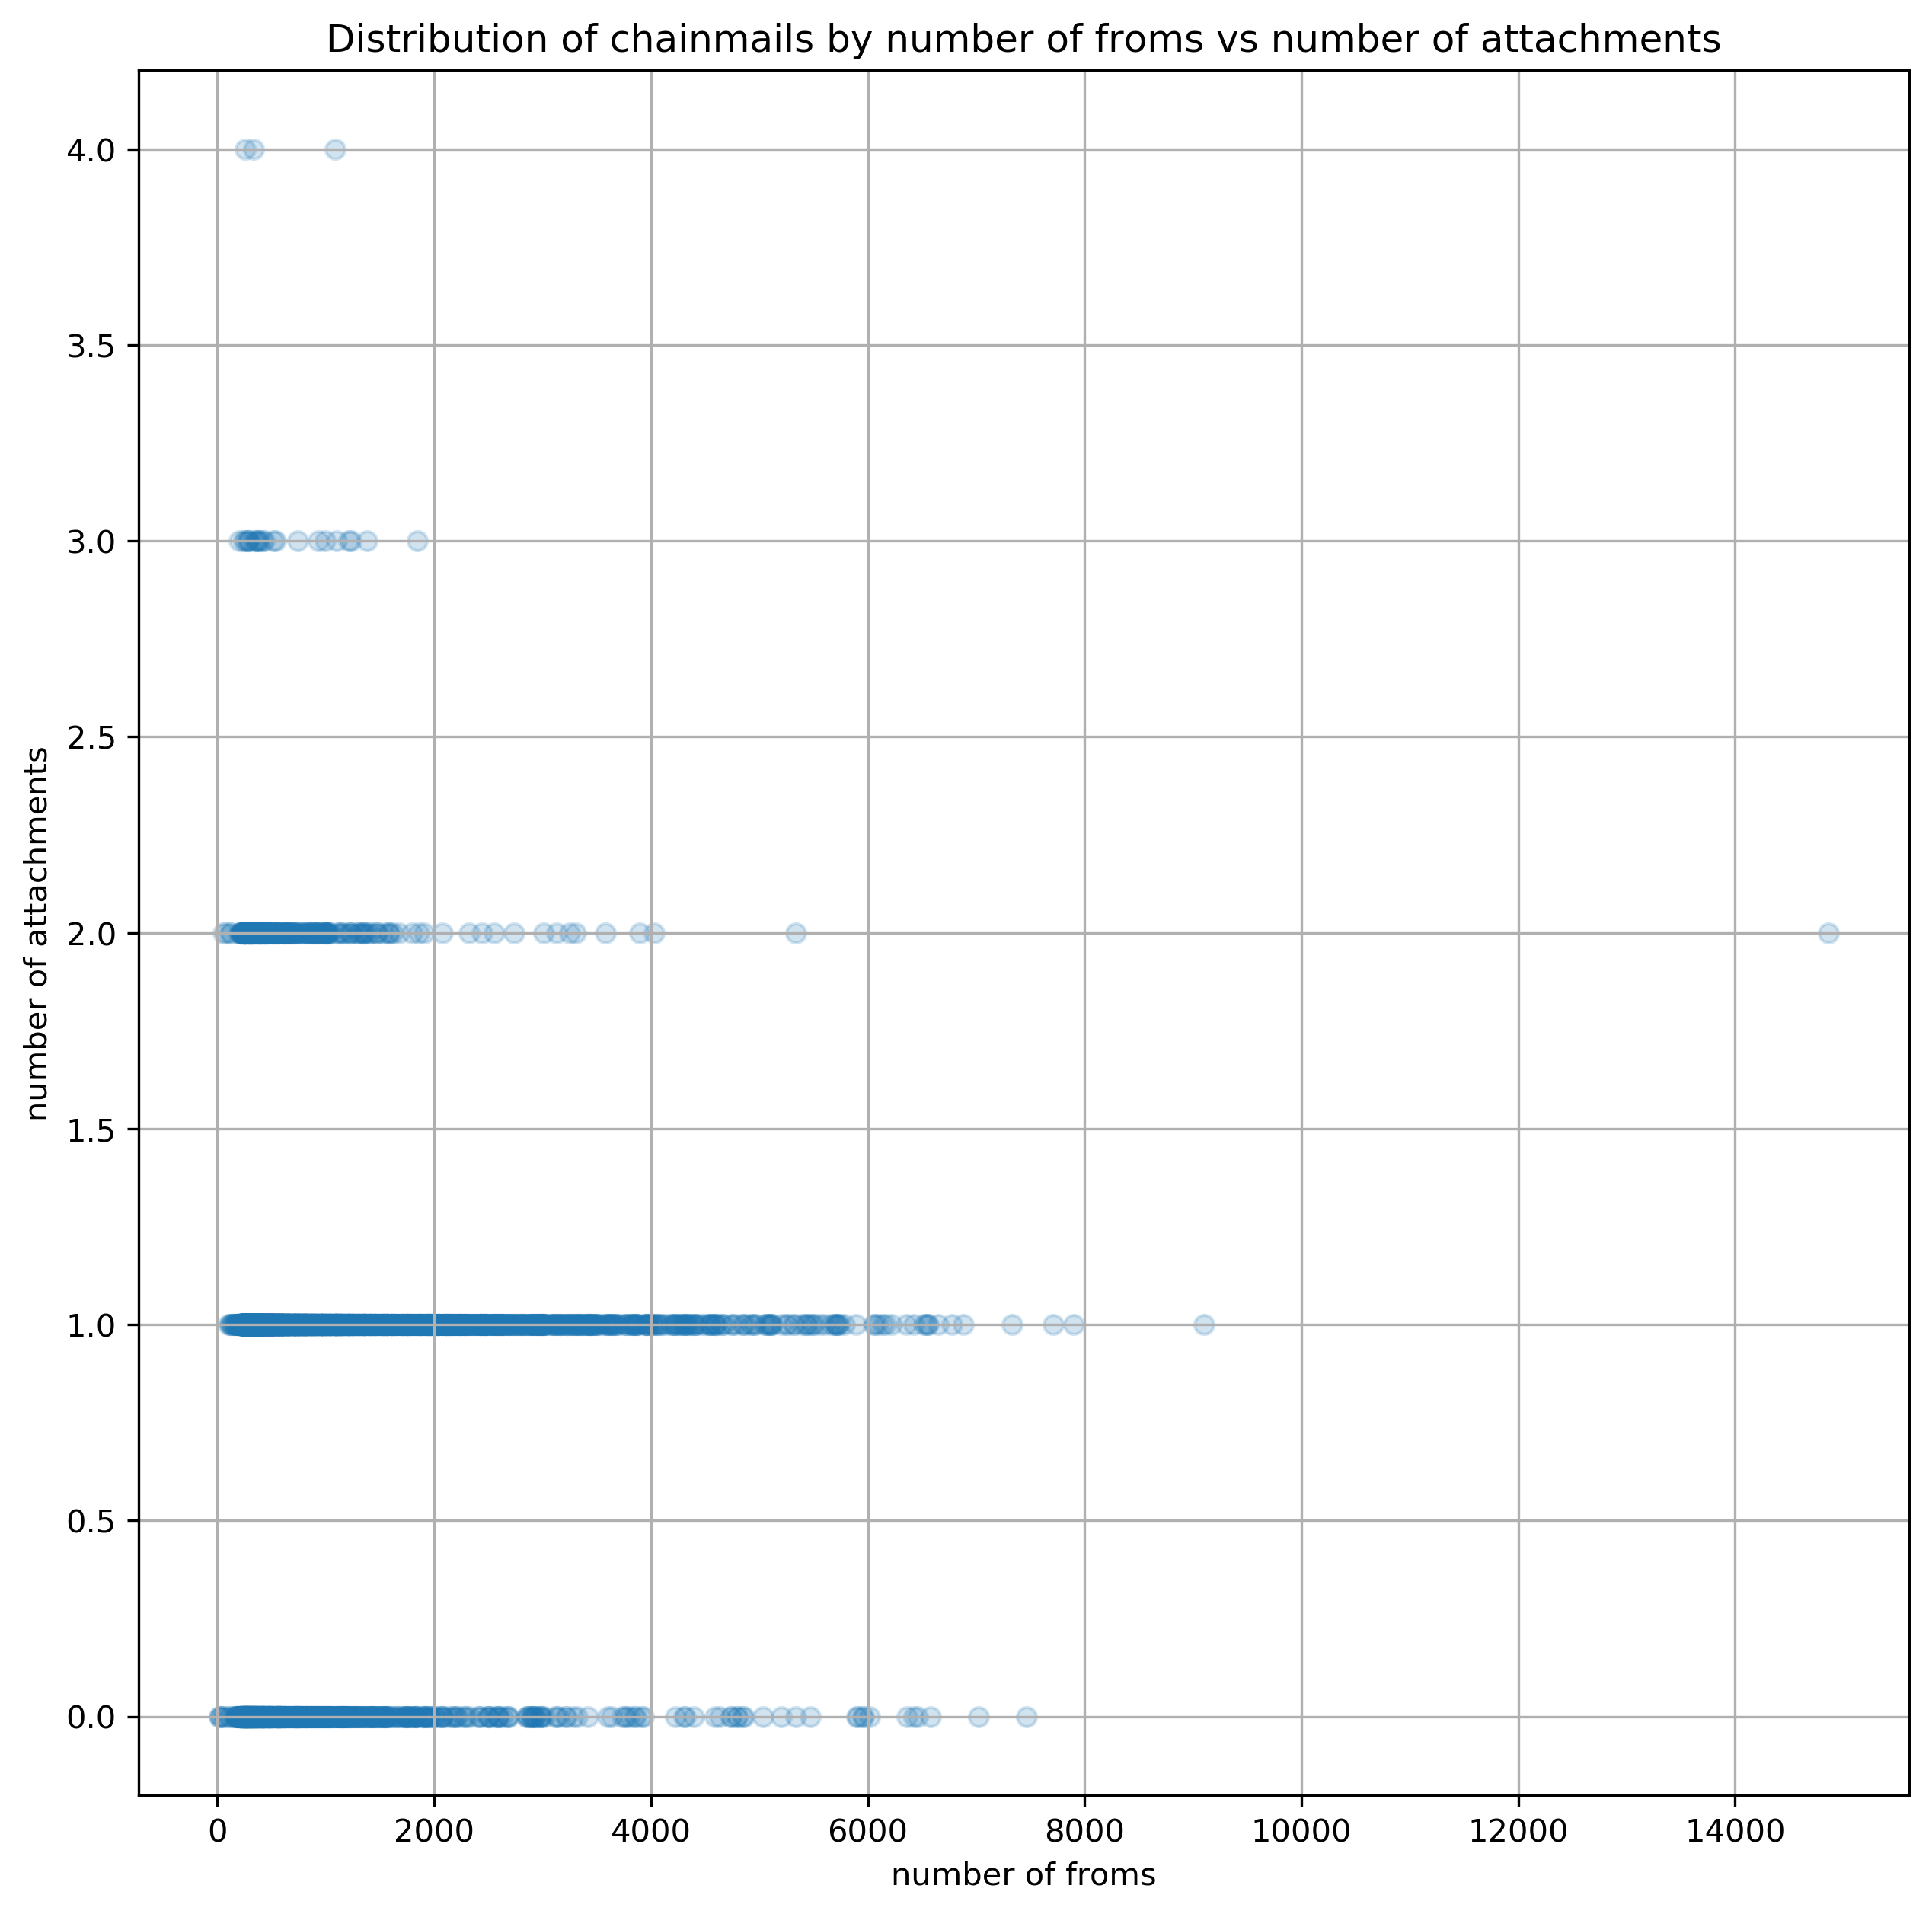

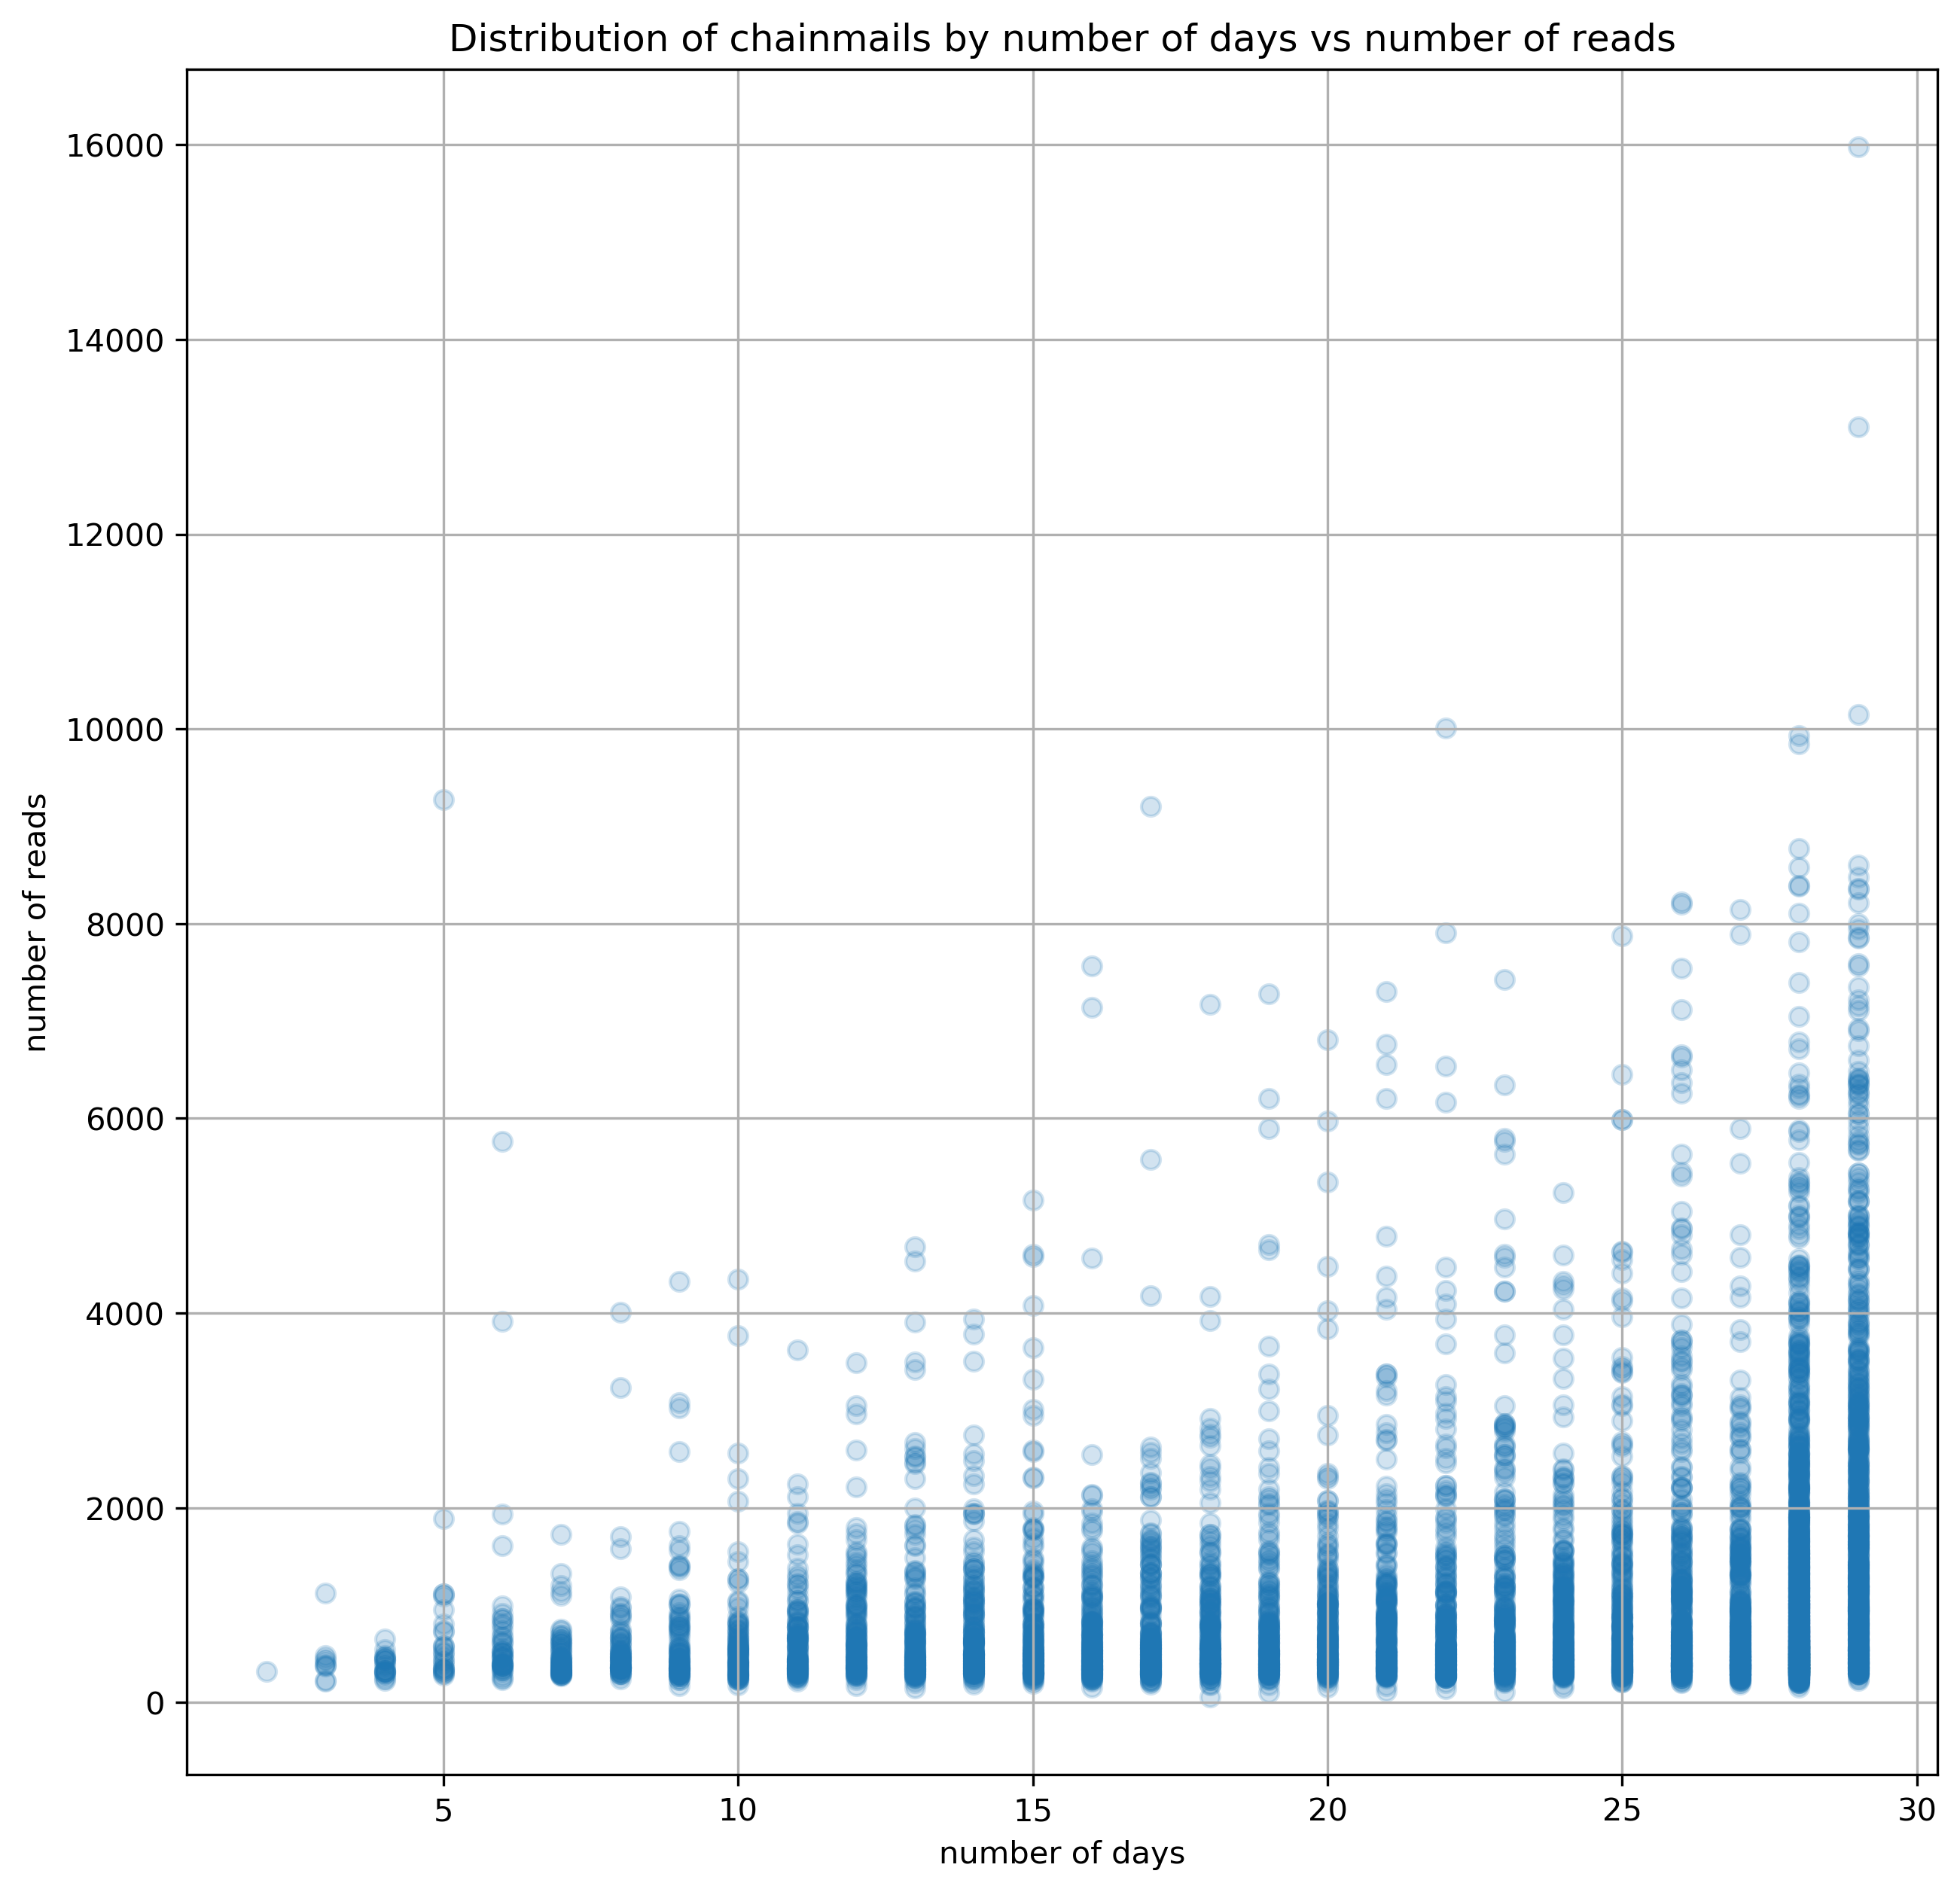

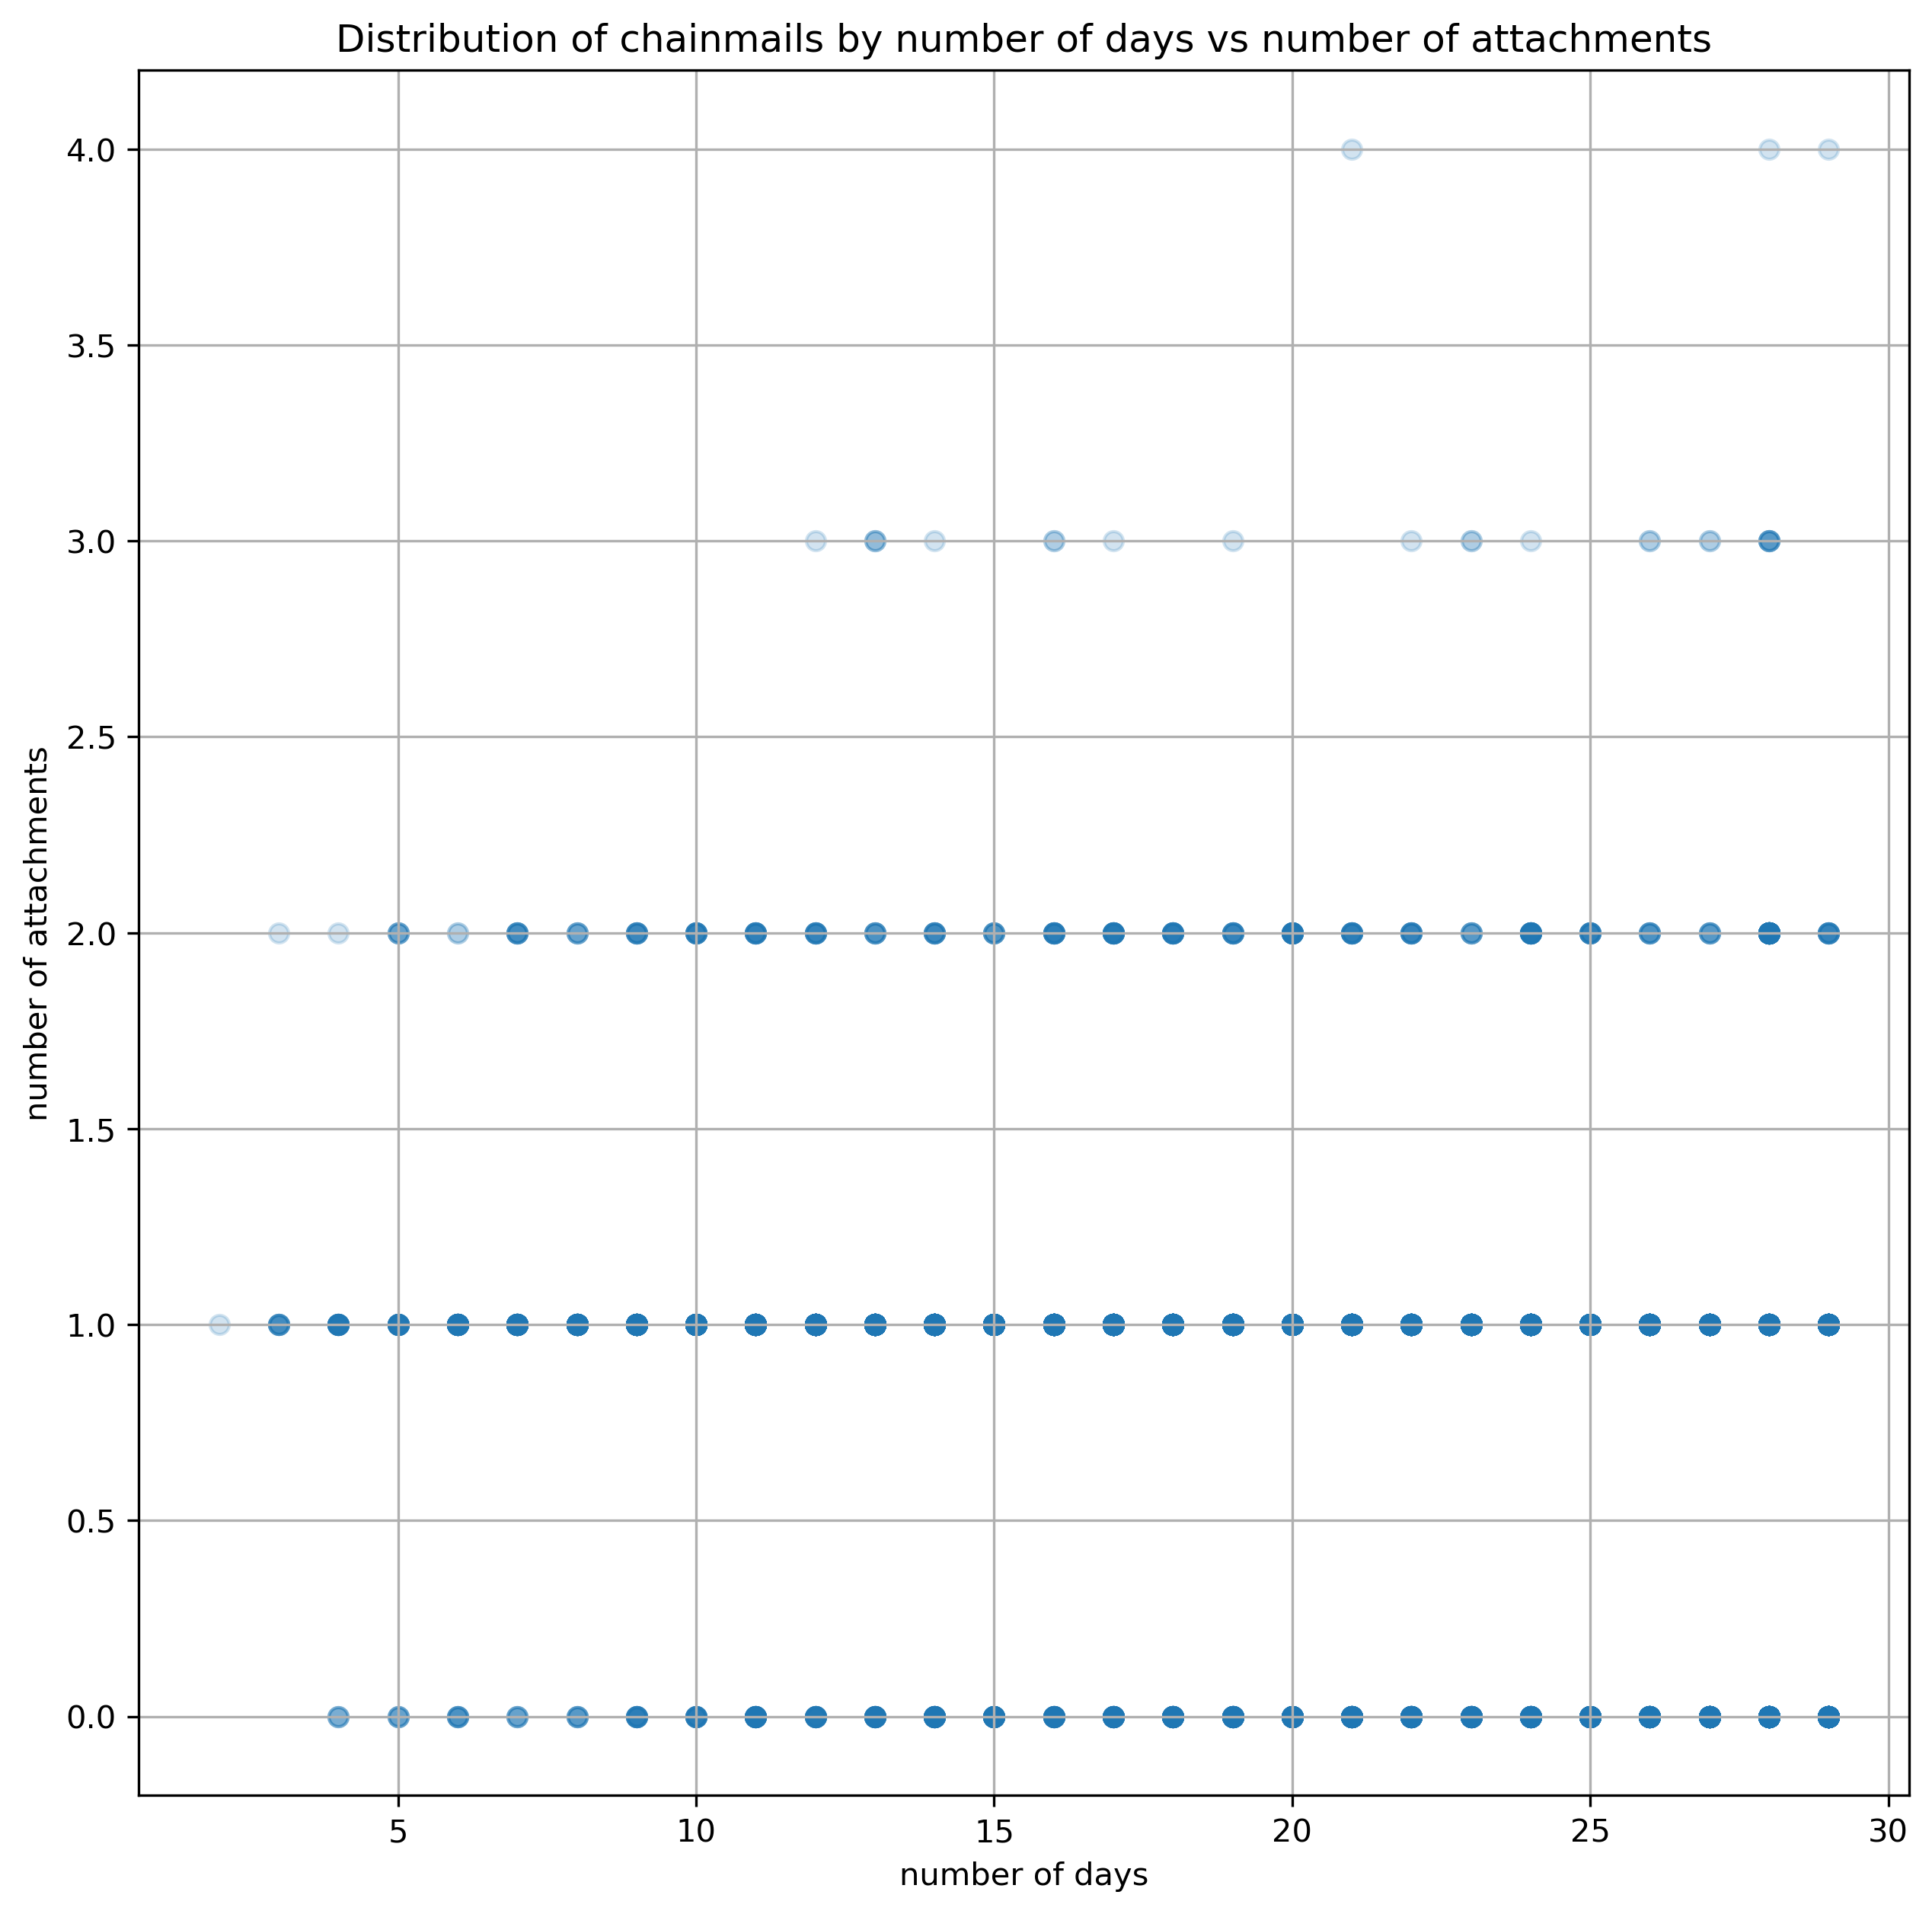

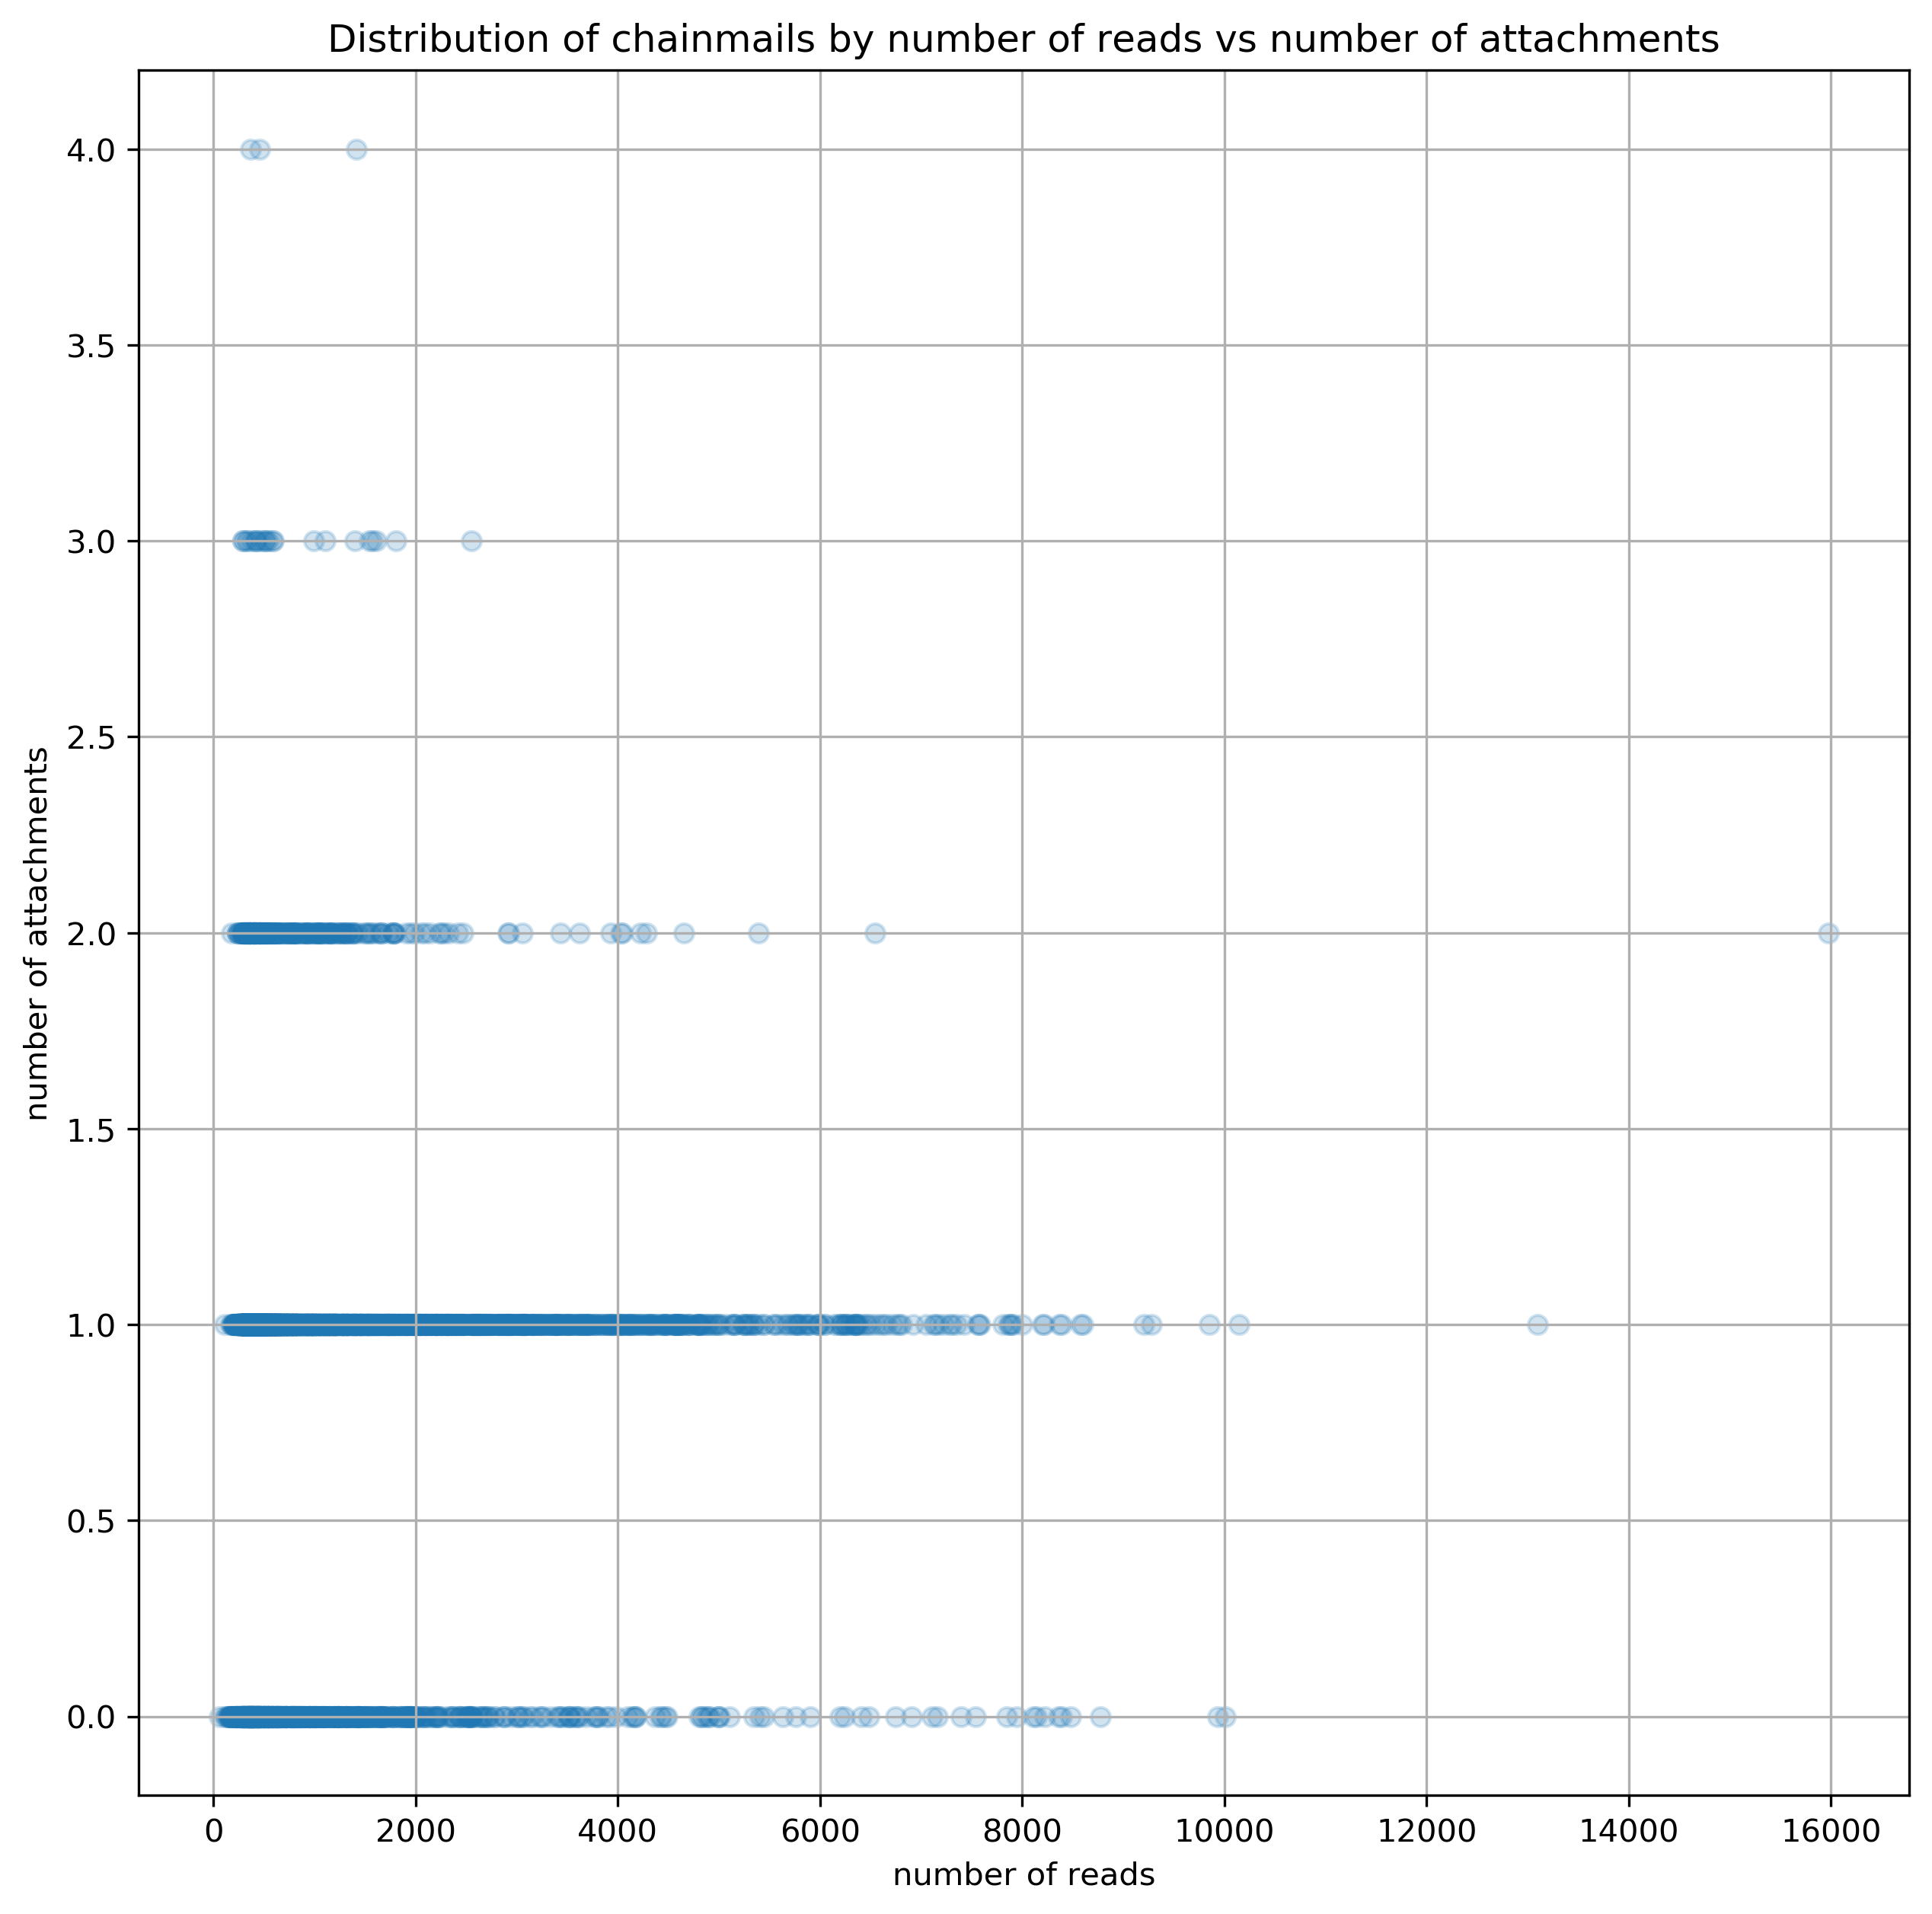

In [6]:
DATA_FILE = "/mfs/plain/tiborg/chains_with_ebox/2020-01/chains_preprocessed_parsed_primary_phash_summed"

data = next(get_lines(DATA_FILE))
data = {k: v for k, v in data.items() if v["recipients"] > 1000}
data = {k: v for k, v in data.items() if v["recipients"] < 30000}
data = list(data.items())

A = {k: np.array([d[k] for _, d in data]) for k in
     ["messages", "recipients", "froms", "days", "reads", "attachments"]}
# pprint(A)


for k in A.keys():
    percentage_histogram(A[k], title="Distribution of chainmails by number of {}".format(k),
                    xlabel="number of {} per given chainmail wave".format(k), bins=100)
    
data = next(get_lines(DATA_FILE))
data = {k: v for k, v in data.items() if v["recipients"] > 1000}
data = {k: v for k, v in data.items() if v["recipients"] < 100000}
data = list(data.items())
    
for x, y in itertools.combinations(A.keys(),2):
    scatter_plot_x_y(A[x], A[y],
                     title="Distribution of chainmails by number of {} vs number of {}".format(x, y),
                     xlabel="number of {}".format(x),
                     ylabel="number of {}".format(y),
                     alpha=0.2
                    )



In [7]:
DATA_FILE = "/mfs/plain/tiborg/chains_with_ebox/2020-01/chains_preprocessed_parsed"

att_types = Counter()
counter = 1
for l in get_lines(DATA_FILE):
    att_types.update(l["att_types"])
    continue
    counter += 1
    if counter % 500000 == 0:
        print(counter)
    if counter > 20000000:
        break

In [8]:
DATA_FILE = "/mfs/plain/tiborg/chains_with_ebox/2020-01/chains_preprocessed_parsed_primary_phash_summed"

data = next(get_lines(DATA_FILE))
total_stats = data.pop("all")
data = list(data.items())
A = {k: np.array([d[k] for _, d in data]) for k in
     ["messages", "recipients", "froms", "days", "reads", "attachments"]}

display(Markdown("# Stat Summary"))

print("During 28 days, we've noticed \n - {} distinct waves of chain mails\n"
      " - {} waves had at least 1000 recipients.\n".format(
    len(data),sum(1 for _, v in data if v["recipients"] > 1000)))
print("These waves were send\n - in {} messages\n - from {} addresses\n"
      " - to {} unique recipients \n - to {} recipients in total\n"
      " - and {:.0%} of these messages were read.\n".format(
    sum(A["messages"]), total_stats["froms"], total_stats["recipients"], sum(A["recipients"]), sum(A["reads"])/sum(A["recipients"])))


print("Chains are in {0:.0%} of cases ({1:.0%} for chains with >1000 recipients)"
      " propagated in form of attachments."
      "\nRest in form of links and rarely as just a text "
      "(plain text propagates badly with forwarding).".format(
          sum(1 for _, v in data  if v["attachments"] > 0)/len(data),
          sum(1 for _, v in data  if v["attachments"] > 0 and v["recipients"] > 1000)
          / sum(1 for _, v in data if v["recipients"] > 1000)
      ))
print("\nMost common attachment types can be seen bellow:")
for a, c in att_types.most_common(20):
    print("{:<85}{:<10}".format(a, c))


    

# Stat Summary

During 28 days, we've noticed 
 - 49759 distinct waves of chain mails
 - 6766 waves had at least 1000 recipients.

These waves were send
 - in 14232001 messages
 - from 844281 addresses
 - to 2423393 unique recipients 
 - to 36382965 recipients in total
 - and 32% of these messages were read.

Chains are in 79% of cases (84% for chains with >1000 recipients) propagated in form of attachments.
Rest in form of links and rarely as just a text (plain text propagates badly with forwarding).

Most common attachment types can be seen bellow:
image/jpeg                                                                           30841884  
video/mp4                                                                            6399361   
image/png                                                                            2240443   
application/vnd.ms-pps                                                               1660481   
application/pdf                                                            